# Ecological transition: the shadow of uncertainty in climate scenario and stress test analysis

## Authors
- Gian Luca Vriz

## How to use this notebook
Some steps of this notebook, such as model estimation and model training, may not be immediate or may require several hours to complete. Hence, we decide to comment those parts of code and provide directly the result as files to upload.
`loss_''.csv` files contain all the values of both discriminators and generators loss function.

If you have already run `pip install -r requirements.txt` you can just type `Kernel>Restart & Run All`!

## Abstract

Scenario analysis is a powerful tool that can be used to help understand how changes in the economy or government policy might impact Gross Domestic Product (GDP) and other important economic indicators. Forecasting GDP helps to determine the baseline for economic growth and sets the expectations for several economic activities. Under a financial prospective, GDP predictions are used by banks to perform stress test analysis as well as their own strategic choices to minimise financial risks. In 2022 the European Central Bank enlarged its annual supervision with a stress test exercise on climate risk. In the same year, the Federal Reserve announced a pilot Climate Scenario Analysis (CSA) exercise to identify, measure, manage, and monitor climate-related financial risks. These tasks are generally carried out treating complex economic variables with a deterministic prospective; i.e. without considering their stochastic nature. Inaccurate predictions may have heavy negative effects on the entire financial system as well as on government interventions; undermining and slowing important changes such as today’s ecological transition.

Under this prospective, the project is not intended to propose a more accurate forecasting approach than those already available in the literature, it rather aims to estimate consistent prediction intervals. In recent years, algorithmic modelling turned out to be very suitable for predictive goals. However, a constant updating may be too expensive or a waste of resources considered the insignificant benefits obtained in terms of predictive performance. In this regard, providing some guidelines on when a financial body should update its own prediction model is another aim of this project. Considering the role of the GDP on financial choices and of the current Federal Reserve's CSA, the dataset used for the analysis will be quarterly values of real Gross Domestic Product (GDP) of the United States from 1947 to 2022.

Firstly, some of the most common algorithms and models to perform GDP forecasting will be outlined, for then presenting a data driven based approach using Generative Adversarial Networks (GAN). Although there is room for improvements, this novel procedure turned out to be the most suitable one in terms of Mean Absolute Error (MAE), providing also appropriate prediction intervals. Finally, quality control charts are used with generated data to suggest when a prediction model should be updated. The contributions of this project are multiple,
 
>1) presenting a novel approach to construct prediction intervals in economic fixed-event forecasts;

>2) widening the present literature on the use of GAN in generating synthetic time series data proposing a new archetype with a parallel structure;

>3) providing some advices on when we should update a prediction model. 

## Introduction

The ecological transition involves significant transformations in the way we produce and consume goods and services. This transformation requires a strong partnership between the government, the private sector, and citizens. However, if the citizens lack confidence in the government, it can hinder the transition towards a low-carbon economy (Gawel, E., et al., 2019). The distrust in government may lead to citizens not engaging in environmental initiatives, not participating in policy-making discussions and not supporting conducted policies. To overcome this challenge, governments need to establish a credible and transparent communication with the citizens. This could be achieved demonstrating integrity in actions and ensuring that policies and regulations are implemented effectively. The government should also incentivize companies to adopt ecologically sustainable behavior, which indirectly affects citizens by creating more ecologically friendly consumer products and services. In this regard, scenario analysis and predictions are important tools that organizations use to assess and mitigate risks, identify opportunities and make informed decisions in an uncertain and unpredictable future. 

For a political decision-maker one of the most relevant variable is the Gross Domestic Product (GDP), which is the total value of goods and services produced by a country in a given period. It is a crucial economic indicator that reflects the growth or decline of a country's economy. In scenario analysis, GDP helps to determine the baseline for economic growth and sets the expectations for economic activities, such as consumption, investment, exports, and imports. Changes in GDP also impact other critical economic indicators, such as inflation, unemployment, and government revenue, which further affects the economic landscape for various scenarios.

As outlined in previous works [26-29], GDP is also one of the most important variable to assess climate change costs when performing climate scenario analysis. Further, companies and organizations have also employed scenario analysis to evaluate potential risks that could arise from climate change. Under a financial prospective, banks use GDP predictions to fulfill climate stress test (ECB’s “[SSM Climate risk stress test](https://www.bankingsupervision.europa.eu/ecb/pub/pdf/ssm.climateriskstresstest2021~a4de107198.en.pdf)*” and “[2022 climate risk stress 
test](https://www.bankingsupervision.europa.eu/press/pr/date/2022/html/ssm.pr220708~565c38d18a.en.html)*” published in July 2022) as well as to evaluate their strategic choices. A climate stress test for the bank system would assess the potential impact of climate change on the financial stability of banks. This would involve evaluating the exposure of banks to various climate-related risks, such as physical risks, transitional risks, and liability risks. The analysis would include evaluating the potential impact of climate change on the asset quality of banks, their liquidity, and solvency. The results of the stress test would be used to develop strategies to mitigate the risks of climate change to the banking system, improve risk management, and increase resilience to climate-related financial shocks. In this regard, inaccurate predictions may have heavy effects on the entire economic system as well as undermine the ongoing ecological transition.

Economic forecasting is essential for policymakers to make informed decisions on several economic activities. In this view, forecasting GDP involves analyzing past trends and making predictions based on various factors that affect the economy such as consumer spending, government policies, inflation, and international trade. Time-series analysis and macroeconomic models use statistical techniques to do predictions under specific assumptions and economic theories. However, forecasting GDP is a challenging task due to the complex nature of the economy and uncertainties such as natural disasters, pandemics, and sudden changes in global economic conditions. A common solution is to continuously monitor and update GDP forecasts based on new data and events, which can impact the economy. However, this constant updating has sometimes a high cost to bear with only sporadic cases of substantial improvement in predictive performance. Žliobaitė, I., et al., (2015) considered the model updating process as an investment decision introducing a research problem of cost-sensitive adaptation.

Less restricted models are machine learning algorithms. In general, they may be more useful than statistical procedures for complex data sets where patterns are difficult to discern initially. Moreover, algorithmic modelling turned out to be very suitable for predictive goals (Shmueli, G., 2010), but as outlined in Plett, H., et al. (2022), economic fixed-event forecasts are typically published without a quantitative measure of uncertainty.

Under this framework we will examine some machine learning techniques and statistical models with the goal to perform long-term predictions with adequate prediction intervals. Our target will be quarterly values of real Gross Domestic Product (GDP) of the United States. The dataset will be composed by quarterly observations from 1947 to 2022. In addition to the well-established models, also a novel application using Generative Adversarial Network (GAN) will be considered in order to obtain adequate prediction intervals. Finally, statistical process control techniques are used to provide some guidelines towards cost-sensitive adaptation.

This project has the following structure:

> 1) literature review;

> 2) developing a GAN to generate synthetic time series data;

> 3) testing some machine learning algorithms and time series models (ARIMA) to perform GDP forecasting;

> 4) proposing a novel approach to obtain prediction intervals and the error distribution of a prediction model;

> 5) concluding with some insights for future works.

## Literature review

In statistics, model risk refers to the possibility that errors in the process of building a model may lead to an underestimation or overestimation of the study variables. This is a risk that occurs in all statistical analyses, since each statistic has its own uncertainty due to its probabilistic nature. In finance, it refers to the possibility of financial losses or negative consequences that arise from using inaccurate or inappropriate models for forecasting, pricing or risk management. Inaccurate models could underpricing risks, leading to unexpectedly large losses, or overpricing risks, leading to missed opportunities for profits. Model risk may arise due to several reasons, such as limitations in data availability and human errors in modeling or on assumptions (Danielsson, Jon, et al., 2016). Finally, model risk can also affect actions taken by financial market regulators.

### Climate change risks as a source of model risk

Climate change is a major societal challenge, as its effects may have long-term implications on many dimensions of human life. Rising temperatures, droughts, and sea levels are just some of a wide set of challenges we are called upon to manage already in the short term. In fact, climate change is not only an environmental but also an economic threat. On the one hand, adverse climate events can cause direct property damage, impacting human health and reducing the natural resources available to us. On the other hand, a sudden and accelerated transition to a low-carbon economy entails financial risks, such as devaluation of carbon-related assets, increased costs, and the closure of economic activities. Generally, these two distinct types of risk are known in the literature by the terminology of physical risk and transition risk (Carney, M., 2015).

A third type of climate change related risk is the liability risk, also known as litigation risk (Solana, 2020). It emerges as a consequence of socioeconomic tensions that may arise during the transition to a sustainable economy. That is, when parties who have suffered large losses due to climate change seek to recover said losses from other parties they believe are primarily responsible. Generally, compensation activities take place through lawsuits or claims. The risk therefore falls on insurance institutions, which may suffer financial losses due to the increased frequency of extreme events, such as forest fires, hurricanes or floods. Moreover, increased litigation for material damage caused to third parties by fossil energy companies may have expenses not easy to manage.  Globally, the cumulative number of climate change-related lawsuits has more than doubled since 2015 (Setzer and Catherine, 2022). The Grantham Research Institute on Climate Change and the Environment - a research institute at the London School of Economics and Political Science, which studies climate change and its impact on the environment - points out that climate change litigation will continue to evolve rapidly causing a large increase in litigation. An increase in litigation centered on personal liability is expected, but also manifestations of governmental and international tensions due to environmental protection. Liability risk is therefore a real risk, with possible consequences for the financial stability as well as for the global socioeconomic system. So, in addition to the physical risk and transition risk, a political decision-maker should consider also this last source risk. Solana (2020) grouped various forms of risk into the liability risk, including also environmental reputational risk. Reputational damage is not related to the litigation itself, but to the questionable corporate culture that has supported such practices. However, a formal decision by a court or administrative body imposing a fine or compensatory obligation on the financial institution concerned has a confirmatory effect. There are various costs in which a financial body may incur. Typically, clients who are particularly sensitive to environmental sustainability might decide to switch providers.

If the models used by banks to assess climate change risks are inaccurate, it leads to incorrect evaluation and suboptimal investment decisions. Incurring losses due to climate change undermines the own credibility with their clients, feeding risks such as the liability risk. Hardly a rational person would give their savings to a bank that actively finances companies under climate change legal disputes. Recently, climate stress test turned out to be a relevant tool for estimating and mitigating climate risks. On the other hand, one of the main connections between climate change and financial risk management is the level of uncertainty underlying the model used for its assessment. Scenario analyses by entities such as the Network of Central Banks and Supervisors for Greening the Financial System (NGFS) are essential for policy decisions. The latter influence the expectations of individuals, which underlie human emotions. If expectations are not met or change suddenly, people may experience emotional tensions. Economic theory clearly suggests that an unexpected change on expectations can cause social tensions (Steele and Vaughn, 1993). In a nutshell, strategic decisions using a high-risk model increases the possibility of a sudden change in others' expectations; then generating a range of reactions, such as frustration, disappointment, sense of injustice or anger that result in social tensions.

Therefore, we should regularly assess the accuracy of the model as well as the data we intend to use. Considering the stochastic nature of the estimates is then essential for a more proper and accurate scenario analysis. Real GDP is only one of a wider set of variables that are relevant to climate scenario and stress test analysis, but economic and financial instruments have a close relationship to its dynamics, receiving a special attention in the past.

### GDP prediciton intervals

Time series analysis, macroeconomic models and machine learning algorithms are the main branches of the literature in order to perform forecasting of some economic variables like the GDP. By analyzing historical trends, time series models can provide reliable forecasts of future economic conditions. They also require relatively simple calculations, making them easy to use. However, these approaches only consider internal factors like historical trends, and do not take into account external factors like changes in government policy, new technologies, or demographic changes. This can limit the accuracy of forecasts. ARIMA models and exponential smoothing methods are widely used for GDP predictions (Muma, et al., 2022).

On the other hand, macroeconomic models capture the interrelationships between various economic variables and their impact on GDP growth. These models take into account various factors that influence economic activity such as government policies, interest rates, and inflation. Moreover, they can be used to simulate various scenarios, allowing policymakers to develop strategies to mitigate economic risks and anticipate economic opportunities. The Dynamic Stochastic General Equilibrium (DSGE) model is one of the most used macroeconomic approach to perform GDP predictions. However, these models are based on a set of assumptions that may not be realistic or may not hold in the real world. These assumptions include perfect rationality, complete markets, and rigid prices. Despite their differences, time series and macroeconomic models provide often similar results (Wickens, M.,2014).

Recently, machine learning techniques are increasingly used to perform GDP forecasting. In addition to capture complex patterns and relationships, they are not based on specific assumptions, making these models highly flexible tools. Algorithms, such as Gradient Boosting, Random Forest (Yoon, J., 2021) and LSTM (Sangjin, P. and Jae-Suk, Y., 2022) have obtained good results in macroeconomic forecasting. Nevertheless, machine learning models can be difficult to interpret, leading to challenges in understanding how the model is making predictions. This can be especially problematic when attempting to identify specific features of the results such as causal relationships.

Despite their diversity, all previous models share a relevant feature, uncertainty. Economic forecasts are often published in the form of fixed-event forecasts, and therefore without a quantitative measure of uncertainty. If the normality assumption holds, we could construct prediction intervals using standard errors, but it is often a strong assumption to have in real cases. Then, the principle of forecast post-processing using point forecasts and past forecast errors to construct forecast distribution- is widely used. Plett, H., et al. (2022) propose heteroscedastic and quantile regression methods to obtain GDP prediction intervals from past prediction errors. Adams, P, et al. (2020) adopted a similar procedure to quantify time-varying risks around macroeconomic forecasts. Nevertheless, dataset of past prediction errors are typically small, making difficult to estimate the real distribution.

In this perspective, we contribute by showing the potential of the GAN to generate synthetic data that mimics both the characteristics and patterns of the real-world GDP and those of forecasting errors. Moreover, the distribution of the prediction errors provides also some guidelines at the questions to when we should update a prediction model.

### GAN and synthetic time series

A generative adversarial network (GAN) is a type of machine learning model that consists of two neural networks -a generator and a discriminator- that work against each other in a two-player min-max game to generate new data that is similar to the training data. The generator tries to create new data samples that are indistinguishable from the real data, while the discriminator tries to correctly identify which samples are real and which ones are fake. GANs are widely used for a variety of tasks, such as image and video synthesis, data augmentation, and language translation, among others. They have shown impressive results in generating realistic images, videos, and audio that are difficult to distinguish from real ones, and have the potential to revolutionize many industries by enabling the creation of synthetic data that can be used for training machine learning models.

Recently, researchers have also been exploring the use of GANs in generating time series data (for an accurate literature review see Brophy, E., et al., 2023). One of the challenges in this context is the sequential nature of the data; indeed, the standard GAN architecture is not designed to handle sequential data, and it requires modifications to be able to generate meaningful and consistent time series data. One approach is to use a variant of the GAN called Conditional GAN (cGAN), where the generator model takes not only a random noise signal but also a time index as input. The discriminator model also takes the time index as input, allowing it to distinguish between real and fake data in a temporal context. However, more research is needed to explore the best architectures and training techniques for GANs in time series data.

Mode collapse is another common problem in Generative Adversarial Networks. Mode collapse happens when a generator learns to produce a limited number of outputs based on the most frequent patterns in the training data rather than capturing the diversity of the whole dataset. Other relevant issues are, 

1) diverging loss functions: the training of GANs requires the optimization of two separate loss functions (one for the generator and the other for the discriminator). If the loss functions for both networks diverge at any point during training, the networks stop learning and the GAN fails;

2) vanishing gradients: GANs can suffer from vanishing gradients, which occurs when the gradients become too small and the weights of the model cannot be updated. This results in poor convergence and slower learning;

3) lack of stability: GANs can be unstable during training, which may cause the generator to produce poor-quality images or the discriminator to incorrectly classify the real and fake images.

4) overfitting: GANs may overfit the training data and produce output images that are similar to the training set but not representative of the real world. This is a major limitation for GANs in real-world applications.

5) computational complexity: training GANs is computationally intensive and requires significant computational resources. This makes it difficult for most researchers and developers to implement and train GANs effectively.

To handle these issues for time series data a wide set of GANs were proposed in recent years. Below are only some of the most dutiful mentions,

1) Fin-GAN (Vuletić, M., et al., 2023);

2) Quant-GAN (Magnus W., et al., 2020);

3) WGAN-GP (De Meer P.,et al., 2019);

4) WGAN-LSTM (Pfenninger, M., et al., 2021).

To analyse GDP time series we decide to adopt a modified versions of WGAN-GP. The key idea behind the WGAN-GP is to use a Wasserstein distance metric instead of the traditional Jensen-Shannon divergence used in GANs (Martin A., et al., 2017). The Wasserstein distance metric provides a more stable and meaningful measure of the distance between two probability distributions. This results in better quality generated images. The Gradient Penalty is a regularization technique that is added to the loss function of the discriminator (Ishaan Gulrajani, et al., 2017). The GP ensures that the gradients of the discriminator stay within a certain range, making the training process more stable.

Overall, the WGAN-GP has been shown to produce state-of-the-art results in image generation tasks, and has become a popular technique in the field of Generative Adversarial Networks.
In the following we will go to study three types of archetypes,

1) WGAN-GP with Convolutional Neural Networks (CNN) as proposed in the review of Eckerli, F., et al. (2021);

2) WGAN-GP with Long Short Term Memory (LSTM);

3) WGAN-GP with a parallel structure between CNN and LSTM.

Even if WGAN-GP is not a novel technique to analysis time series data, on the best of our knowledge it is the first study that considers a GAN algorithm with parallel components for generate synthetic macroeconomic time series data. 
Moreover, this novel approach may enlarge the available toolbox for prediction intervals, which is one relevant point in the forecasting procedure (Petropoulos, F., et al. 2022).

## GAN

Firstly all the necessary libraries are imported.

In [1]:
###Settings
#Import the libraries 
import glob
import imageio
import os
import random
import statistics
import PIL
import datetime 
import pydot
import pydotplus
import graphviz
import time
import torch
import prophet
import joblib
import scipy.stats
import statistics
import tensorflow as tf
import tensorflow_addons as tfa
import yfinance as yf
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns
import plotly.express as px
from jupyter_dash import JupyterDash
from sklearn.utils import resample
from dash import dcc, html, Input, Output
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from prophet import Prophet
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from tensorflow.keras import layers, regularizers
from prophet.plot import plot_yearly
from IPython import display
from keras.models import load_model
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.linear_model import LinearRegression
from tensorflow import keras
plt.style.use('fivethirtyeight')
tf.__version__

'2.11.0'

In [2]:
#Imports for data retrieval and analysis
import warnings
import statistics
import math
import pandas as pd
from tensorflow.python.client import device_lib 
from pandas_datareader import data
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew
warnings.filterwarnings("ignore")

The following code cells are used to perform several types of Deep Convolution Generalized Adversarial Network (DC-GAN). All the sources are taken by the following repository with some modifications,

1) [Financial Gan](https://github.com/eckerli/gans_finance-1);

2) [Quant Gan](https://github.com/pnhuy/quantgans).

These are repositories derived from two main papers (Eckerli F., et al., 2021 and Magnus W., et al., 2020).

### Train the model
During training, the two networks compete with each other in a feedback loop, with the generator trying to produce more realistic samples while the discriminator becomes better at distinguishing between real and fake samples. This process continues until the generator produces data that is so realistic that the discriminator can no longer differentiate between real and generated data. Note, training GANs can be tricky. It's important that the generator and discriminator do not overpower each other (e.g., that they train at a similar rate).

### Create the models

In the following, there is all the code to build the structure of the above GAN archetypes. Considering that the discriminator in the original WGAN-GP article should be training more times of the generator (leading to possible overfitting issues), we decide to introduce a dropout layer after each convolutional layer as proposed in Liu, Haoqiang, et al. (2021). Even if Ishaan G., et al (2017) recommended to use Adam optimizer, for time series data we empirically found that RMSprop better suited our needs - as just outlined in other studies (Pfenninger, M., et al., 2021; [website article](https://towardsdatascience.com/generating-synthetic-financial-time-series-with-wgans-e03596eb7185)).

In [3]:
#specific for real data
BUFFER_SIZE = 296 #lenght of timeseries 
BATCH_SIZE = 32 #while training your GAN use a batch size smaller than or equal to 64. Using a bigger batch size might hurt the performance because during the initial training the discriminator might get a lot of examples to train on and it might overpower the generator, which would have a negative effect on training.
data_dim = 32
noise_dim = 100
data_channel = 1

In [4]:
# 'dcgan': standard deep convolutional GAN
# 'wgan': Wasserstein GAN
# 'wgan_gp': Wasserstein GAN with gradient penalty
# 'wgan_M': Modified WGAN-GP whith batch normalization layers and dropout rate
# 'wgan_M2': Modified WGAN-GP with dropout rate
# 'wgan_LSTM': WGAN-GP with LSTM
# 'wgan_par': WGAN-GP with parallel components
# 'wgan_par_2': WGAN-GP with parallel components only for the generator
choice = 'wgan_par_2'

Both the generator and discriminator are defined using the [Keras Sequential API](https://www.tensorflow.org/guide/keras#sequential_model).

In [5]:
#G and D blocks without residual layers

def G_single_block(model, out_channels, g_kernel, act, **kwargs):
    model.add(layers.BatchNormalization())
    model.add(act())
    model.add(layers.Conv1DTranspose(out_channels, g_kernel, strides=2, padding='same', **kwargs))

def G_single_block_0(model, out_channels, g_kernel, act, **kwargs):
    model.add(act())
    model.add(layers.Conv1DTranspose(out_channels, g_kernel, strides=2, padding='same', **kwargs))
    
#def G_single_block_SN(model, out_channels, g_kernel, act, **kwargs):
#    model.add(act())
#    model.add(layers.Conv1DTranspose(out_channels, g_kernel, strides=2, padding='same', **kwargs))

def D_single_block(model, out_channels, d_kernel, **kwargs):
    model.add(layers.Conv1D(out_channels, d_kernel, strides=2, padding='same', use_bias=False, **kwargs))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
def D_single_block_0(model, out_channels, d_kernel, **kwargs):
    model.add(layers.Conv1D(out_channels, d_kernel, strides=2, padding='same', use_bias=False, **kwargs))
    model.add(layers.LeakyReLU())
    

#### The Generator

In [6]:

def make_generator_model(choice='dcgan'):
    if choice in ['dcgan', 'wgan_gp']:
        g_kernel = 5
        gf_dim = 32
        act = layers.LeakyReLU

        model = keras.Sequential()
        model.add(layers.Dense(data_dim * gf_dim, input_shape=(noise_dim,)))
        model.add(layers.Reshape((data_dim//8, gf_dim*8)))

        G_single_block(model, gf_dim*4, g_kernel, act)
        G_single_block(model, gf_dim*2, g_kernel, act)
        G_single_block(model, gf_dim, g_kernel, act)
        
        model.add(layers.BatchNormalization())
        model.add(act())
        model.add(layers.Conv1DTranspose(data_channel, g_kernel, strides=1, padding='same', activation= 'linear'))

    elif choice == 'wgan':
        g_kernel = 5
        gf_dim = 32
        act = layers.LeakyReLU
        additional = {'kernel_initializer': tf.random_normal_initializer(stddev=0.02)}

        model = keras.Sequential()
        model.add(layers.Dense(data_dim * gf_dim, input_shape=(noise_dim,), **additional))
        model.add(layers.Reshape((data_dim//8, gf_dim*8)))

        G_single_block(model, gf_dim*4, g_kernel, act, **additional)
        G_single_block(model, gf_dim*2, g_kernel, act, **additional)
        G_single_block(model, gf_dim, g_kernel, act, **additional)
        
        model.add(layers.BatchNormalization())
        model.add(act())
        model.add(layers.Conv1DTranspose(data_channel, g_kernel, strides=1, padding='same', activation='linear', **additional))
        
        
    elif choice in ['wgan_M', 'wgan_M2']:
        g_kernel = 5
        gf_dim = 32
        act = layers.LeakyReLU

        model = keras.Sequential()
        model.add(layers.Dense(data_dim * gf_dim, input_shape=(noise_dim,)))
        model.add(layers.Reshape((data_dim//8, gf_dim*8)))

        G_single_block(model, gf_dim*4, g_kernel, act)
        G_single_block(model, gf_dim*2, g_kernel, act)
        G_single_block(model, gf_dim, g_kernel, act)
        
        model.add(layers.BatchNormalization())
        model.add(act())
        model.add(layers.Conv1DTranspose(data_channel, g_kernel, strides=1, padding='same', activation='linear'))
        
    elif choice == 'wgan_LSTM':
        g_kernel = 5
        gf_dim = 32
        act = layers.LeakyReLU

        model = keras.Sequential()
        model.add(layers.Dense(data_dim * gf_dim, input_shape=(noise_dim,)))
        model.add(layers.Reshape((data_dim//8, gf_dim*8)))
        
        model.add(layers.LSTM(64, activation='relu', return_sequences=True))
        model.add(layers.Flatten())
       
        model.add(layers.Dense(gf_dim))
        model.add(layers.Reshape((gf_dim,1)))
        
    
    elif choice in ['wgan_par', 'wgan_par_2']:
        g_kernel = 5
        gf_dim = 32
        act = layers.LeakyReLU
        
        input_shape = layers.Input(shape = (noise_dim,))
        model_u = layers.Dense(data_dim * gf_dim)(input_shape)
        model_u = layers.Reshape((data_dim//8, gf_dim*8))(model_u)

        model_1 = layers.BatchNormalization()(model_u)
        model_1 = act()(model_1)
        model_1 = layers.Conv1DTranspose(gf_dim*4, g_kernel, strides=2, padding='same')(model_1)
        
        model_1 = layers.BatchNormalization()(model_1)
        model_1 = act()(model_1)
        model_1 = layers.Conv1DTranspose(gf_dim*2, g_kernel, strides=2, padding='same')(model_1)
        
        model_1 = layers.BatchNormalization()(model_1)
        model_1 = act()(model_1)
        model_1 = layers.Conv1DTranspose(gf_dim, g_kernel, strides=2, padding='same')(model_1)
        
        model_1 = layers.BatchNormalization()(model_1)
        model_1 = act()(model_1)
        model_1 = layers.Conv1DTranspose(data_channel, g_kernel, strides=1, padding='same', activation='linear')(model_1)
        
        model_1 = layers.BatchNormalization()(model_1)
        
        model_2 = layers.BatchNormalization()(model_u)
        model_2 = layers.LSTM(64, activation='relu', return_sequences=True)(model_2)
        model_2 = layers.BatchNormalization()(model_2)
        
        model_2 = layers.Flatten()(model_2)
        model_2 = layers.Dense(gf_dim)(model_2)
        model_2 = layers.BatchNormalization()(model_2)
        model_2 = layers.Reshape((gf_dim,1))(model_2)

        merged = keras.layers.concatenate([model_1, model_2], axis=2)
    
        #out = layers.Conv1DTranspose(data_channel, g_kernel, strides=1, padding='same', activation= 'linear')(merged)
        out = layers.BatchNormalization()(merged)
        out = layers.Flatten()(out)
        out = layers.Dense(gf_dim)(out)
        out = layers.Reshape((gf_dim,1))(out)
        
        model = keras.Model(input_shape, out)

    return model

The generator has the following structure,

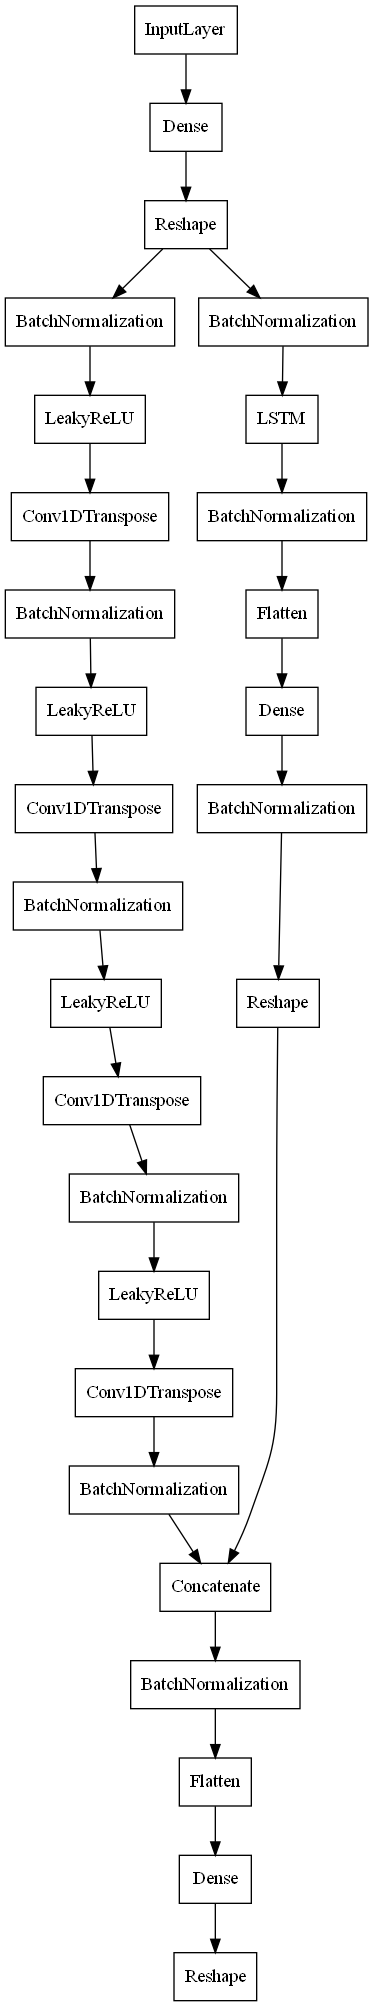

In [7]:
tf.keras.utils.plot_model(make_generator_model(choice), show_layer_names=False)

We test the untrained generator creating an 'image'.

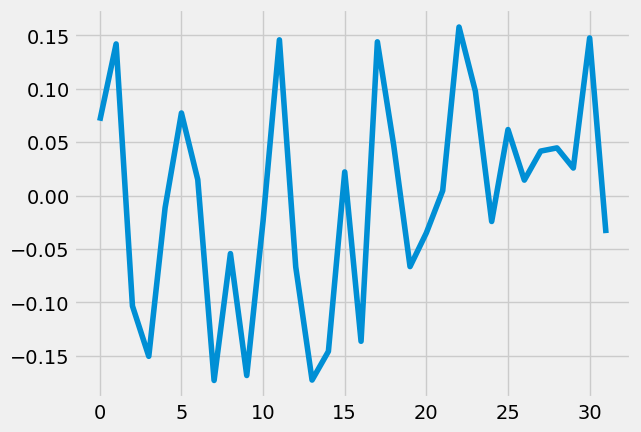

In [8]:
generator = make_generator_model(choice)

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.plot(generated_image[0, :, 0])

In [9]:
generator.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 1024)         103424      ['input_2[0][0]']                
                                                                                                  
 reshape_3 (Reshape)            (None, 4, 256)       0           ['dense_3[0][0]']                
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 4, 256)      1024        ['reshape_3[0][0]']              
 rmalization)                                                                               

#### The Discriminator


In [10]:
def make_discriminator_model(choice = 'dcgan'):
    if choice == 'dcgan':
        d_kernel = 5
        df_dim = 32

        model = keras.Sequential()
        model.add(layers.InputLayer(input_shape=(data_dim, data_channel)))
        model.add(layers.Conv1D(df_dim, d_kernel, strides=2, padding='same'))
        model.add(layers.LeakyReLU())

        D_single_block(model, df_dim*2, d_kernel)
        D_single_block(model, df_dim*4, d_kernel)
        
        model.add(layers.Flatten())
        model.add(layers.Dense(1, use_bias=False))
        
    elif choice == 'wgan_gp':
        d_kernel = 5
        df_dim = 32

        model = keras.Sequential()
        model.add(layers.InputLayer(input_shape=(data_dim, data_channel)))
        model.add(layers.Conv1D(df_dim, d_kernel, strides=2, padding='same'))
        model.add(layers.LeakyReLU())

        D_single_block_0(model, df_dim*2, d_kernel)
        D_single_block_0(model, df_dim*4, d_kernel)
        
        model.add(layers.Flatten())
        model.add(layers.Dense(1, use_bias=False))
        
    elif choice == 'wgan':
        d_kernel = 5
        df_dim = 32
        additional = {'kernel_initializer': tf.random_normal_initializer(stddev=0.02),
                'kernel_constraint': lambda w: tf.clip_by_value(w,-0.01,0.01)}

        model = keras.Sequential()
        model.add(layers.InputLayer(input_shape=(data_dim, data_channel)))
        model.add(layers.Conv1D(df_dim, d_kernel, strides=2, padding='same', **additional))
        model.add(layers.LeakyReLU())

        D_single_block(model, df_dim*2, d_kernel, **additional)
        D_single_block(model, df_dim*4, d_kernel, **additional)
        
        model.add(layers.Flatten())
        model.add(layers.Dense(1, use_bias=False, **additional))
    
    elif choice == 'wgan_M':
        d_kernel = 5
        df_dim = 32

        model = keras.Sequential()
        model.add(layers.InputLayer(input_shape=(data_dim, data_channel)))
        model.add(layers.Conv1D(df_dim, d_kernel, strides=2, padding='same'))
        model.add(layers.LeakyReLU())
        model.add(layers.Dropout(0.4))

        D_single_block(model, df_dim*2, d_kernel)
        model.add(layers.Dropout(0.4))
        D_single_block(model, df_dim*4, d_kernel)
        model.add(layers.Dropout(0.4))
        
        model.add(layers.Flatten())
        model.add(layers.Dense(1, use_bias=False))

    elif choice == 'wgan_M2':
        d_kernel = 5
        df_dim = 32

        model = keras.Sequential()
        model.add(layers.InputLayer(input_shape=(data_dim, data_channel)))
        
        model.add(layers.Conv1D(df_dim, d_kernel, strides=2, padding='same'))
        model.add(layers.LeakyReLU())
        model.add(layers.Dropout(0.4))

        D_single_block_0(model, df_dim*2, d_kernel)
        model.add(layers.Dropout(0.4))
        D_single_block_0(model, df_dim*4, d_kernel)
        model.add(layers.Dropout(0.4))
        
        model.add(layers.Flatten())
        model.add(layers.Dense(1, use_bias=False))
        
        
    elif choice == 'wgan_LSTM':
        d_kernel = 5
        df_dim = 32

        model = keras.Sequential()
        model.add(layers.InputLayer(input_shape=(data_dim, data_channel)))
        
        model.add(layers.LSTM(64, activation='relu', return_sequences=True, dropout = 0.5))
        
        model.add(layers.Flatten())
        model.add(layers.Dense(1, use_bias=False))
        
        
    elif choice == 'wgan_par':
        d_kernel = 5
        df_dim = 32
        
        input_shape = layers.Input(shape = (data_dim, data_channel))

        model_1 = layers.Conv1D(df_dim, d_kernel, strides=2, padding='same')(input_shape)
        model_1 = layers.LeakyReLU()(model_1)
        model_1 =layers.Dropout(0.5)(model_1)
        
        model_1 = layers.Conv1D(df_dim*2, d_kernel, strides=2, padding='same', use_bias=False)(model_1)
        model_1 = layers.LeakyReLU()(model_1)
        model_1 = layers.Dropout(0.5)(model_1)
        
        model_1 = layers.Conv1D(df_dim*4, d_kernel, strides=2, padding='same')(model_1)
        model_1 =layers.LeakyReLU()(model_1)
        model_1 =layers.Dropout(0.5)(model_1)
        
        model_1 = layers.Flatten()(model_1)
        #model_1 = layers.Dense(32, use_bias=False)(model_1)
        #model_1 =layers.Dropout(0.5)(model_1)
        
        model_2 = layers.LSTM(64, activation='relu', return_sequences=True, dropout = 0.5)(input_shape)
        model_2 = layers.Flatten()(model_2)
        
        model_2 = layers.Dense(df_dim*16)(model_2)
        model_2 =layers.Dropout(0.5)(model_2)
        #model_2 = layers.Dense(32, use_bias=False)(model_2)

        merged = keras.layers.concatenate([model_1, model_2], axis=1)
        out = layers.Dense(1, use_bias=False)(merged)

        model = keras.Model(input_shape, out)
        
        
    elif choice == 'wgan_par_2':
        d_kernel = 5
        df_dim = 32

        model = keras.Sequential()
        model.add(layers.InputLayer(input_shape=(data_dim, data_channel)))
        
        model.add(layers.Conv1D(df_dim, d_kernel, strides=2, padding='same'))
        model.add(layers.LeakyReLU())
        model.add(layers.Dropout(0.1))

        D_single_block_0(model, df_dim*2, d_kernel)
        model.add(layers.Dropout(0.1))
        D_single_block_0(model, df_dim*4, d_kernel)
        model.add(layers.Dropout(0.1))
        
        model.add(layers.Flatten())
        model.add(layers.Dense(1, use_bias=False))

    return model

We test also the untrained discriminator to classify the generated 'images' as real or fake. The model will be trained to output positive values for real 'images', and negative values for so-called 'fake images'.

In [11]:
discriminator = make_discriminator_model(choice)
decision = discriminator(generated_image)
print(decision) #it is near to 0 because the discriminator is not trained

tf.Tensor([[-0.00340465]], shape=(1, 1), dtype=float32)


The structure of the discriminator is the following.

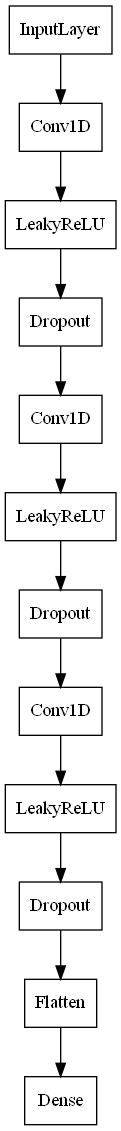

In [12]:
tf.keras.utils.plot_model(make_discriminator_model(choice), show_layer_names=False)

In [13]:
discriminator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 16, 32)            192       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 16, 32)            0         
                                                                 
 dropout (Dropout)           (None, 16, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 8, 64)             10240     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 8, 64)             0         
                                                                 
 dropout_1 (Dropout)         (None, 8, 64)             0         
                                                                 
 conv1d_2 (Conv1D)           (None, 4, 128)            4

#### Loss function and optimizations.

Tipically, the loss function of a GAN has the following strtucture.  Using the same notation in [Quant Gan](https://github.com/pnhuy/quantgans) we denote the Generator as a network with parameter space $\Omega^{(g)}$:

> $$g: \mathbb{R}^{N_Z} \times \Omega^{(g)} \rightarrow \mathbb{R}^{N_Z};$$

On the other hand, the Discriminator $d$ is the composition of network $\tilde{d}$ and sigmoid function $\sigma$:
> $$\tilde{d}: \mathbb{R}^{N_Z} \times \Omega^{(d)} \rightarrow \mathbb{R};$$
> $$\sigma: \mathbb{R} \rightarrow [0,1]: x \rightarrow \frac{1}{1 + \exp{-x}};$$
> $$d: (n, \eta) \rightarrow \sigma \circ \tilde{d}_\eta (x);$$

By the above definition, the loss function is defined by:

$$ L(\theta, \eta) := \mathbb{E} \left [ \log (d_\eta (X) \right ] + \mathbb{E} \left [ \log (1- d_\eta (g_\theta (Z)) \right ];$$

with $Z$ is the noise prior and $X$ is the targeted (or data) random variable.

The objective of training step is a min-max game that optimize:

$$ \min_{\theta \in \Omega^{(g)}} \max_{\eta \in \Omega^{(d)}} L (\theta, \eta). $$

The generator’s and discriminator’s parameters $(\theta, \eta)$ are trained by alternating the
computation of their gradients $\nabla_\eta L(\theta, \eta)$ and $\nabla_\theta L(\theta, \eta)$ and updating their respective parameters. To get a close approximation of the optimal discriminator $d_{\eta *}$ (Goodfellow et al., 2014, Proposition 1) it is common to compute the discriminators gradient multiple times and ascent the parameters $\eta$.
Below there is the code related to the loss function for each type of GAN.

In [14]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
#def ls_loss(a,b):
#    return tf.reduce_mean(tf.nn.l2_loss(a - b)) 

#### Discriminator loss


In [15]:
def discriminator_loss(real_output, fake_output, choice='dcgan', generated_images=None, images=None):
    if choice == 'dcgan': #standard loss
        real_loss = cross_entropy(tf.ones_like(real_output), real_output) 
        fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
        total_loss = real_loss + fake_loss
        total_loss_0 = real_loss 
        
    elif choice == 'wgan':
        real_loss = -tf.reduce_mean(real_output)
        fake_loss = tf.reduce_mean(fake_output)
        total_loss = real_loss + fake_loss
        total_loss_0 = real_loss 
        
    elif choice in ['wgan_gp', 'wgan_M', 'wgan_M2', 'wgan_LSTM', 'wgan_par', 'wgan_par_2']:
        real_loss = -tf.reduce_mean(real_output)
        fake_loss = tf.reduce_mean(fake_output)

        alpha = tf.random.uniform([images.shape[0],1,1])
        interpolates = alpha*images + ((1-alpha)*generated_images)
        disc_interpolates = discriminator(interpolates, training=True)
        gradients = tf.gradients(disc_interpolates, interpolates)[0]
        slopes = tf.sqrt(tf.reduce_sum(tf.square(gradients), axis=[1]))
        gradient_penalty = tf.reduce_mean((slopes-1)**2)
        lam = 10
        total_loss = real_loss + fake_loss + lam*gradient_penalty
        total_loss_0 = -tf.reduce_mean(real_output)

    return total_loss, total_loss_0

#### Generator loss

In [16]:
def generator_optimizer_fun(choice='dcgan'):
    if choice == 'dcgan':
        return tf.keras.optimizers.Adam(1e-4, beta_1=0.5) 
    elif choice == 'wgan_gp':
        return tf.keras.optimizers.Adam(1e-4, beta_1=0., beta_2=0.9)            
    elif choice in ['wgan','wgan_M', 'wgan_M2', 'wgan_LSTM','wgan_par','wgan_par_2']:
        return tf.keras.optimizers.RMSprop(5e-5)
        
def discriminator_optimizer_fun(choice='dcgan'):
    if choice == 'wgan_gp':
        return tf.keras.optimizers.Adam(1e-4, beta_1=0., beta_2=0.9)
    elif choice in ['wgan','wgan_M', 'wgan_M2', 'wgan_LSTM','wgan_par','wgan_par_2']:
        return tf.keras.optimizers.RMSprop(5e-5) 
    elif choice == 'dcgan':
        return tf.keras.optimizers.Adam(1e-4, beta_1=0.5)
    
generator_optimizer = generator_optimizer_fun(choice)
discriminator_optimizer = discriminator_optimizer_fun(choice)

In [17]:
def generator_loss(fake_output, choice='dcgan', real_output=None):
    if choice in ['wgan','wgan_gp', 'wgan_M', 'wgan_M2', 'wgan_LSTM','wgan_par','wgan_par_2']:
        loss = -tf.reduce_mean(fake_output)
    elif choice == 'dcgan':
        loss = cross_entropy(tf.ones_like(fake_output), fake_output)
    return loss

#### Optimizers
The discriminator and the generator optimizers are different since we will train two networks separately.

#### Save checkpoints
Below there is the code to save models, which can be helpful in case a long running training task is interrupted.

In [18]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                  discriminator_optimizer=discriminator_optimizer,
                                  generator=generator,
                                  discriminator=discriminator)

### Define the training loop


The training loop begins with generator receiving a random seed as input. That seed is used to produce an 'image'. The discriminator is then used to classify 'real images' (drawn from the training set) and 'fakes images' (produced by the generator). The loss is calculated for each of these models, and the gradients are used to update both the generator and discriminator. As suggested in Vuletić, M. et all. (2023), we enlarge also the generator loss function incorporating other metrics. We decide to use the MSE with a weight ($\alpha$) equal to 0.01.

In [19]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".

import statsmodels.api as sm

@tf.function
def train_step(images, choice, disc_n):
    noise = tf.random.normal([images.shape[0], noise_dim])
    K = 0.99
    
    for _ in range(disc_n):
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            generated_images = generator(noise, training=True)
            #MSE = tf.math.reduce_mean((images - generated_images)**2)

            real_output = discriminator(images, training=True)
            fake_output = discriminator(generated_images, training=True)

            gen_loss = generator_loss(fake_output, choice) + (1-K)*tf.math.reduce_mean((images - generated_images)**2)

            if choice in ['wgan_gp', 'wgan_M', 'wgan_M2', 'wgan_LSTM', 'wgan_par','wgan_par_2']:
                disc_loss, disc_loss_0 = discriminator_loss(real_output, fake_output, choice, generated_images = generated_images, images= images)
            else:
                disc_loss, disc_loss_0  = discriminator_loss(real_output, fake_output, choice)

        gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
        
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

    return gen_loss, disc_loss, disc_loss_0

In [20]:
#train the network on the data
def train(dataset, test, epochs, choice, disc_n):
    for epoch in range(epochs):
        start = time.time()
        G_list = []; D_list = []; D_list_0 =[]
        
        for image_batch in dataset:
            gen_loss, disc_loss, disc_loss_0 = train_step(image_batch, choice, disc_n)
            G_list.append(gen_loss)
            D_list.append(disc_loss) 
            D_list_0.append(disc_loss_0) 

        G_loss.append(np.mean(G_list))
        D_loss.append(np.mean(D_list))
        D_loss_0.append(np.mean(D_list_0))

        #produce images for the GIF as we go
        display.clear_output(wait=True)
        plot_loss(G_loss, D_loss, D_loss_0)
        for fun, seed in test:
            fun(generator, epoch + 1, seed) # plot test results

        #save the model every 100 epochs
        if (epoch + 1) % 100 == 0:
            checkpoint.save(file_prefix = checkpoint_prefix) ## temp

        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

        # #generate after the final epoch
        #display.clear_output(wait=True)
        #generate_and_save_images(generator, epochs, seed) ##temp

In the following, some useful function for the ongoing analysis.

In [21]:
def plot_loss(G_loss, D_loss, D_loss_0):
    fig = plt.figure(figsize=(16,10)) #(4,4) to small window
    fig.suptitle('Development of training losses during training')
    plt.plot(D_loss, label='Discriminator loss with gradient penality')
    plt.plot(D_loss_0, label='Real loss')
    plt.plot(G_loss, label='Generator loss')
    plt.xlabel("Epochs")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

In [22]:
def plot_hist(model, epoch, test_input):
    #Notice `training` is set to False.
    #This is so all layers run in inference mode (batchnorm).
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4,4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        #plt.plot(predictions[i, :, 0])
        #plt.axis('off')
        plt.hist(predictions[i, :, 0]) ## temp

    #plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

In [23]:
from scipy import stats
def plot_uniform_test(model, epoch, test_input):
    #Notice `training` is set to False.
    #This is so all layers run in inference mode (batchnorm).
    def chisq_test(v):
        size = len(v)
        unit = int(np.sqrt(size))
        df = unit - 1
        cls = np.floor(v * unit)
        cls = cls[(cls>=0)&(cls<unit)]
        _, counts = np.unique(cls, return_counts=True)
        s = np.sum((counts - size/unit)**2/(size/unit))
        return 1-stats.chi2.cdf(s,df = df)

    predictions = model(test_input, training=False)
    ls1 = []; ls2 = []
    for i in range(predictions.shape[0]):
        ls1.append(stats.kstest(predictions[i, :, 0], 'uniform')[1])
        ls2.append(chisq_test(predictions[i, :, 0]))

    f, (ax1, ax2) = plt.subplots(2, 1, sharey=True, figsize=(4,4))
    ax1.set_title('p-values of KS test')
    ax1.hist(ls1)
    ax2.set_title('p-values of chisq test')
    ax2.hist(ls2)
    f.tight_layout()

    plt.show()

In [24]:
def plot_mean(model, epoch, test_input):
    #Notice `training` is set to False.
    #This is so all layers run in inference mode (batchnorm).
    predictions = model(test_input, training=False)
    mean = tf.reduce_mean(predictions,axis=[1,2])
    fig = plt.figure(figsize=(4,4))
    plt.scatter(mean,tf.zeros_like(mean))
    #plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

In [25]:
def plot_var(model, epoch, test_input):
    #Notice `training` is set to False.
    #This is so all layers run in inference mode (batchnorm).
    predictions = model(test_input, training=False)
    mean = np.var(predictions,axis=(1,2))
    fig = plt.figure(figsize=(4,4))
    plt.scatter(mean,np.zeros_like(mean))
    #plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

## GDP quarterly data
To perform our goals, we will use quarterly seasonally adjusted observations of real Gross Domestic Product (available at the [Fred](https://fred.stlouisfed.org/series/GDPC1) platform). Real GDP is the inflation adjusted value of the goods and services produced by labor and property located in the United States. The methodology is based on the Chained dollars 2012. It refers to a method of measuring real GDP, taking into account changes in both price levels and quantities of goods and services produced. This approach is commonly used by economists and is based on the idea of a chain-weighted index. The calculation of chained dollars 2012 adjusts nominal GDP for inflation and reflects changes in the composition of the economy over time. This method allows for more accurate comparisons of economic growth and output over different periods. For more information, please visit the [Bureau of Economic Analysis](https://www.bea.gov/resources/methodologies/nipa-handbook).
The structure of the ongoing analysis is the following,

> 1) doing a descriptive analysis of the data;

> 2) choosing one GAN to start with; 

> 3) training the GAN;

> 4) evaluating the outcome.

### **Data**
The dataset is composed of quarterly observations from 1Q 1947 to 4Q 2020 and the analysis will be carried out considering the following machine learning algorithms and time series models.
<p>1) Long Short Term Memory (LSTM);
<p>2) XG-BOOST;
<p>3) Prophet.
<p>4) ARIMA
    
The data series $s_{0:T} \in \mathbb{R}^{N_X \times (T+1)}$ is converted into log return via the below transformation:

$$r_t = \log \left ( \frac{s_t}{s_{t-1}} \right )$$

In finance, return refers to the profit or loss that an investor or trader earns from an investment over a particular period. In the macroeconomic framework it is better known as growth rate. Time series returns can help identify long-term trends in financial markets or economic indicators, such as inflation rates or unemployment levels. This can be useful for businesses and governments in developing policies and strategies that take into account these trends.
    
The problem of whether GDP is a random walk or trend stationary has been 
studied by various authors [9]-[14]. The results have been mixed; some found that GDP was a random walk (non-stationary) and others found that GDP was (trend) stationary. Considering financial context, the random walk theory (Godfrey, M.D., 1964) argues that past performance or trends of an investment cannot be used to predict its future performance accurately. This theory assumes that the stock market price movements are based on random events or news that occur from time to time. According to the random walk theory, investors cannot outperform the market consistently by using technical or fundamental analysis. This theory suggests that a buy and hold strategy is an effective way to invest because it is impossible to predict market trends.

The random walk theory is commonly used in the stock market as a justification for passive investment strategies such as index funds. It is also used to explain why most active fund managers underperform compared to passive investment strategies. In summary, the random walk theory suggests that stock prices and the market are unpredictable, making it challenging to outperform the market consistently.

In [26]:
#Get Log Returns * 100 and store in dataframes
def f_log_return(data):
    tmp = np.asarray(data)
    lst = [0]
    for i in range(1,len(data)):
        lst.append(math.log(tmp[i]/tmp[i-1])*100)   
    data["Log Returns"] = lst
    return data


prices_returns = pd.read_csv(r'.\GDPC1.csv')
f_log_return(prices_returns['GDPC1'])
prices_returns['ret'] = f_log_return(prices_returns['GDPC1'])['Log Returns']
prices_returns.index = pd.to_datetime(prices_returns['DATE'])
prices_returns = prices_returns[0:296]
prices = prices_returns.iloc[:,1].to_frame()
log_returns = prices_returns.iloc[:,2].to_frame()

In [27]:
prices_returns

DATE      GDPC1       ret
DATE                                       
1947-01-01  1947-01-01   2034.450  0.000000
1947-04-01  1947-04-01   2029.024 -0.267062
1947-07-01  1947-07-01   2024.834 -0.206717
1947-10-01  1947-10-01   2056.508  1.552168
1948-01-01  1948-01-01   2087.442  1.492999
...                ...        ...       ...
2019-10-01  2019-10-01  19215.691  0.442068
2020-01-01  2020-01-01  18989.877 -1.182114
2020-04-01  2020-04-01  17378.712 -8.866004
2020-07-01  2020-07-01  18743.720  7.561275
2020-10-01  2020-10-01  18924.262  0.958604

[296 rows x 3 columns]

### Exploratory data analysis
Exploratory data analysis (EDA) is the process of examining and summarizing data in order to get a better understanding of its characteristics, patterns, and relationships. It is a critical step in data analysis, as it helps to identify important features or trends within the data that may not be immediately apparent. The techniques involved in EDA can vary widely, depending on the type and complexity of the data. Some common techniques include visualization, such as plotting data in graphs or charts, calculating summary statistics, such as mean or standard deviation, and identifying outliers or unusual observations.

EDA is often used in data mining, statistical analysis, and machine learning applications. By gaining a more detailed understanding of the data, analysts and researchers can make more informed decisions and develop better models or algorithms. Overall, EDA is a powerful tool for exploring and analyzing data, and therefore, we will perform it on the dataset. Below real GDP log returns and cumulative log returns features are outlined.

In [28]:
prices.describe()

GDPC1
count    296.000000
mean    8821.181726
std     5245.461697
min     2024.834000
25%     4184.903250
50%     7416.382000
75%    13490.952250
max    19215.691000

Text(0, 0.5, 'Billions of chained 2012 dollars')

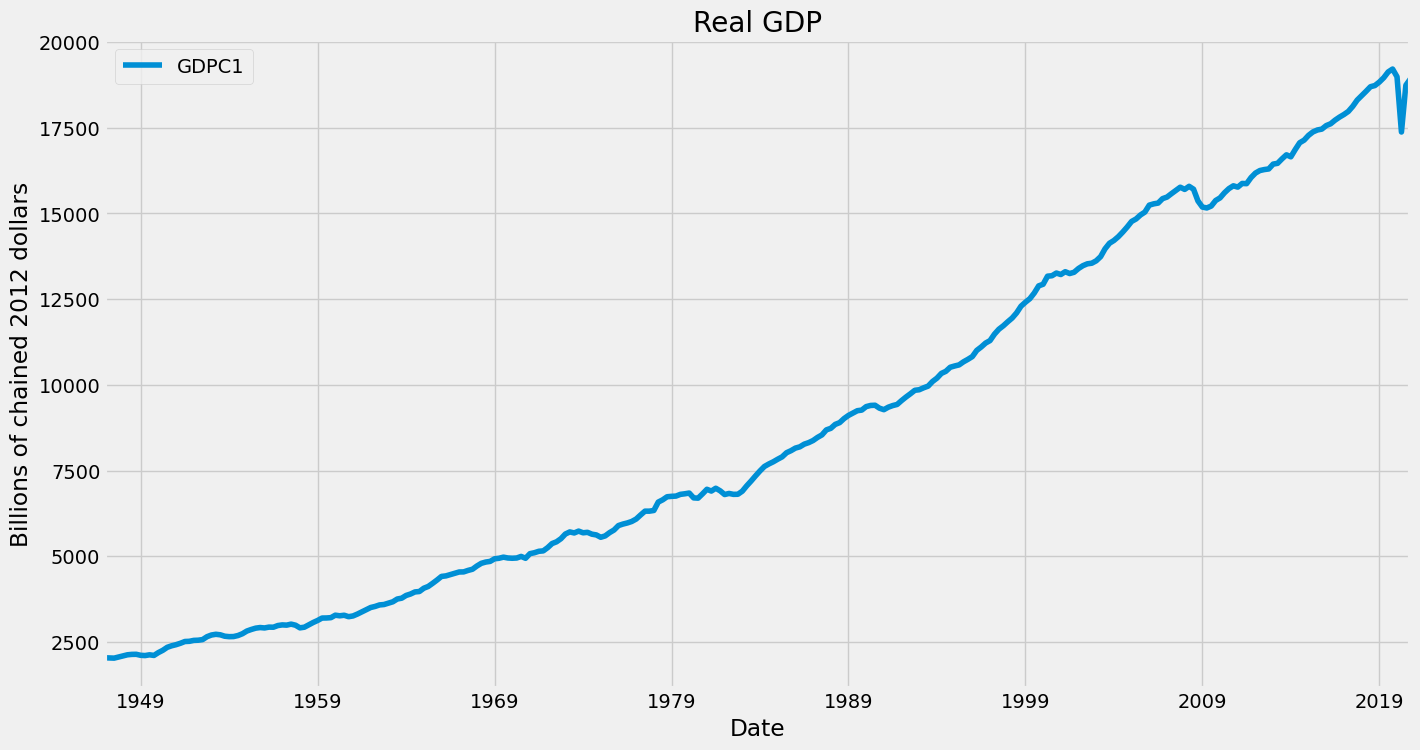

In [29]:
_ = prices.plot(figsize=(15, 8), title="Real GDP")
plt.xlabel('Date')
plt.ylabel('Billions of chained 2012 dollars')

##### Log returns and Cumulative log returns.

In [30]:
log_returns.describe()

ret
count  296.000000
mean     0.753452
std      1.154693
min     -8.866004
25%      0.300915
50%      0.748685
75%      1.243511
max      7.561275

Text(0, 0.5, 'Value')

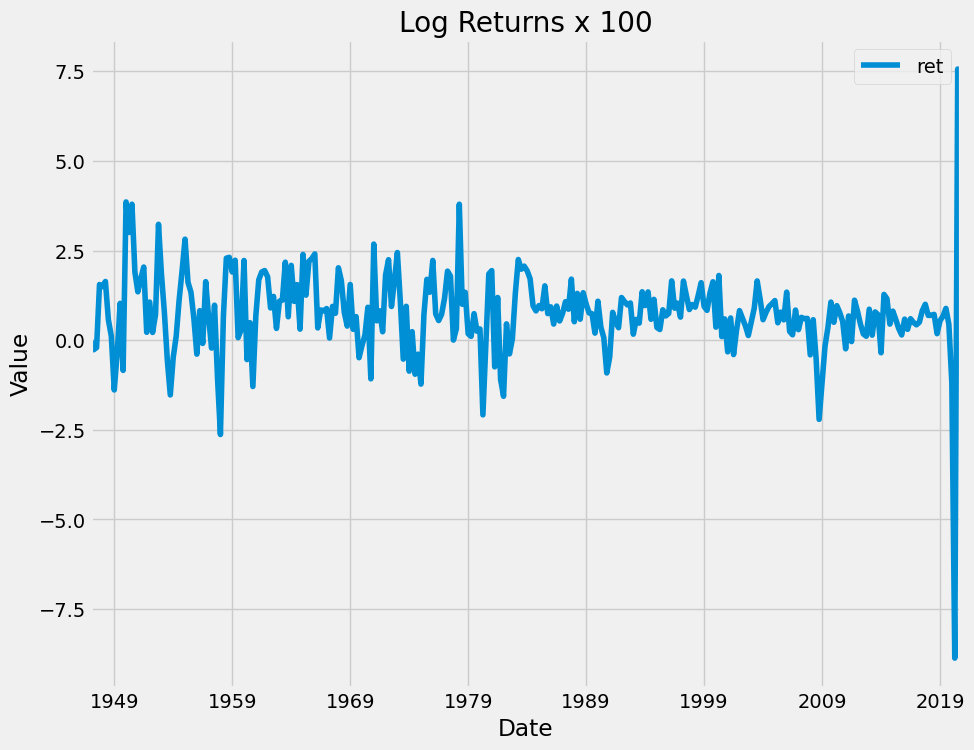

In [31]:
_ = log_returns.plot(figsize=(10, 8), title="Log Returns x 100")
plt.xlabel('Date')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

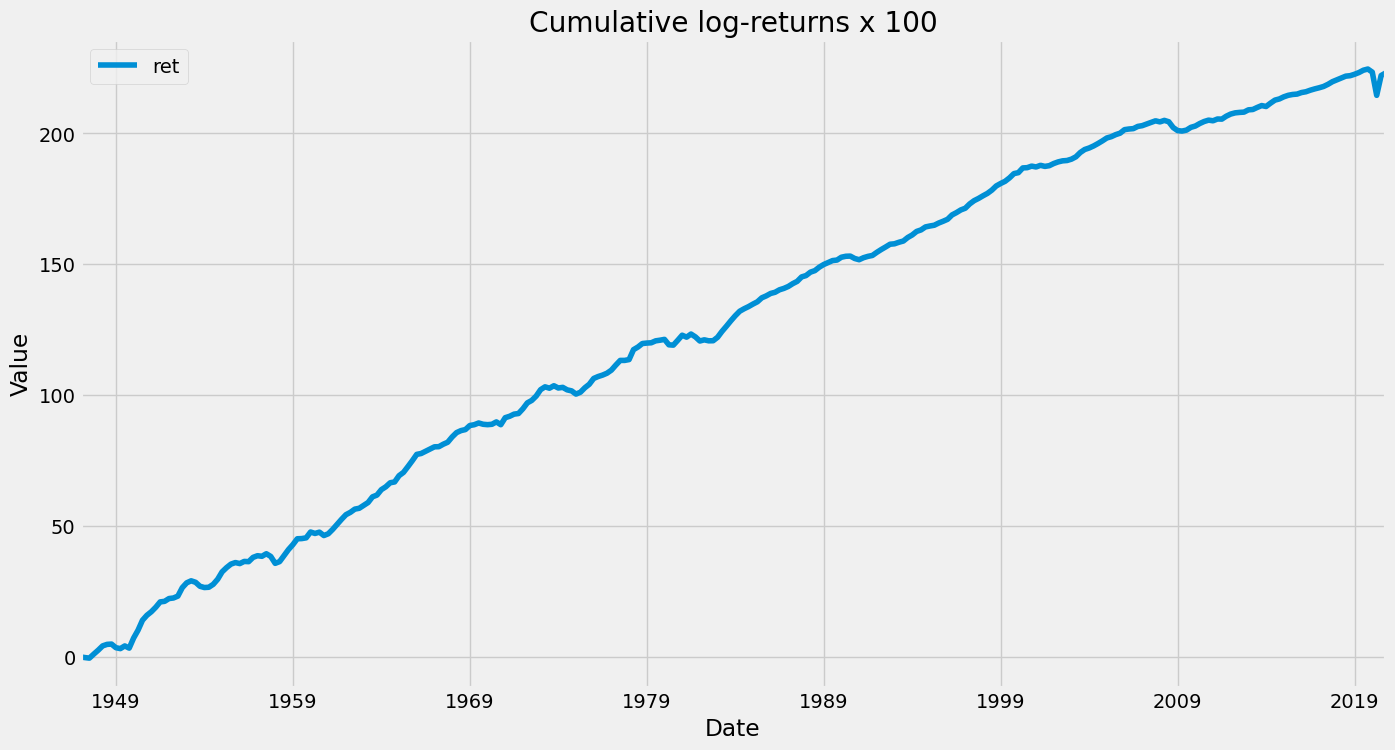

In [32]:
np.cumsum(log_returns).plot(figsize=(15, 8), title="Cumulative log-returns x 100")
plt.xlabel('Date')
plt.ylabel('Value')

In [33]:
np.cumsum(log_returns)

ret
DATE                  
1947-01-01    0.000000
1947-04-01   -0.267062
1947-07-01   -0.473779
1947-10-01    1.078389
1948-01-01    2.571388
...                ...
2019-10-01  224.550167
2020-01-01  223.368054
2020-04-01  214.502050
2020-07-01  222.063325
2020-10-01  223.021929

[296 rows x 1 columns]

### Transform Data and Convert to Tensor

To fully understand data generating process, we don't feed the whole series to discriminator, but only sub-sequence with a predefined length was feed. The rolling window help to generate the sub-sequence with receptive field size $T^{(d)}$ from the log return sequence. Moreover, converting data into a tensor is essential for machine learning because neural networks are designed to work with tensors as the fundamental data structure. A tensor is a multidimensional array that represents numerical data along with its dimensions. In machine learning models, a tensor is used to represent the input data and model parameters.

Furthermore, when data is converted into a tensor, it can be manipulated via matrix operations, which are highly optimized for parallel computation. Performing computations on multidimensional arrays is vital for deep learning because the matrix computations can be parallelized, making the computation more efficient.

In [34]:
#Rolling window applied to dataframe before converting it to tensor
def rolling_window(data, window=data_dim, stride=1): 
    """
    takes an array and returns rolling window of inputs

    :data: array of values
    :window: size of window you would like each return input
    :stride: do we want to stride inputs 
    
    :return: array of windows
    """    
    x = []
    current = 0
    total = (len(data)/stride)-window
    for i in range(int(total)+1):
        x.append(data[current:current+window])
        current += stride
    return x

data = rolling_window(np.asarray(log_returns))
train_data = np.stack(data, axis=0)

#Convert to tensor
train_data = tf.convert_to_tensor(train_data, np.float32)
train_dataset = tf.data.Dataset.from_tensor_slices(train_data).shuffle(BUFFER_SIZE).batch(BATCH_SIZE) #Perfect shuffle and batched

### **GAN training**

As outlined in the previous section we will study different WGAN-GP archetypes. All proposed GAN were trained for a number of epoches equal to 1000 with a checkpoint every 100 epochs. The CNN-WGAN-GP have an overall good performance in understood the data generation process, but it does not completely fulfill to learn autocorrelation among observations. On the other hand, LSTM-WGAN-GP capture more accurately the temporal dimension of the data. Nevertheless they are not mutually exclusive and as just applied in other studies (Liu, Haoqiang, et al., 2021) they may be combined to obtain more accurate results. Under this prospective we propose a new GAN which adopt the same structure proposed in Ishaan Gulrajani, et al. (2017), but with a parallel architecture for the generator in order to combine CNNs and RNNs (PAR-WGAN-GP). In this setup, the output of the CNN is used to extract relevant features from the input data, while the LSTM is used to capture the temporal dependencies between the input data. The output of the LSTM and CNN are then combined and fed into a fully connected layer.

All three proposed GAN performed reasonably well, and even if differ in their own structure, they bring more or less the same results. Maybe, with a reasonable amount of training, generators are able to learn the underlying structure of the time series. In the rest of the analysis we will outline in details the results obtained by the PAR-WGAN-GP, and we will provide only a summary of the other two archetypes.

Below are some points to stress about,

1) Even if CNN have been widely applied in the field of image and video recognition, they can be applied to time series data by using a 1D convolutional layer that is designed to operate on sequences of data points. The convolution operation performed by the 1D convolutional layer scans the input sequence with a small filter size, and captures local patterns in the data. This is particularly useful in applications where the relationships between data points change over time, such as in financial forecasting or medical diagnosis. Nevertheless, autocorrelation, which describes how a variable is correlated with itself over time, is a temporal component that CNNs have difficulty to understood.

2) RNNs (such as LSTM and GRU) are characterized by their ability to maintain an internal state, which allows them to process sequences of events and capture the temporal dependencies between them. This makes them particularly well-suited to tasks such as language modeling, speech recognition, and sentiment analysis, where the context or meaning of a sequence cannot be fully understood without knowledge of its previous elements. However, they have no the property to extract very informative, deep features.

3) Combine CNNs and RNNs is widely recognized in the literature as an approach to improve the performance of the overall model (Sainath, Tara N., et al., 2015). Parallelize CNNs and LSTM can be a powerful tool for processing sequential data and in same cases outperforming Convolutional Recurrent Neural Network (CRNN). However, the archetype consists of two networks working simultaneously and therefore the computational cost is double.

In [35]:
###Load the model below. Too time to run.

#Input for the generator: some random noise, called latent data 
#EPOCHS = 1000
#num_examples_to_generate = 16 # maximum value due to plotting 
#seed = tf.random.normal([num_examples_to_generate, noise_dim])
#disc_n = 5

In [36]:
#test = [[plot_hist, seed]]

In [37]:
# Global variables for the loss
#G_loss = []; D_loss = []; D_loss_0 = []

In [38]:
#Train the data
#train(train_dataset, test, EPOCHS, choice, disc_n)

#dict = {'Loss_G': G_loss, 'Loss_D': D_loss, 'Loss_D_0': D_loss_0}  
       
#df = pd.DataFrame(dict) 
    
# saving the dataframe 
#df.to_csv('Loss.csv') 

In [39]:
#Laoding the trained model

#checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir)) #last checkpoint
#ckpt_manager = tf.train.CheckpointManager(checkpoint, checkpoint_dir, max_to_keep=50)
checkpoint_fname = checkpoint_dir + '\ckpt-''WGAN-PAR3'
tf.print("-----------Restoring from {}-----------".format(checkpoint_fname))
checkpoint.restore(checkpoint_fname)

-----------Restoring from ./training_checkpoints\ckpt-WGAN-PAR3-----------


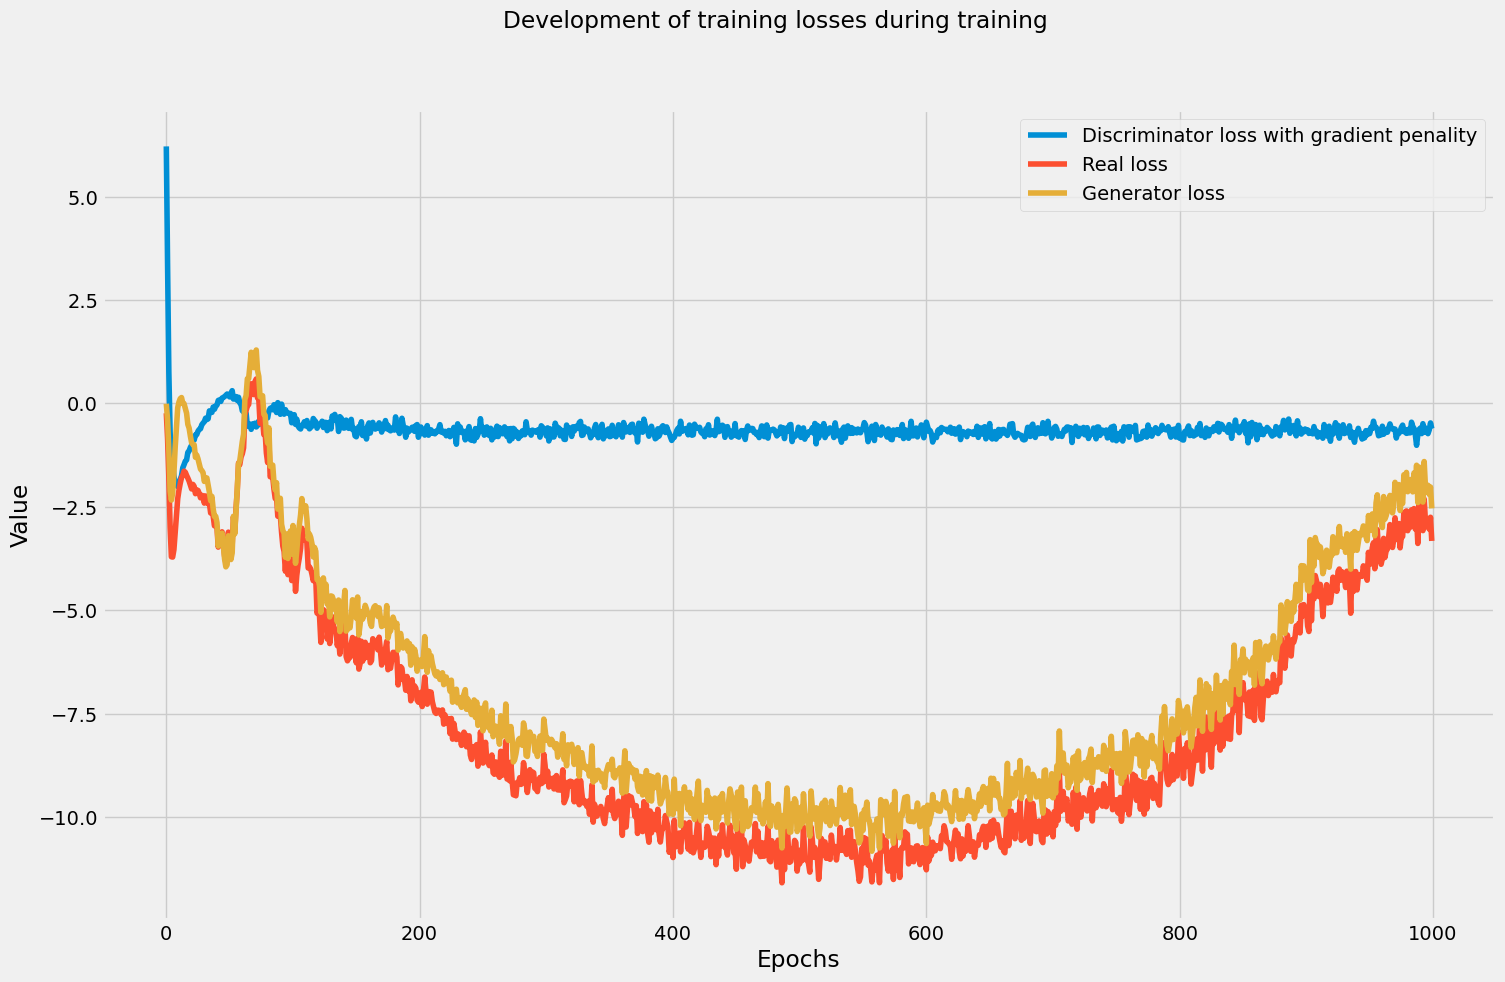

In [40]:
Loss = pd.read_csv(r'.\Loss_WGAN_PAR3.csv')
plot_loss(Loss['Loss_G'], Loss['Loss_D'], Loss['Loss_D_0'])


###  Loss function evaluation


In order to find an equilibrium between the generator and the discriminator, we decide to use a dropout rate for the discriminator equal to 0.01. By the previous graph seems that the model was trained without any issues, while the discriminator reaches a convergent oscillation between 1 and 0. On the other hand, even if the generator loss does not find a convergent point, the generator loss is almost always near the real one (i.e. value assigned by the discriminator to the real sample). Moreover, the synthetic generated data are close to their real counterparts without showing any mode collapse behaviors.

### Generated vs Original data
To evaluate the reliability of synthetic data we will use both descriptive statistics and specific metrics.

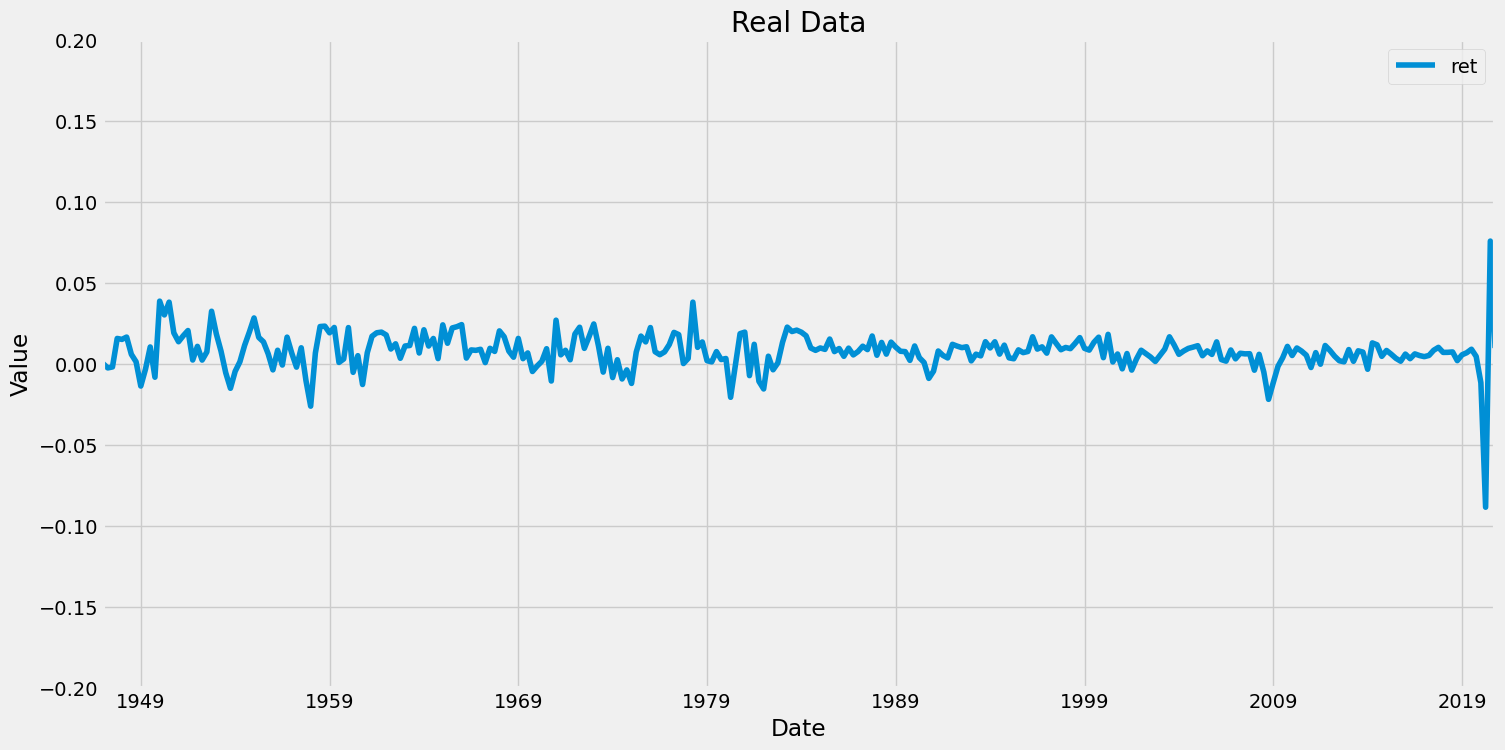

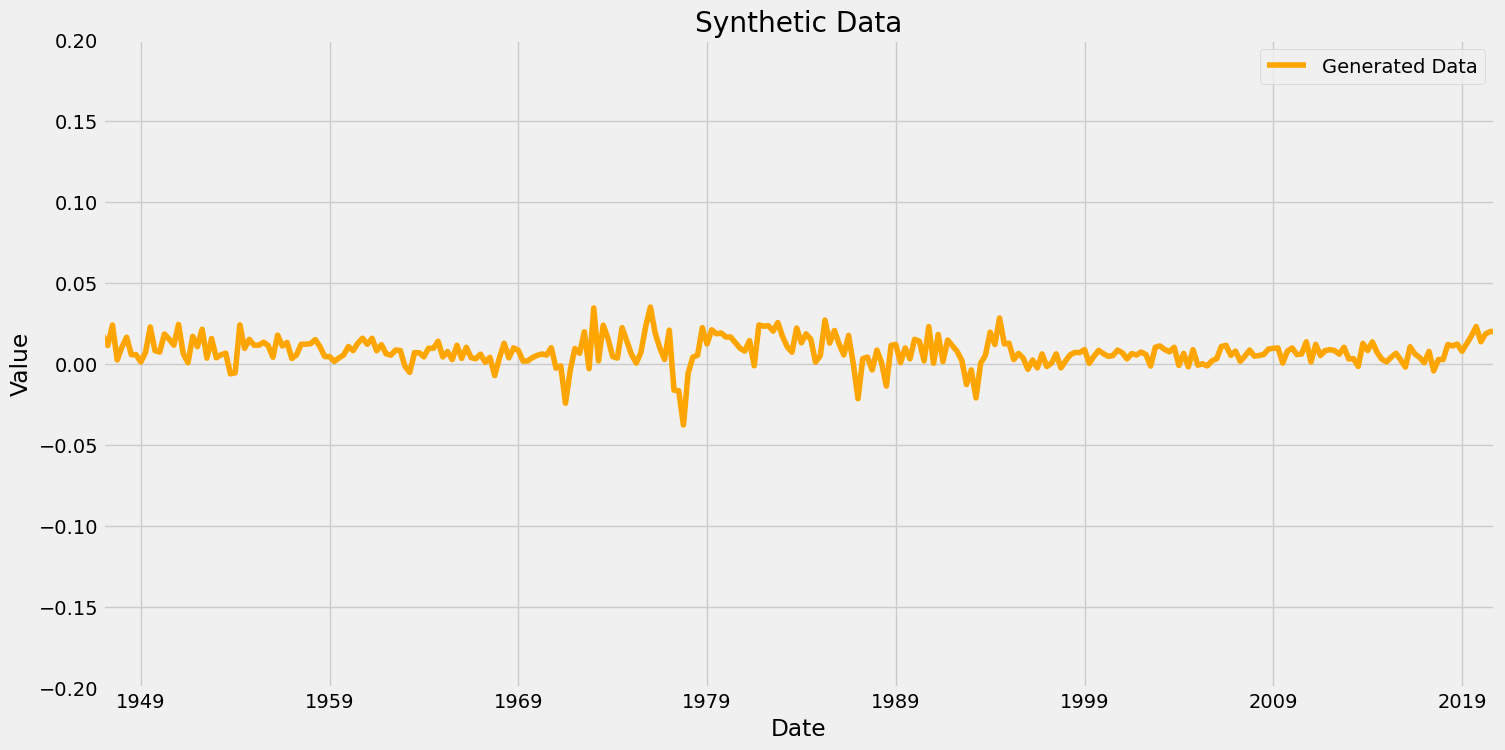

In [41]:
noise = np.random.randn(20,100) #20x32x100
predictions = generator(noise, training=True) #TRAINING TRUE OR FALSE
result = tf.squeeze(predictions) #Given a tensor input, this operation returns a tensor of the same type with all dimensions of size 1 removed.
temp = (result.numpy())
generated_data = [item for sublist in temp for item in sublist] #temp is the list getting flattened
df_generated = pd.DataFrame(generated_data,columns=['Generated Data'])

date_index = log_returns.index
df_generated = df_generated[0:296] #select the data equal to the len of the series
df_generated.index = date_index

log_returns.div(100).plot(title='Real Data', ylim=[-0.2,0.2], figsize = (16, 8)) #divided by 100 to rescale at the original values
plt.xlabel('Date')
plt.ylabel('Value')
df_generated.div(100).plot(title='Synthetic Data',ylim=[-0.2,0.2], style='orange',figsize=(16, 8))
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

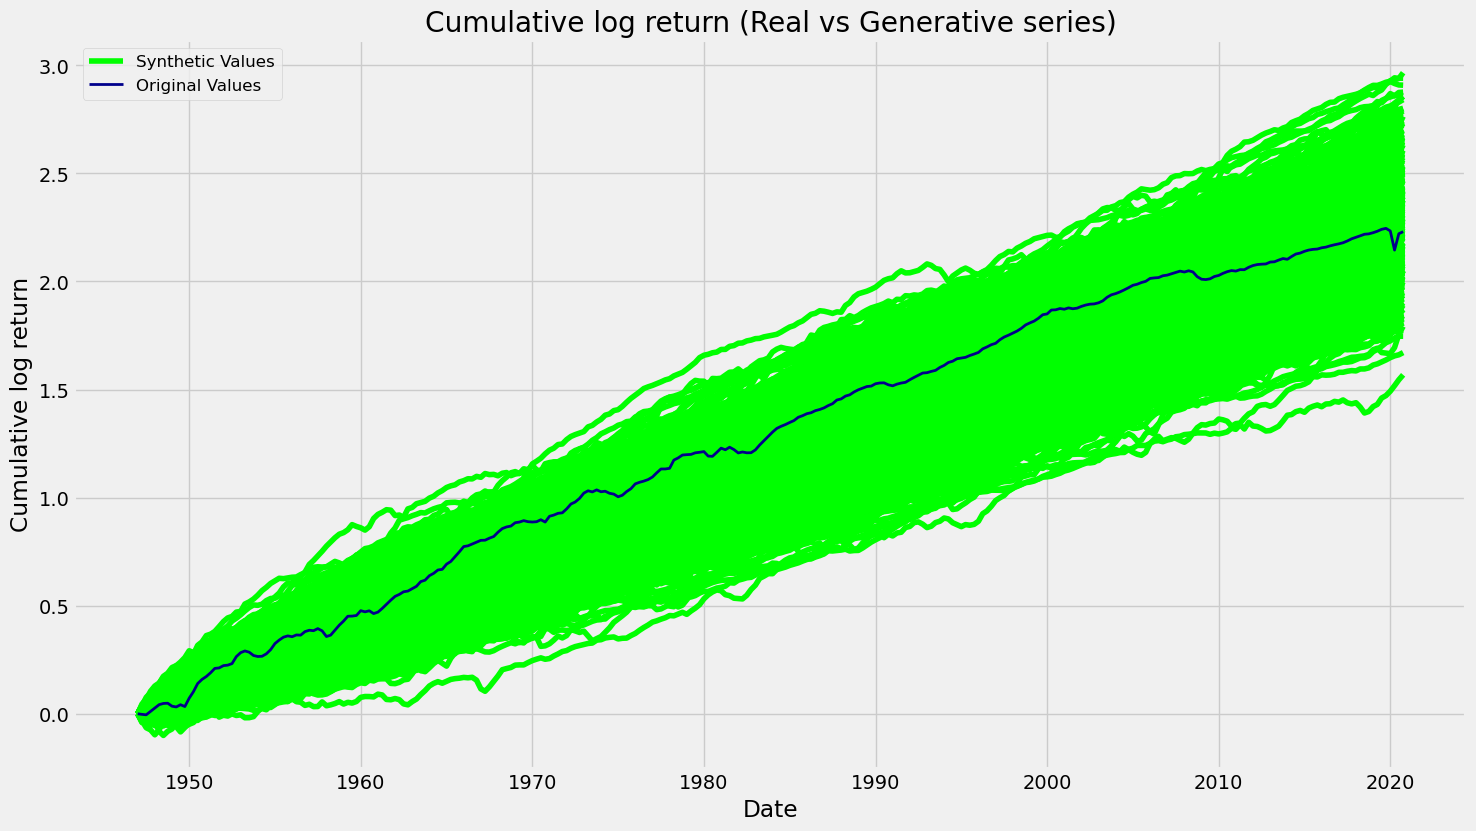

In [42]:
plt.subplots(figsize=(16, 9))

for i in range(1000):
    noise = np.random.randn(20,100) #20x32x100
    predictions = generator(noise, training=True) #TRAINING TRUE OR FALSE
    result = tf.squeeze(predictions) #Given a tensor input, this operation returns a tensor of the same type with all dimensions of size 1 removed.
    temp = (result.numpy())
    generated_data = [item for sublist in temp for item in sublist] #temp is the list getting flattened
    df_generated = pd.DataFrame(generated_data,columns=['Generated Data'])
    df_generated = df_generated[0:296] ##select the data equal to the len of the series

    df12 = df_generated.div(100) #divide by 100 to compensate for training input (x100)
    df12.iloc[0, 0] = 0
    df13 = df12.iloc[:,0].tolist()
    df = pd.DataFrame(df13, columns=['logreturns'])
    df["logr_na0"] = df.logreturns.fillna(0)
    df['cumlog'] = np.cumsum(df.logr_na0)

    list_generated = df.iloc[:,2].tolist()
    plt.plot(date_index, list_generated, color='lime')

noise = np.random.randn(20,100) #20x32x100
predictions = generator(noise, training=True) #TRAINING TRUE OR FALSE
result = tf.squeeze(predictions) #Given a tensor input, this operation returns a tensor of the same type with all dimensions of size 1 removed.
temp = (result.numpy())
generated_data = [item for sublist in temp for item in sublist] #temp is the list getting flattened
df_generated = pd.DataFrame(generated_data,columns=['Generated Data'])
df_generated = df_generated[0:296]  ##select the data equal to the len of the series
    
list_original = log_returns.div(100).iloc[:,0].tolist()
plt.plot(date_index, list_generated, label='Synthetic Values', color = 'lime')
plt.plot(date_index, np.cumsum(list_original), label='Original Values', linewidth=2, color='darkblue')
plt.xlabel("Date")
plt.ylabel("Cumulative log return")
plt.title('Cumulative log return (Real vs Generative series)')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.legend(fontsize=12)
plt.show()

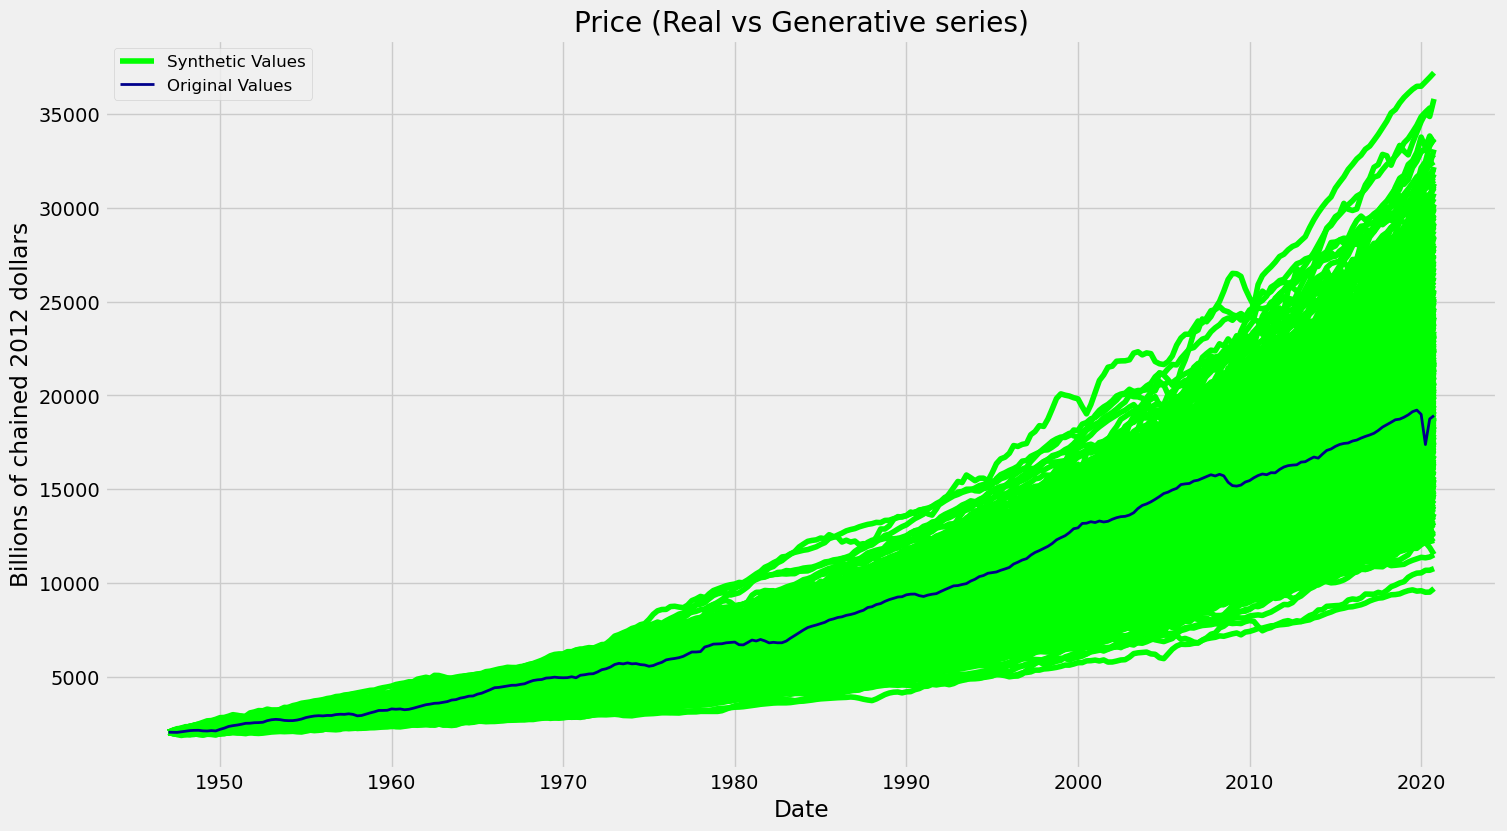

In [43]:
plt.subplots(figsize=(16, 9))

for i in range(1000):
    noise = np.random.randn(20,100) #20x32x100
    predictions = generator(noise, training=True) #TRAINING TRUE OR FALSE
    result = tf.squeeze(predictions) #Given a tensor input, this operation returns a tensor of the same type with all dimensions of size 1 removed.
    temp = (result.numpy())
    generated_data = [item for sublist in temp for item in sublist] #temp is the list getting flattened
    df_generated = pd.DataFrame(generated_data,columns=['Generated Data'])
    df_generated = df_generated[0:296] ##select the data equal to the len of the series

    df12 = df_generated.div(100) # divide by 100 to compensate for training input (x100)
    df12.iloc[0, 0] = 0
    df13 = df12.iloc[:,0].tolist()
    price0 = 2030 #arbitrary value for 4Q 1946
    df = pd.DataFrame(df13, columns = ['logreturns'])
    df['logr_na0'] = df.logreturns.fillna(0)
    df['cumlog'] = np.cumsum(df.logr_na0)
    df['norm'] = np.exp(df.cumlog)
    df['prices_back'] = price0 * df.norm

    list_generated = df.iloc[:,4].tolist()
    list_original_p = prices.iloc[:,0].tolist()
    plt.plot(date_index, list_generated, color='lime')
    
noise = np.random.randn(20,100) #20x32x100
predictions = generator(noise, training=True) #TRAINING TRUE OR FALSE
result = tf.squeeze(predictions) #Given a tensor input, this operation returns a tensor of the same type with all dimensions of size 1 removed.
temp = (result.numpy())
generated_data = [item for sublist in temp for item in sublist] # temp is the list getting flattened
df_generated = pd.DataFrame(generated_data,columns=['Generated Data'])
df_generated = df_generated[0:296] #select the data equal to the len of the series

plt.plot(date_index, list_generated, label='Synthetic Values', color='lime')
plt.plot(date_index, list_original_p, label='Original Values', linewidth=2, color='darkblue')
plt.xlabel('Date')
plt.ylabel('Billions of chained 2012 dollars')
plt.title('Price (Real vs Generative series)')
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
plt.legend(fontsize=12)
plt.show()

We can see that the data generated by the proposed GAN are graphically similar to the real ones. In addition, the real cumulative log return path is almost always centered in the green cloud of synthetic data. Probably, the model capture the underlying process of the data trying to generate new paths. Indeed, from the last graph we can observe new different real GDP pathways. The green cloud is far from being like a random walk. Thus, even though randomness has many similarities with the behavior of asset prices and some macroeconomic variables, a random walk may be an obvious simplification of reality. 

To better understand the GAN learning process, we rely on an example. Think about you’re playing with your best friend on a modified memory. It’s you versus a master. The aim of the game is not to turn cards with the same face but to understand the underlying theme of the memory (nature, landscapes, jobs, etc.). At the beginning there is only one face up card, but the master of the game feels so confident to win that he decides also to turn up some cards every 10 minutes. If you guess, you win in proportion to the face down cards, otherwise you lose. The rest is up to you. Concretely, you and the model are the two friends, and the master is the real data generation process that sometimes gives you clues to follow. If you are so smart to understood the theme of the memory quickly, it will be easy to guess what is under the  face down cards and that will be detected in the future by the master.

### ACF
Autocorrelation function is an important metric to consider when analyzing sequential data. In the below graph we can see that our proposed GAN is able to capture the autocorrelation among observations until a lag order of 20. Indeed, the MAE between the mean autocorrelation function of one thousand generated time series and the real autocorrelation function is 0,035. In this regard, the parallel archetype over perform the single ones*. 

*Note: LSTM-WGAN-GP and CNN-WGAN-GP have a MAE of 0.037 and 0.049 respectively.

Mean absolute error: 0.0349619204419767


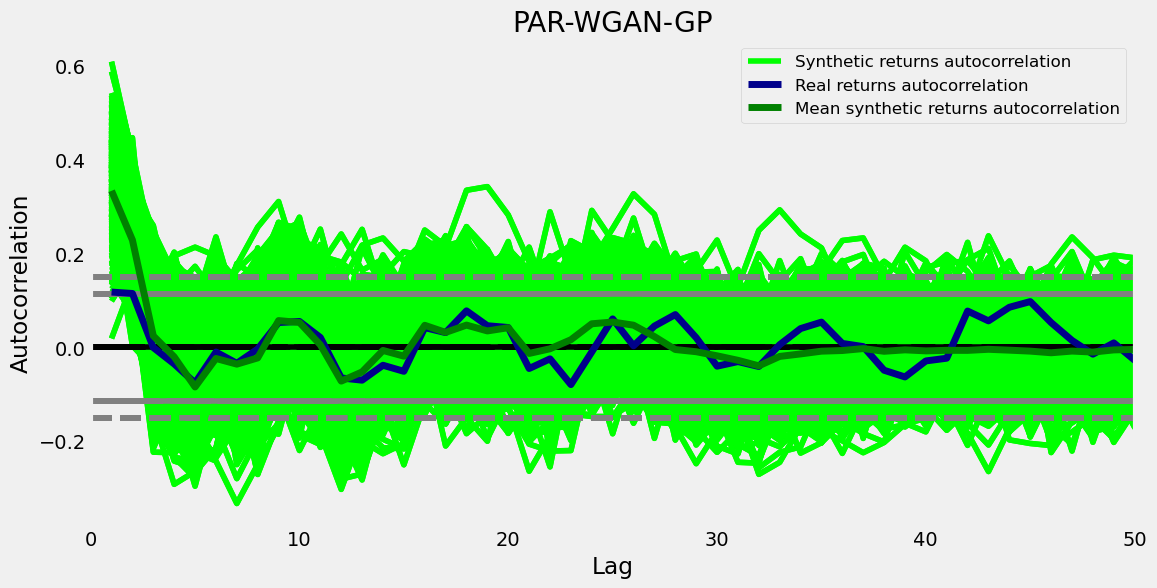

In [44]:
np.random.seed(42)

fig, ax2 = plt.subplots(1, 1, figsize=(12,6)) #ACF
df_ACF = pd.DataFrame(autocorrelation_plot(log_returns, ax=ax2, linewidth=5, color='darkblue').lines[-1].get_ydata()[0:50], columns = ['Original'])
for i in range(1000):
    noise = np.random.randn(20,100) #20x32x100
    predictions = generator(noise, training=True) # TRAINING TRUE OR FALSE
    result = tf.squeeze(predictions) #Given a tensor input, this operation returns a tensor of the same type with all dimensions of size 1 removed.
    temp = (result.numpy())
    generated_data = [item for sublist in temp for item in sublist] #temp is the list getting flattened
    df_generated = pd.DataFrame(generated_data,columns=['Generated Data'])
    df_generated = df_generated[0:296]
    pd.plotting.autocorrelation_plot(df_generated, ax=ax2, color='lime').set_xlim([0,50])
    
    df_ACF[f'Autocorrelation-{i}'] = pd.plotting.autocorrelation_plot(df_generated, ax=ax2, color='lime').lines[-1].get_ydata()[0:50]

noise = np.random.randn(20,100) #20x32x100
predictions = generator(noise, training=True) #TRAINING TRUE OR FALSE
result = tf.squeeze(predictions) #Given a tensor input, this operation returns a tensor of the same type with all dimensions of size 1 removed.
temp = (result.numpy())
generated_data = [item for sublist in temp for item in sublist] #temp is the list getting flattened
df_generated = pd.DataFrame(generated_data,columns=['Generated Data'])
df_generated = df_generated[0:296] #select the data equal to the len of the series

pd.plotting.autocorrelation_plot(df_generated, ax=ax2, color='lime', label='Synthetic returns autocorrelation').set_xlim([0,50])
pd.plotting.autocorrelation_plot(log_returns, label='Real returns autocorrelation', ax=ax2, linewidth=5, color='darkblue').set_xlim([0,50])
plt.plot(list(range(1, 51)),df_ACF.drop(['Original'], axis=1).mean(axis=1), label='Mean synthetic returns autocorrelation', linewidth=5, color='green')
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
plt.legend(fontsize=12)
plt.title('PAR-WGAN-GP')

err_1 = mean_absolute_error(df_ACF['Original'], df_ACF.drop(['Original'], axis=1).mean(axis=1))
print('Mean absolute error: {}'.format(err_1))

### KS-Test
The KS-test, also known as the Kolmogorov-Smirnov test, is a statistical test used to determine whether a sample of data comes from a particular probability distribution. The test compares the cumulative distribution function (CDF) of the sample with the CDF of the theoretical distribution, and calculates a test statistic that measures the maximum difference between the two CDFs. The test is non-parametric, meaning it does not assume any specific distribution for the underlying population. The critical values for the KS-test are typically obtained from tables or calculated using statistical software, and the level of significance is usually set at 0.05. If the test statistic exceeds the critical value, the null hypothesis of the sample coming from the target distribution is rejected. Conversely, if the test statistic does not exceed the critical value, the null hypothesis is accepted. The KS-test is commonly used in fields such as economics, finance, biology, and engineering, to check the goodness of fit of data to different distributions.

If the KS statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same. To have robust results, we consider a p-values obtained as the mean among those computed considering one thousand generated data. The proposed GAN has a mean p-value of 0.34, which is close to the GAN with RRNs (0.31), and higher than the value assigned to the CNN-WGAN-GP (0.28). Nevertheless, the distribution of all three archetypes fail to reject the null hypothesis.   

In [45]:
np.random.seed(42)

values = [] #KS test
for _ in range(1000):
    noise = np.random.randn(20,100) #20x32x100
    predictions = generator(noise, training=True) #TRAINING TRUE OR FALSE

    result = tf.squeeze(predictions) #Given a tensor input, this operation returns a tensor of the same type with all dimensions of size 1 removed.
    temp = (result.numpy())
    generated_data = [item for sublist in temp for item in sublist] #temp is the list getting flattened

    df_generated = pd.DataFrame(generated_data,columns=['Generated Data'])
    df_generated = df_generated[0:296] #select the data equal to the len of the series

    values.append(stats.ks_2samp(log_returns.iloc[:,0],generated_data[0:296])[1]) #comparing real data to synthetic data
    
print('Mean p-values: {}'.format(np.mean(values)))

Mean p-values: 0.33574300769281307


### Empirical PDF
An empirical probability density function (PDF) is a mathematical function that estimates the probability distribution of a set of data points based on the observed frequencies in the sample. It is a non-parametric approach that allows us to estimate the distribution of a random variable without making any assumptions about the underlying distribution.

In practice, we estimate the empirical PDF by constructing a histogram of the data points, where each bin represents a range of values and its height represents the frequency of data points that fall within that range. The area of each bin is proportional to the probability of the data points falling within that range. Below, the comparison between synthetic and original data is outlined.

Skewness real data: -1.2887142934581424
Skewness synthetic data: -1.0564667825163623
Kurtosis real data: 19.40744983021112
Kurtosis synthetic data: 8.206778876138175


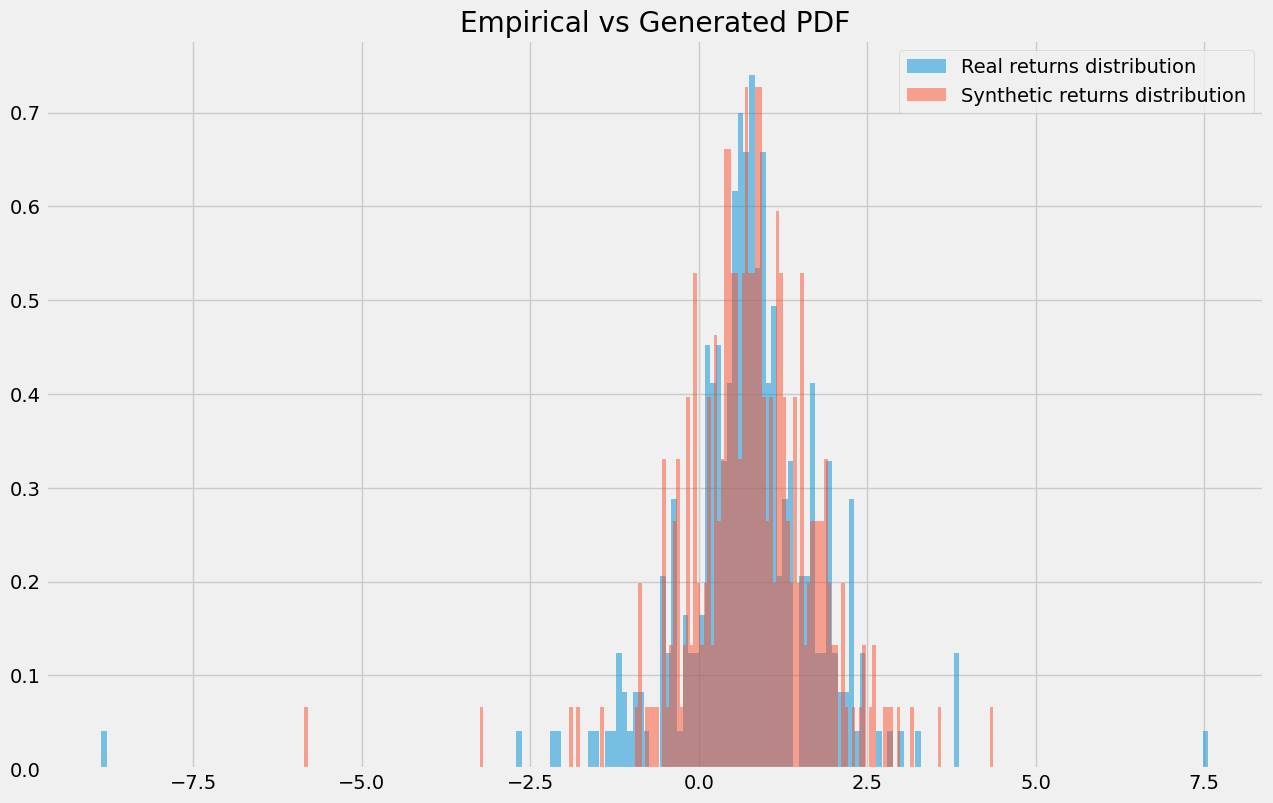

In [46]:
np.random.seed(15)

noise = np.random.randn(10,100) #10x32x100
predictions = generator(noise, training=True) #TRAINING TRUE OR FALSE
result = tf.squeeze(predictions) #Given a tensor input, this operation returns a tensor of the same type with all dimensions of size 1 removed.
temp = (result.numpy())
generated_data = [item for sublist in temp for item in sublist] #temp is the list getting flattened
generated_data = generated_data[:296]

def empirical_pdf(real, synthetic):
    fig, (ax2) = plt.subplots(1, 1, figsize=(14,9))
    ax2.hist(real, density=True, bins=200,alpha=0.5,label='Real returns distribution')
    ax2.hist(synthetic, density=True, bins=200,alpha=0.5,label='Synthetic returns distribution')
    ax2.legend(loc='upper right')
    
empirical_pdf(log_returns.iloc[:,0], generated_data)
plt.title('Empirical vs Generated PDF')

skw_1 = skew(log_returns['ret'].values)
skw_2 = skew(generated_data)
kur_1 = kurtosis(log_returns['ret'].values)
kur_2 = kurtosis(generated_data)
print('Skewness real data: {}'.format(skw_1))
print('Skewness synthetic data: {}'.format(skw_2))
print('Kurtosis real data: {}'.format(kur_1))
print('Kurtosis synthetic data: {}'.format(kur_2))

Overall, synthetic data are close to the real ones, giving positive results into understand the data generating process. On the other hand, there is room for improvements in all previous aspects; from autocorrelation function to KS statistics. Nevertheless, generated data may be useful to better understand the underlying distribution of both log returns and cumulative log returns.

In [47]:
list_original = log_returns.div(100).iloc[:,0].tolist()
df_T = pd.DataFrame(np.cumsum(list_original), columns=['Original'])
df_T2 = pd.DataFrame(list_original, columns=['Original'])
for i in range(1000):
    noise = np.random.randn(30,100) #30x32x100
    predictions = generator(noise, training=True) # training true or false
    result = tf.squeeze(predictions) # Given a tensor input, this operation returns a tensor of the same type with all dimensions of size 1 removed.
    temp = (result.numpy())
    generated_data = [item for sublist in temp for item in sublist] # temp is the list getting flattened
    df_generated = pd.DataFrame(generated_data,columns=['Generated Data'])
    df_generated = df_generated[0:296]
    
    df12 = df_generated.div(100) # divide by 100 to compensate for training input (x100)
    df12.iloc[0, 0] = 0
    df13 = df12.iloc[:,0].tolist()
    df = pd.DataFrame(df13, columns = ['logreturns'])
    df['logr_na0'] = df.logreturns.fillna(0)
    df_T[f'Cumlog-{i}'] = np.cumsum(df.logr_na0) #save each generated series
    df_T2[f'logr_na0-{i}'] = df.logr_na0
    
X = df_T.drop(['Original'], axis=1) #generated data cum log-return
Y = pd.DataFrame(df_T['Original']) #original data cum log-return
Z = df_T2.drop(['Original'], axis=1) #generated log-return

In [48]:
X = pd.DataFrame(pd.Series(X.values.ravel('F')), columns=['Cumlog-T']) #concatenate generated series
Z = pd.DataFrame(pd.Series(Z.values.ravel('F')), columns=['Log-T'])
for i in range(1,2):
    X[f'Lag- {i}'] = X['Cumlog-T'].shift(i) #lag series

95% confidence intervals: -0.0123713856097310780.027203720062971108


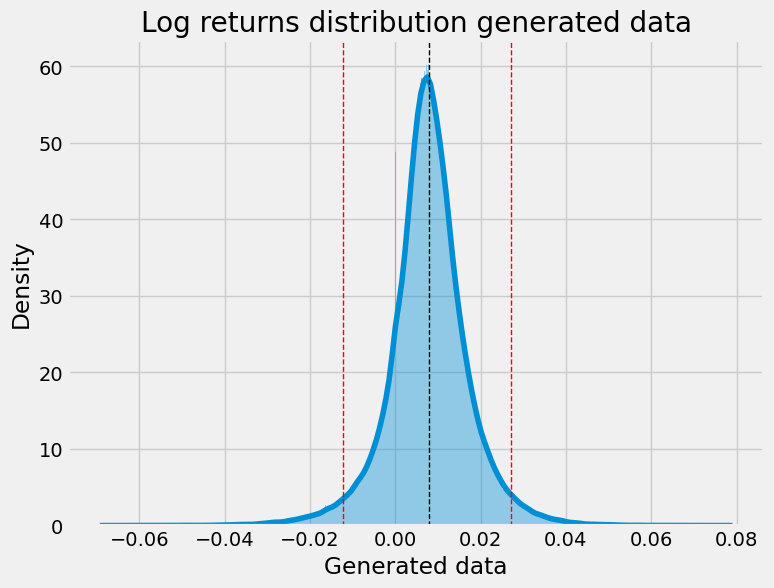

In [49]:
plt.subplots(figsize=(8,6))
c_1,c_2 = np.percentile(Z['Log-T'], 2.5), np.percentile(Z['Log-T'], 97.5) #95% prediction intervals

sns.distplot(Z['Log-T'], kde=True, bins=1000, hist=True)
plt.axvline(Z['Log-T'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(c_1, color='red', linestyle='dashed', linewidth=1)
plt.axvline(c_2, color='red', linestyle='dashed', linewidth=1)
plt.title('Log returns distribution generated data')
plt.xlabel('Generated data')
print('95% confidence intervals: {}{}'.format(c_1, c_2))

Text(0.5, 0, 'Original data')

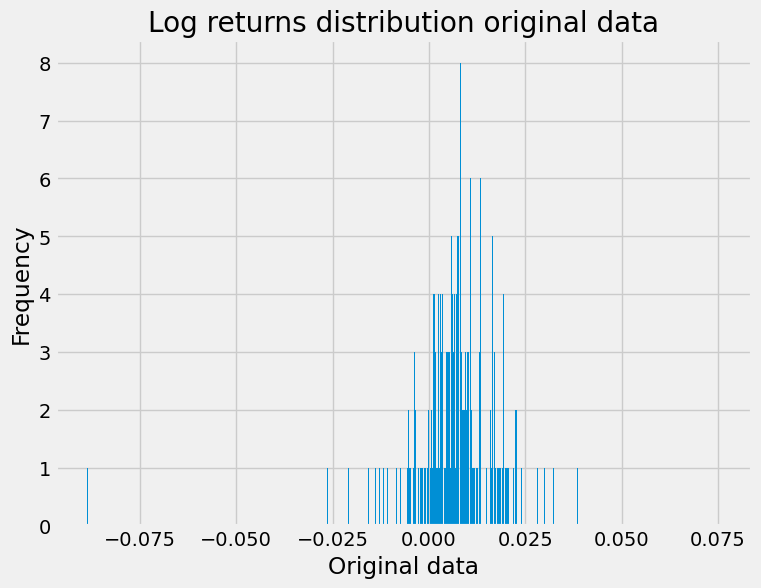

In [50]:
plt.subplots(figsize=(8,6))
log_returns.div(100).iloc[:,0].plot(kind='hist', bins=1000)
plt.title('Log returns distribution original data')
plt.xlabel('Original data')

95% confidence intervals: 0.04100010908150582.3719629796571997


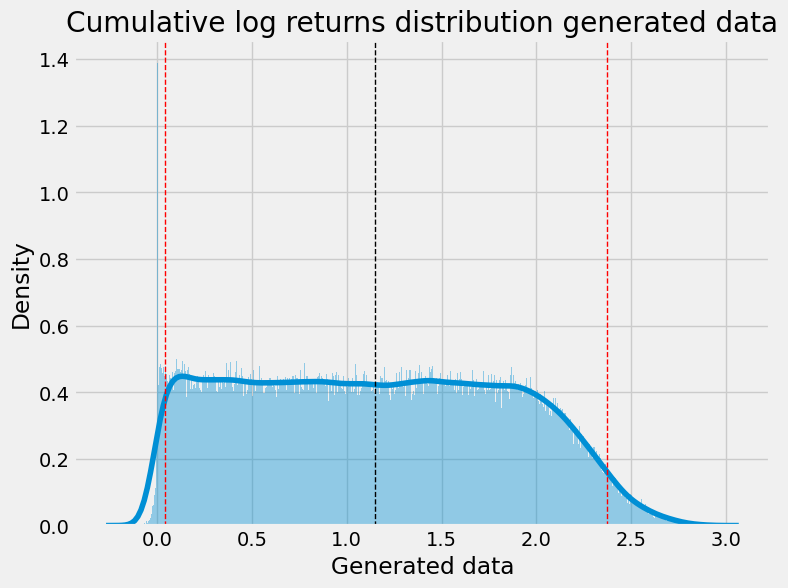

In [51]:
plt.subplots(figsize=(8,6))
c_3,c_4 = np.percentile(X['Cumlog-T'], 2.5), np.percentile(X['Cumlog-T'], 97.5) #95% prediction intervals

sns.distplot(X['Cumlog-T'], kde=True, bins=1000, hist=True)
plt.axvline(X['Cumlog-T'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(c_3, color='red', linestyle='dashed', linewidth=1)
plt.axvline(c_4, color='red', linestyle='dashed', linewidth=1)
plt.title('Cumulative log returns distribution generated data')
plt.xlabel('Generated data')
print('95% confidence intervals: {}{}'.format(c_3,c_4))

Text(0.5, 0, 'Original data')

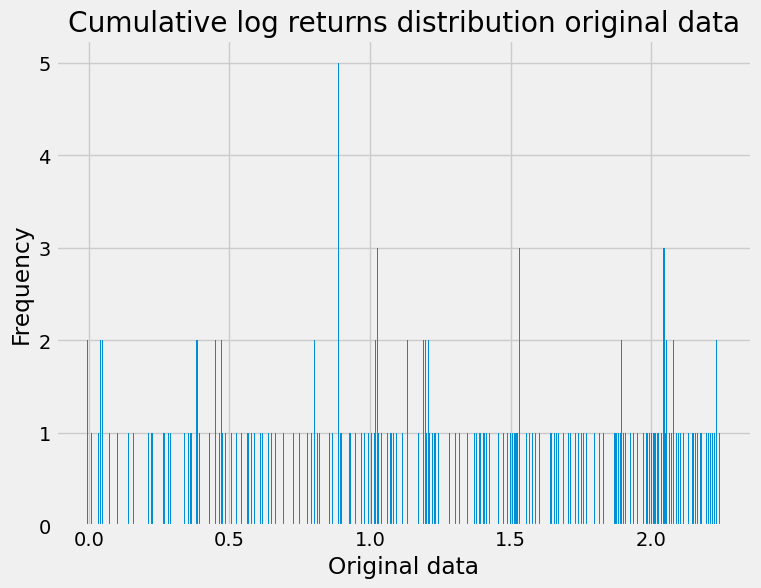

In [52]:
plt.subplots(figsize=(8,6))
np.cumsum(log_returns.div(100).iloc[:,0]).plot(kind='hist', bins=1000)
plt.title('Cumulative log returns distribution original data')
plt.xlabel('Original data')

## Machine Learning algorithms

In the following, some machine learning algorithms will be used to predict two years future GDP values.

### XGBoost

XGBoost (Extreme Gradient Boosting) is a powerful machine learning algorithm that is used for regression, classification, and ranking problems. It is an implementation of gradient boosting that is highly optimized for speed and performance. XGBoost is based on the gradient boosting framework and is a decision tree-based ensemble algorithm that uses an approach called boosting.

The main advantages of XGBoost are its speed and accuracy. It is able to handle large and complex data sets with highly accurate predictions. This is due to its ability to optimize the parameters of the decision trees and the algorithm as a whole through regularized additions of decision trees. Additionally, it has a built-in handling of missing data, reducing the need for pre-processing data, and can handle non-linear relationships between features.

XGBoost has become a popular choice for data scientists involved in predictive modeling competitions, and it is also used in many real-world applications such as customer churn analysis, fraud detection, and credit risk analysis.

In the following we will use XGBoost to predict the real GDP values of the next quarter using only the value of the quarter before. We use one thousand generated data time series of real GDP as training set. Then, we will use the original dataset form 1947 to 2020 as validation set and finally all observations from 2020 to 2022 as test set.

In [53]:
tf.random.set_seed(11) #set seed for replicability

In [54]:
X_train = X.drop(['Cumlog-T'], axis=1).copy() #train sets
Y_train = pd.DataFrame(X['Cumlog-T']).copy() 

X_2 = pd.DataFrame(np.cumsum(list_original), columns=['Original']) #lag series
for i in range(1,2):
    X_2[f'Lag- {i}'] = X_2['Original'].shift(i)

X_test = X_2.drop(['Original'], axis=1).copy() #test sets
Y_test = pd.DataFrame(np.cumsum(list_original), columns=['Original']).copy()

In [55]:
###Long to run. Load the model with the next cell.

#reg = xgb.XGBRegressor(**clf.best_params_, objective='reg:squarederror')
#reg = xgb.XGBRegressor(max_depth = 8, n_estimators = 500, learning_rate = 0.02, objective='reg:squarederror')
#reg.fit(X_train, Y_train,
#        eval_set=[(X_train, Y_train), (X_test, Y_test)],
#        early_stopping_rounds=50,
#        verbose=True) # Change verbose to False if you want not to see it train

In [56]:
#save model
#joblib.dump(reg, 'xgb_1') 

#load saved model
reg = joblib.load('xgb_1')

499

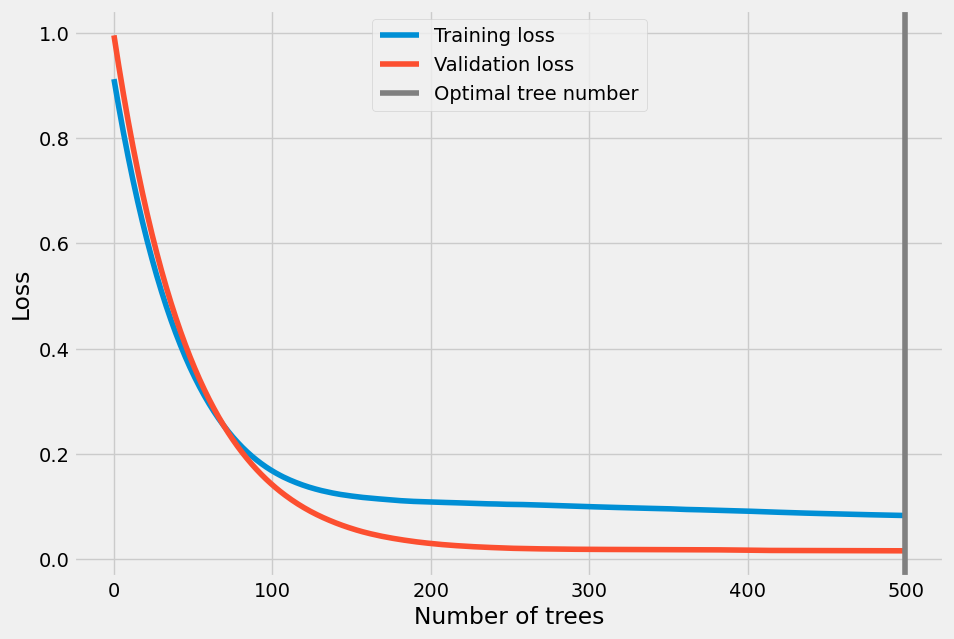

In [57]:
results = reg.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results['validation_0']['rmse'], label='Training loss')
plt.plot(results['validation_1']['rmse'], label='Validation loss')
plt.axvline(reg.best_ntree_limit, color='gray', label='Optimal tree number')
plt.xlabel('Number of trees')
plt.ylabel('Loss')
plt.legend()
reg.best_ntree_limit

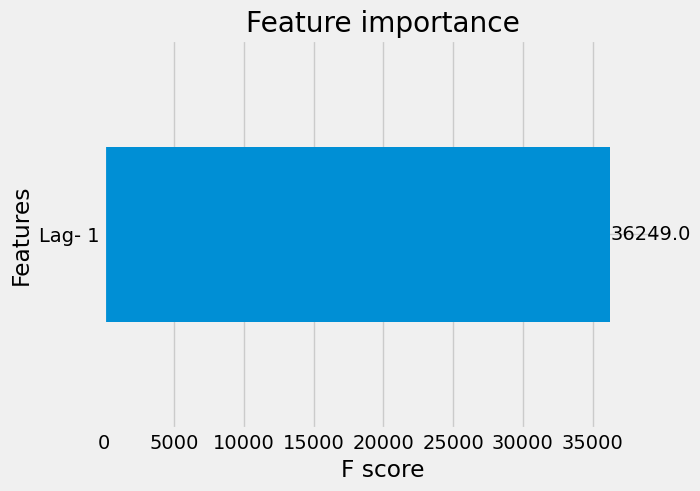

In [58]:
_ = plot_importance(reg, height=0.9)

In [59]:
Y_test['Validation'] = reg.predict(X_test, ntree_limit=reg.best_ntree_limit)

The mean absolute error (MAE) is a common metric used to evaluate the accuracy of time series forecasting models. It provides a measure of how different the predicted values are from the actual values over a given period of time.

The formula for MAE is:

>$MAE = \frac{1}{n}  \sum|y - \hat{y}|$

The MAE is calculated by taking the absolute value of the difference between the actual and predicted values and then averaging these values over the period of time being evaluated. A lower MAE indicates a more accurate model, as it means the predicted values are closer to the actual values. The MAE can be used to compare the accuracy of different forecasting models or to evaluate the performance of a single model over time. It is also commonly used in machine learning applications to evaluate  regression models.

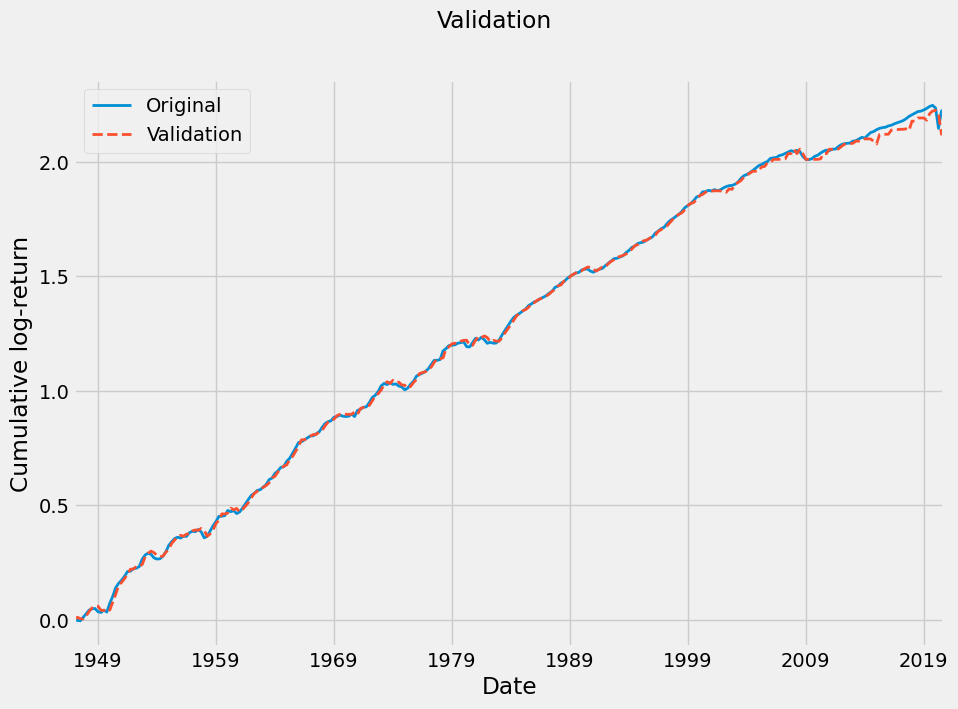

In [60]:
f, ax = plt.subplots(1)
f.set_figheight(7)
f.set_figwidth(10)
Y_test.index = date_index
_ = Y_test[['Original', 'Validation']].plot(ax=ax,
                                              style=['-','--'], linewidth=2)
#ax.set_xbound(lower=0, upper=5050)
#ax.set_ylim(-0.5, 2)
plot = plt.suptitle('Validation')
plot = plt.xlabel('Date')
plot = plt.ylabel('Cumulative log-return')
#plt.savefig('Graph.png')

In [61]:
test_mae = mean_absolute_error(Y_test['Original'], Y_test['Validation'])
print('Mean absolute error: {}'.format(test_mae))

Mean absolute error: 0.010737592568554858


In [62]:
prices_returns_2 = pd.read_csv(r'.\GDPC1.csv')
prices_returns_2 = prices_returns_2[295:308]
prices_returns_2['ret'] = f_log_return(prices_returns_2['GDPC1'])['Log Returns']
prices_returns_2.index = pd.to_datetime(prices_returns_2['DATE'])
prices_returns_2 
prices_2 = prices_returns_2.iloc[:,1].to_frame()
log_returns_2 = prices_returns_2.iloc[:,2].to_frame()

Text(0, 0.5, 'Billions of chained 2012 dollars')

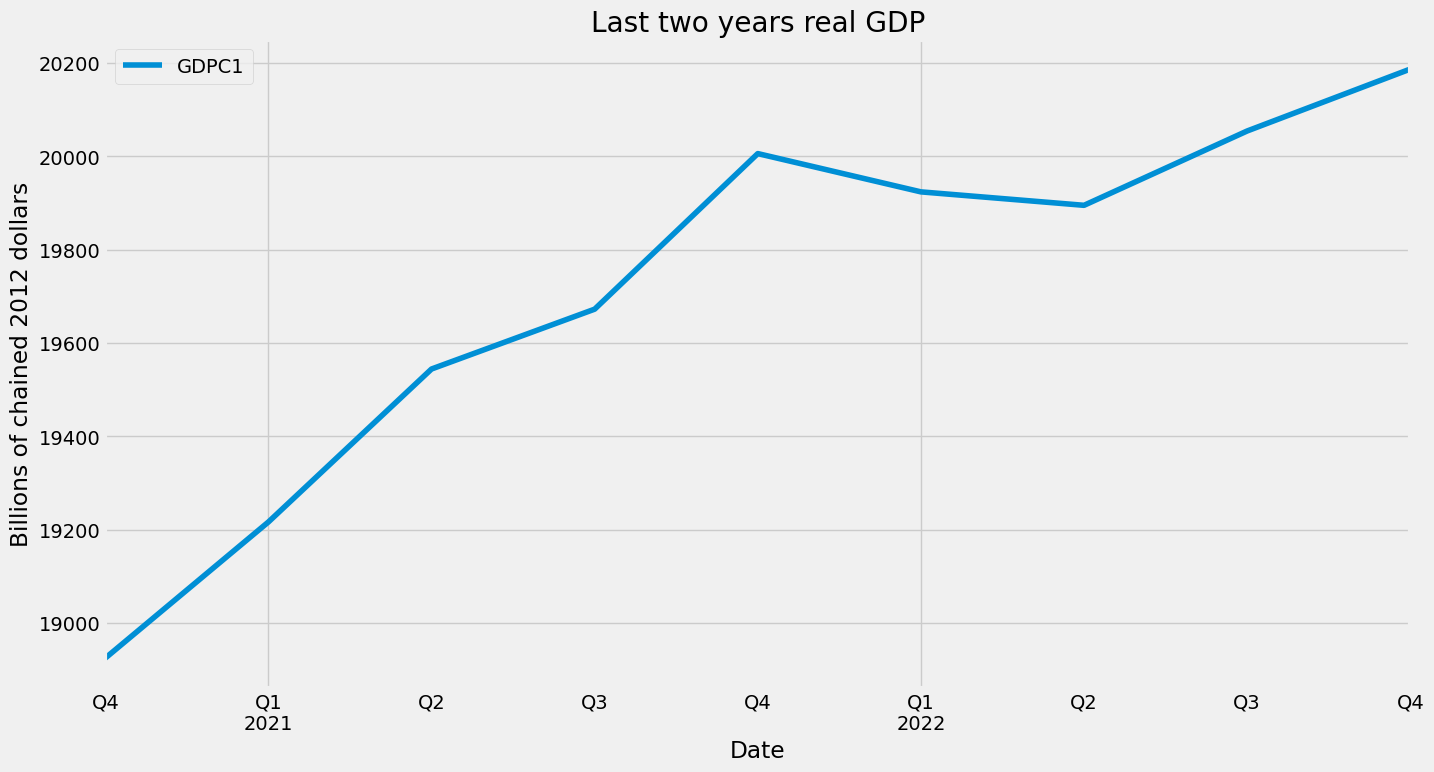

In [63]:
_ = prices_2.plot(figsize=(15, 8))
plt.xlabel('Date')
plt.title('Last two years real GDP')
plt.ylabel('Billions of chained 2012 dollars')

In [64]:
list_original_2 = log_returns_2.div(100).iloc[:,0].tolist()
X_3 = pd.DataFrame(np.cumsum(list_original_2)+ Y.loc[295][0], columns=['Original'])
for i in range(1,2):
    X_3[f'Lag- {i}'] = X_3['Original'].shift(i)

X_test_2 = X_3.drop(['Original'], axis=1).copy()

for i in range(1,2):
    for k in range(1):
        X_test_2[f'Lag- {i}'][i-k-1] = Y.loc[294-k][0]
Y_test_2 = pd.DataFrame(np.cumsum(list_original_2) + Y.loc[295][0], columns=['Original']).copy()

In [65]:
Y_test_2 #real future values

Original
0  2.230219
1  2.245529
2  2.262456
3  2.269001
4  2.285816
5  2.281704
6  2.280257
7  2.288236
8  2.294838

In [66]:
Y_test_2['Prediction'] = reg.predict(X_test_2, ntree_limit=reg.best_ntree_limit) #predictions

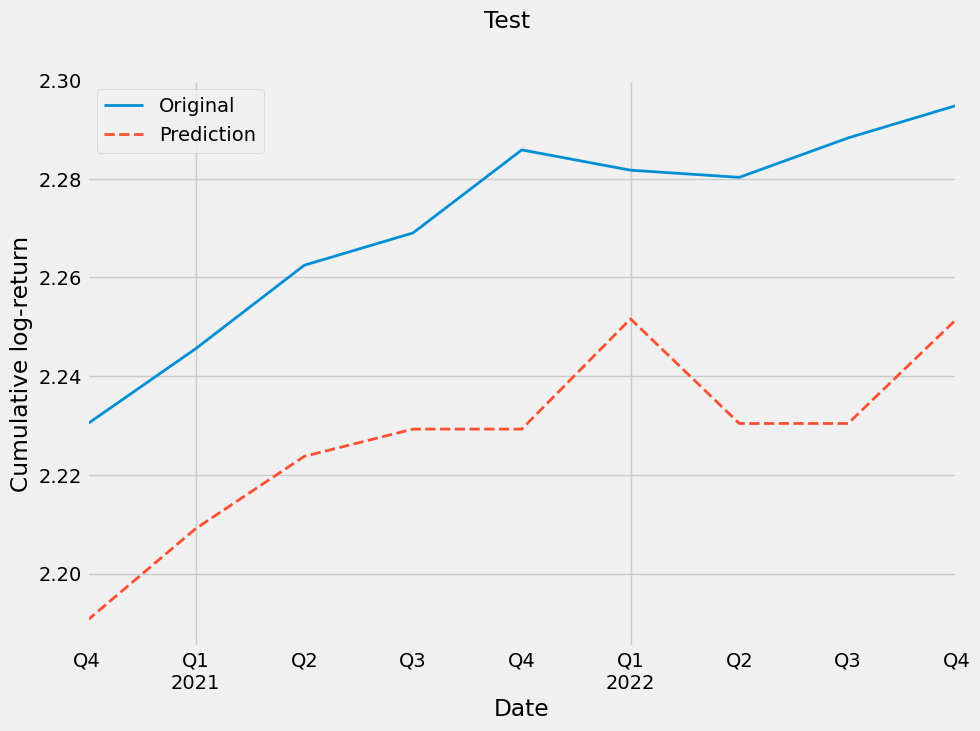

In [67]:
f, ax = plt.subplots(1)
f.set_figheight(7)
f.set_figwidth(10)
date_index_2 = log_returns_2.index
Y_test_2.index = date_index_2
_ = Y_test_2[['Original', 'Prediction']].plot(ax=ax,
                                              style=['-','--'], linewidth=2)
#ax.set_xbound(lower=11, upper=548)
#ax.set_ylim(0.8, 1.6)
plot = plt.suptitle('Test')
plot = plt.xlabel('Date')
plot = plt.ylabel('Cumulative log-return')
#plt.savefig('Traveling Salesmen Graph2.png')

In [68]:
test_mae_2 = mean_absolute_error(Y_test_2['Original'], Y_test_2['Prediction'])
print('Mean absolute error: {}'.format(test_mae_2))

Mean absolute error: 0.043587044975754816


We have a MAE of $0.010$ and $0.044$ for the validation set the test set respectively. Maybe it is a consequence of the fact that hyperparameters are chosen with a subjective prospective because of a grid search for model tuning resulted to be computational expensive. We also have to take in mind that the only covariate used in the model is the first order lag, and therefore a wider set may bring better results. Tuning parameters in machine learning refers to the process of adjusting the hyperparameters of an algorithm to improve its performance. Hyperparameters are user-defined settings that influence the behavior and performance of the algorithm, such as learning rate, number of hidden layers in a neural network, regularization strength, etc. Tuning these parameters involves trying out different combinations of these settings, training and evaluating the model, and selecting the best performing one. It is an iterative process that requires a balance between under fitting and overfitting the data.

We decide to do not further analysis with this machine learning algorithm for the following reasons.

1) XGBoost is a relatively shallow model, meaning it may not be the best option for long-term predictions that depend on complex interactions between multiple variables over time.

2) Long-term predictions often require incorporating time-series data into the model. While XGBoost can be used for time-series problems, there are other algorithms specifically designed for time-series analysis, such as LSTM and Prophet.

3) To make long-term predictions using XGBoost, you can use a sliding window approach to train the model on different time periods and make predictions for future time periods. However, it's important to note that the accuracy of these predictions may decrease as the time frame increases due to the non-stationary nature of many time-series data sets.

Thus, while XGBoost is a powerful algorithm, it may not be the best option for long-term predictions.

### LSTM

Long Short-Term Memory (LSTM) is a type of artificial neural network model that is used for time series forecasting. The LSTM model is capable of retaining historic information for a longer duration, unlike simple RNN models. This makes it suitable for predicting values based on a series of past observations. LSTM uses a sequence of inputs to predict the next value in the sequence. The input sequence can be of varying length. The model is trained to learn the relationship between the current input and the output by updating the weights of the neurons at each time step. The LSTM model processes the input sequences through a series of gates that control the flow of information through the network. These gates determine how much information from the previous time steps will be used to predict the next value in the sequence.

LSTM forecasting has been successfully used in a variety of applications such as sales forecasting, financial forecasting, weather forecasting, and stock price prediction. It has the ability to capture complex patterns in the data and can be trained on large datasets. LSTM models can be trained using various optimization algorithms such as gradient descent, Adam, or Adagrad. With the help of these optimization algorithms, the LSTM model can be trained to minimize the error between the predicted values and the actual values. 

Firstly, we have to prepare the data to the algorithm. In this regard, *MinMax* transformation is a data scaling technique used in some machine learning techniques to bring all feature values to a common range. It scales the data to a fixed range between 0 and 1 or -1 and 1. The main purpose of *MinMax* transformation is to normalize the data so that one input feature doesn't dominate the others. This is because some features might have a much higher range of values than others, which can cause a biased output. *MinMax* scaling makes sure that each feature has an equal weight in the predictions.

The formula used for MinMax transformation is:

$X_scaled = \frac{(X - X_{min})} {(X_{max} - X_{min})}$;

where $X$ is the original data point, $X_{min}$ is the minimum value for the feature, and $X_{max}$ is the maximum value for the feature.

In [69]:
dataset = pd.DataFrame(np.cumsum(list_original), columns=['Original']).values

In [70]:
training_data_len = math.ceil(len(dataset)*0.8) #we split data into training and validation sets
training_data_len

237

In [71]:
scaler = MinMaxScaler() #we transform the data
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[2.10546046e-03],
       [9.18643284e-04],
       [0.00000000e+00],
       [6.89778895e-03],
       [1.35326358e-02],
       [2.08083279e-02],
       [2.33471474e-02],
       [2.38433160e-02],
       [1.76771798e-02],
       [1.61587458e-02],
       [2.07232897e-02],
       [1.69778700e-02],
       [3.41086479e-02],
       [4.74593547e-02],
       [6.43091866e-02],
       [7.27379737e-02],
       [7.87329733e-02],
       [8.63671394e-02],
       [9.54330527e-02],
       [9.64107593e-02],
       [1.01134105e-01],
       [1.02090292e-01],
       [1.05286647e-01],
       [1.19647065e-01],
       [1.27831979e-01],
       [1.31253686e-01],
       [1.28746104e-01],
       [1.21966747e-01],
       [1.19837329e-01],
       [1.20321423e-01],
       [1.25312078e-01],
       [1.33923566e-01],
       [1.46438700e-01],
       [1.53611749e-01],
       [1.59573011e-01],
       [1.62232879e-01],
       [1.60503567e-01],
       [1.64160618e-01],
       [1.63761194e-01],
       [1.71015829e-01],


To avoid tunning hyperparameters, we decide to follow the LSTM structure proposed in Sangjin, P., et al. (2022).

In [72]:
train_data = scaled_data[0:training_data_len,:]
#len(train_data)
#Splitting data on train_X and train_y data sets
train_X = []
train_Y = []

for i in range(12,len(train_data)):
    train_X.append(train_data[i-12:i,0]) #train_X will contain 12 values from index 0 to 11
    train_Y.append(train_data[i,0])  #train_y will contain every 13st value which is value we want to predict
    if i <= 13:
        print(train_X)
        print(train_Y)

[array([0.00210546, 0.00091864, 0.        , 0.00689779, 0.01353264,
       0.02080833, 0.02334715, 0.02384332, 0.01767718, 0.01615875,
       0.02072329, 0.01697787])]
[0.03410864791379202]
[array([0.00210546, 0.00091864, 0.        , 0.00689779, 0.01353264,
       0.02080833, 0.02334715, 0.02384332, 0.01767718, 0.01615875,
       0.02072329, 0.01697787]), array([0.00091864, 0.        , 0.00689779, 0.01353264, 0.02080833,
       0.02334715, 0.02384332, 0.01767718, 0.01615875, 0.02072329,
       0.01697787, 0.03410865])]
[0.03410864791379202, 0.04745935465413953]


In [73]:
#converting to numpy array
train_X,train_Y = np.array(train_X),np.array(train_Y)
#reshape the data (we have 2D data and we need 3D for LSTM)
train_X = np.reshape(train_X,(train_X.shape[0],train_X.shape[1],1))
train_X.shape

(225, 12, 1)

The network has a visible layer with 12 inputs, two hidden layer with 128 and 64 LSTM blocks or neurons, and two dense output layer that make 16 and a single value prediction respectively. The default sigmoid activation function is used for the LSTM blocks. The network is trained for 100 epochs with validation set fixed to 20%, and a batch size of 10 is used. Finally, the standard `adam` optimizer with a learning rate of 0.01 is used with the `mse` loss function and a dropout rate of 0.1.

In [74]:
lstm_1 = keras.Sequential()
lstm_1.add(LSTM(128, return_sequences=True, input_shape=(train_X.shape[1],1), dropout=0.1))
lstm_1.add(LSTM(64, return_sequences=False, dropout=0.1))
lstm_1.add(layers.Dense(16))
lstm_1.add(layers.Dense(1))
optimizer = keras.optimizers.Adam(learning_rate=0.01)
lstm_1.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

checkpoint_cb = ModelCheckpoint('lstm_1.h5',
                                save_best_only=True,
                                monitor='mae')

#STOPPING THE TRAINING IF VALIDATION RMSPE IS NOT IMPROVING 
early_stopping_cb = EarlyStopping(patience=15,
                                  restore_best_weights=True,
                                  monitor='mae')

print(lstm_1.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 12, 128)           66560     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_8 (Dense)             (None, 16)                1040      
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 117,025
Trainable params: 117,025
Non-trainable params: 0
_________________________________________________________________
None


In [75]:
###Too long, load the model in the next cell.

#LSTM_1 = lstm_1.fit(train_X,train_Y, epochs = 100, batch_size=10, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])
#plt.plot(LSTM_1.history['mae'])
#plt.show()

In [76]:
lstm_1 = load_model('lstm_1.h5') #load estimated model

In [77]:
#creating test_data set
test_data = scaled_data[training_data_len-12:,:]
#creating test_X and test_Y
test_X = []
test_Y = dataset[training_data_len:,:] #contain actual values (61st values)

for i in range(12,len(test_data)):
    test_X.append(test_data[i-12:i,0]) #train_X will contain 60 values from index 0 to 59
test_X = np.array(test_X)
test_X = np.reshape(test_X,(test_X.shape[0],test_X.shape[1],1))
#get the models  predicted price
predictions = lstm_1.predict(test_X)
#transforming price to unscaled values
predictions = scaler.inverse_transform(predictions)

test_mae_3 = mean_absolute_error(test_Y, predictions)
print('Mean absolute error: {}'.format(test_mae_3))

2/2 [==============================] - 0s 7ms/step
Mean absolute error: 0.029956809420779537


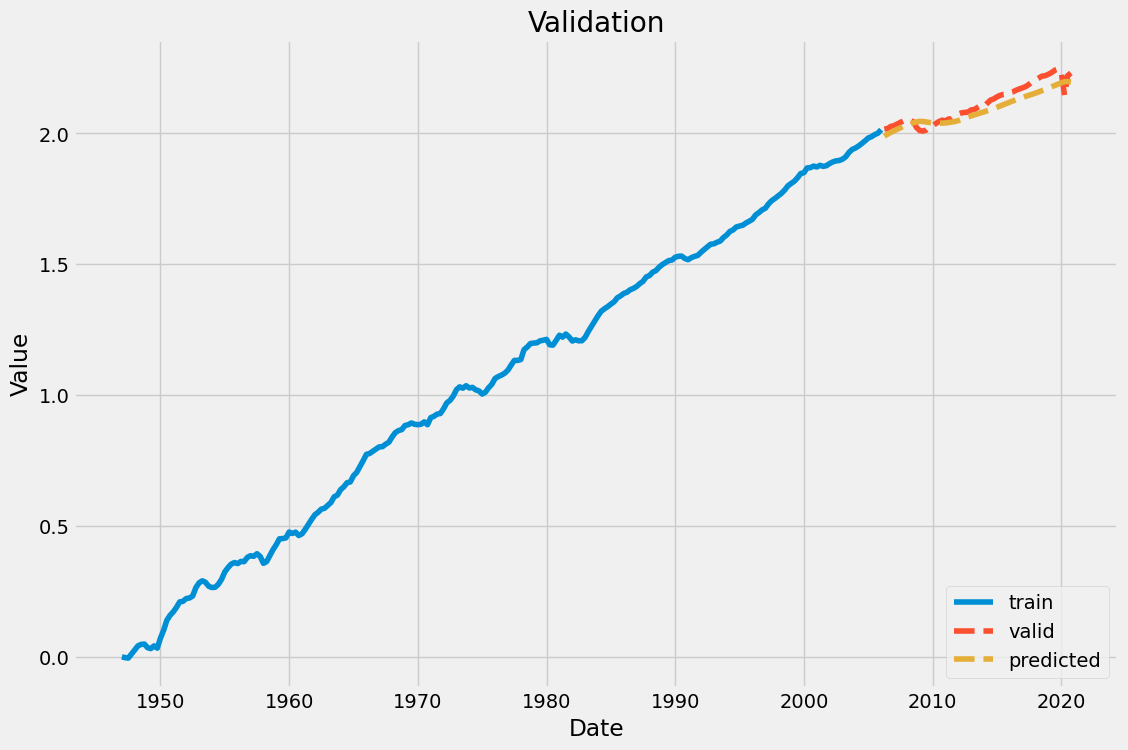

In [78]:
#ploting
data = pd.DataFrame(np.cumsum(list_original), columns = ['Original'])
data.index = date_index
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize = (12,8))
plt.title('Validation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(train['Original'])
plt.plot(valid[['Original','Predictions']], linestyle = '--')
plt.legend(['train','valid','predicted'], loc='lower right')
plt.show()

How we can see, LSTM has a good level of accuracy in short term prediction (one quarter), with MAE of 0.03. In the next we will enlarge the horizon considering an entire year.

#### One year forecasting

When LSTM comes to long forecasting, it has been shown to be very effective. In a traditional time-series forecasting problem, one predicts the value of a single variable at a future time-step given its previous history. LSTM can be used to forecast multiple time-steps into the future by learning the underlying patterns and trends in the data. This is because its memory cells are capable of capturing the dependencies between previous and future time-steps, which may span several days, weeks, or even months.

LSTM has been successfully applied to long forecasting tasks such as predicting weather forecasting, stock price markets forecasting and electricity demand forecasting. However, the performance of LSTM depends on the quality and quantity of data, the complexity of the problem, and the choice of hyperparameters. In the following we will use the same set up of before. 

In [79]:
dataset_2 = pd.DataFrame(np.cumsum(list_original), columns=['Original']).values.reshape(- 1, 1)

#scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(dataset_2)
dataset_2 = scaler.transform(dataset_2)

In [80]:
#generate the training sequences
n_forecast = 1 
n_lookback = 12

test_XX = []
test_YY = []

for i in range(n_lookback, len(dataset_2) - n_forecast + 1):
    test_XX .append(dataset_2[i - n_lookback: i])
    test_YY.append(dataset_2[i: i + n_forecast])

test_XX = np.array(test_XX)
test_YY = np.array(test_YY)

In [81]:
test_YY

array([[[0.03410865]],

       [[0.04745935]],

       [[0.06430919]],

       [[0.07273797]],

       [[0.07873297]],

       [[0.08636714]],

       [[0.09543305]],

       [[0.09641076]],

       [[0.10113411]],

       [[0.10209029]],

       [[0.10528665]],

       [[0.11964706]],

       [[0.12783198]],

       [[0.13125369]],

       [[0.1287461 ]],

       [[0.12196675]],

       [[0.11983733]],

       [[0.12032142]],

       [[0.12531208]],

       [[0.13392357]],

       [[0.1464387 ]],

       [[0.15361175]],

       [[0.15957301]],

       [[0.16223288]],

       [[0.16050357]],

       [[0.16416062]],

       [[0.16376119]],

       [[0.17101583]],

       [[0.17385219]],

       [[0.17287751]],

       [[0.17721149]],

       [[0.17259124]],

       [[0.16090486]],

       [[0.163816  ]],

       [[0.17397877]],

       [[0.18424966]],

       [[0.19269925]],

       [[0.20260983]],

       [[0.20292329]],

       [[0.20418753]],

       [[0.2140657 ]],

       [[0.21166

In [82]:
#train the model
lstm_2 = keras.Sequential()
lstm_2.add(LSTM(128, return_sequences=True, input_shape=(test_XX.shape[1], test_XX.shape[2]),dropout=0.1))
lstm_2.add(LSTM(64, return_sequences=False,dropout=0.1))
lstm_2.add(layers.Dense(16))
lstm_2.add(layers.Dense(1))
optimizer = keras.optimizers.Adam(learning_rate=0.01)

lstm_2.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
checkpoint_cb = ModelCheckpoint('lstm_2.h5',
                                save_best_only=True,
                                monitor='mae')

#STOPPING THE TRAINING IF VALIDATION MAE IS NOT IMPROVING 
early_stopping_cb = EarlyStopping(patience=15,
                                  restore_best_weights=True,
                                  monitor='mae')

print(lstm_2.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 12, 128)           66560     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_10 (Dense)            (None, 16)                1040      
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 117,025
Trainable params: 117,025
Non-trainable params: 0
_________________________________________________________________
None


In [83]:
###Too long, load the model in the next cell.

#LSTM_2 = lstm_2.fit(test_XX, test_YY, epochs=200, batch_size=32, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])
#plt.plot(LSTM_2.history['mae'])
#plt.show()

In [84]:
lstm_2 = load_model('lstm_2.h5') #load model

In [85]:
#generate the multi-step forecasts
n_future = 8
Y_future = []

X_pred = test_XX[-1:, :, :]  #last observed input sequence
Y_pred = test_YY[-1]         #last observed target value

for i in range(n_future):

    #feed the last forecast back to the model as an input
    X_pred = np.append(X_pred[:, 1:, :], Y_pred.reshape(1, 1, 1), axis=1)

    #generate the next forecast
    Y_pred = lstm_2.predict(X_pred)

    #save the forecast
    Y_future.append(Y_pred.flatten()[0])

1/1 [==============================] - 0s 19ms/step


In [86]:
#transform the forecasts back to the original scale
Y_future = np.array(Y_future).reshape(-1, 1)
Y_future = scaler.inverse_transform(Y_future)

#organize the results in a data frame
dataset_past = pd.DataFrame(np.cumsum(list_original), columns=['Original'])
dataset_past.index = date_index
dataset_past = dataset_past.reset_index()
#dataset_past
dataset_past.rename(columns={'DATE': 'Date'}, inplace=True)
dataset_past['Date'] = pd.to_datetime(dataset_past['Date'])
dataset_past['Forecast'] = np.nan

dataset_future = pd.DataFrame(columns=['Date', 'Close', 'Forecast'])
dataset_future['Date'] = date_index_2
dataset_future['Forecast'] = np.hstack([Y_test_2['Original'][0],Y_future.flatten()])
dataset_future['Close'] = Y_test_2['Original'].values

results = dataset_past.append(dataset_future).set_index('Date')

Text(0, 0.5, 'Value')

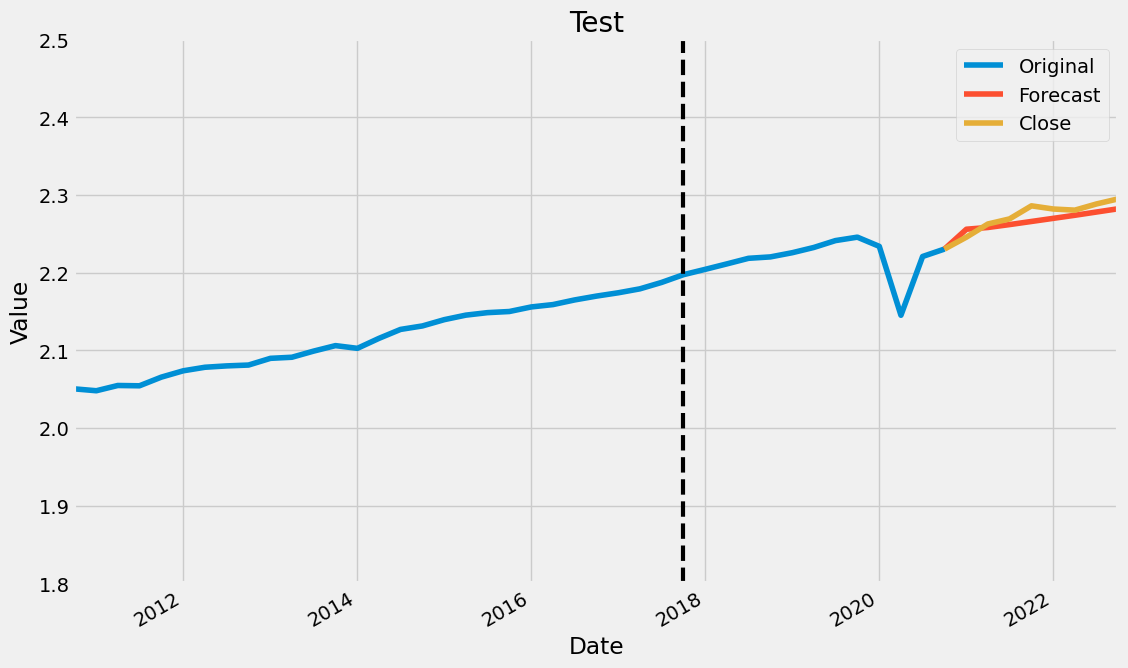

In [87]:
#plot the results
results.plot(figsize = (12,8), title='Test', xlim=[datetime.date(2010, 10, 1), datetime.date(2022, 10, 1)], ylim=(1.8,2.5))
plt.axvline(datetime.date(2017,10,1), color='k', linestyle='dashed', linewidth=3) #data used for predictions
plt.ylabel('Value')

In [88]:
test_mae_4 = mean_absolute_error(dataset_future['Forecast'], dataset_future['Close'])
print('Mean absolute error: {}'.format(test_mae_4))

Mean absolute error: 0.009320581993658717


In [89]:
results

Original  Forecast     Close
Date                                    
1947-01-01  0.000000       NaN       NaN
1947-04-01 -0.002671       NaN       NaN
1947-07-01 -0.004738       NaN       NaN
1947-10-01  0.010784       NaN       NaN
1948-01-01  0.025714       NaN       NaN
...              ...       ...       ...
2021-10-01       NaN  2.265706  2.285816
2022-01-01       NaN  2.269661  2.281704
2022-04-01       NaN  2.273662  2.280257
2022-07-01       NaN  2.277864  2.288236
2022-10-01       NaN  2.282087  2.294838

[305 rows x 3 columns]

With a MAE of 0.009, LSTM performs good also in a horizon of two years.

### Fb-prophet

Fb-prophet is a time series forecasting method developed by Facebook's Data Science team to predict future values of a data set based on its past observations. It is an open-source tool written in python programming language. Fb-prophet is very flexible, and highly efficient in analyzing complex datasets. It uses Bayesian statistics and machine learning techniques such as trend estimation, seasonality, and regression, which make it very accurate in forecasting time series data, and it can handle missing data, and outliers. Fb-prophet has become a widely used tool in industries such as finance, retail, and marketing for forecasting demand, sales, and customer behavior. Recently, it was used also to predict future values of the GDP, showing good results (Balaji, S.J.et al., 2021).

In [90]:
def add_lags(df, x): #function to produce multiple lags
    for i in range(1,2):
        df[f'Step{i}'] = df[x].shift(-i)
    return df

In [91]:
#create future dataframe
K = pd.DataFrame(np.cumsum(list_original), columns=['Original'])
#date_index = log_returns.index
K.index = date_index
future_df = pd.DataFrame(index=log_returns_2[1:].index)
future_df['isFuture'] = True
df['isFuture'] = False
df_and_future = pd.concat([K, future_df])
df_and_future = add_lags(df_and_future, 'Original')
df_and_future #dataset to prepare the model

Original isFuture     Step1
DATE                                   
1947-01-01  0.000000      NaN -0.002671
1947-04-01 -0.002671      NaN -0.004738
1947-07-01 -0.004738      NaN  0.010784
1947-10-01  0.010784      NaN  0.025714
1948-01-01  0.025714      NaN  0.042086
...              ...      ...       ...
2021-10-01       NaN     True       NaN
2022-01-01       NaN     True       NaN
2022-04-01       NaN     True       NaN
2022-07-01       NaN     True       NaN
2022-10-01       NaN     True       NaN

[304 rows x 3 columns]

In [92]:
feature_with_feature = df_and_future.loc[df_and_future['isFuture']==True].copy()
feature_with_feature['Original'] = Y_test_2['Original'][1:].copy()
feature_with_feature #dataset to store results

Original isFuture  Step1
DATE                                
2021-01-01  2.245529     True    NaN
2021-04-01  2.262456     True    NaN
2021-07-01  2.269001     True    NaN
2021-10-01  2.285816     True    NaN
2022-01-01  2.281704     True    NaN
2022-04-01  2.280257     True    NaN
2022-07-01  2.288236     True    NaN
2022-10-01  2.294838     True    NaN

In [93]:
FB = Y_test.reset_index()[['Original', 'DATE']].rename(columns={'DATE':'ds', 'Original':'y'})
FB #original data only

y         ds
0    0.000000 1947-01-01
1   -0.002671 1947-04-01
2   -0.004738 1947-07-01
3    0.010784 1947-10-01
4    0.025714 1948-01-01
..        ...        ...
291  2.245502 2019-10-01
292  2.233681 2020-01-01
293  2.145020 2020-04-01
294  2.220633 2020-07-01
295  2.230219 2020-10-01

[296 rows x 2 columns]

In [94]:
m = Prophet(interval_width=0.95)
m.fit(FB)
future = m.make_future_dataframe(len(feature_with_feature))
forecast = m.predict(future)

09:35:54 - cmdstanpy - INFO - Chain [1] start processing
09:35:54 - cmdstanpy - INFO - Chain [1] done processing


In [95]:
pred = forecast[forecast['ds'] > '2020-10-01']
pred['Original'] = (np.cumsum(list_original_2)+df_and_future['Original'][295])[1:]
pred.index = date_index_2[1:]
test_mae_5 = mean_absolute_error(feature_with_feature['Original'], pred['yhat'])
print("Mean absolute error: {}".format(test_mae_5))

Mean absolute error: 0.02102898887239002


In [96]:
pred[['Original','yhat']] #dataset with predictions

Original      yhat
DATE                          
2021-01-01  2.245529  2.232830
2021-04-01  2.262456  2.235556
2021-07-01  2.269001  2.240154
2021-10-01  2.285816  2.246588
2022-01-01  2.281704  2.254792
2022-04-01  2.280257  2.264670
2022-07-01  2.288236  2.276096
2022-10-01  2.294838  2.288916

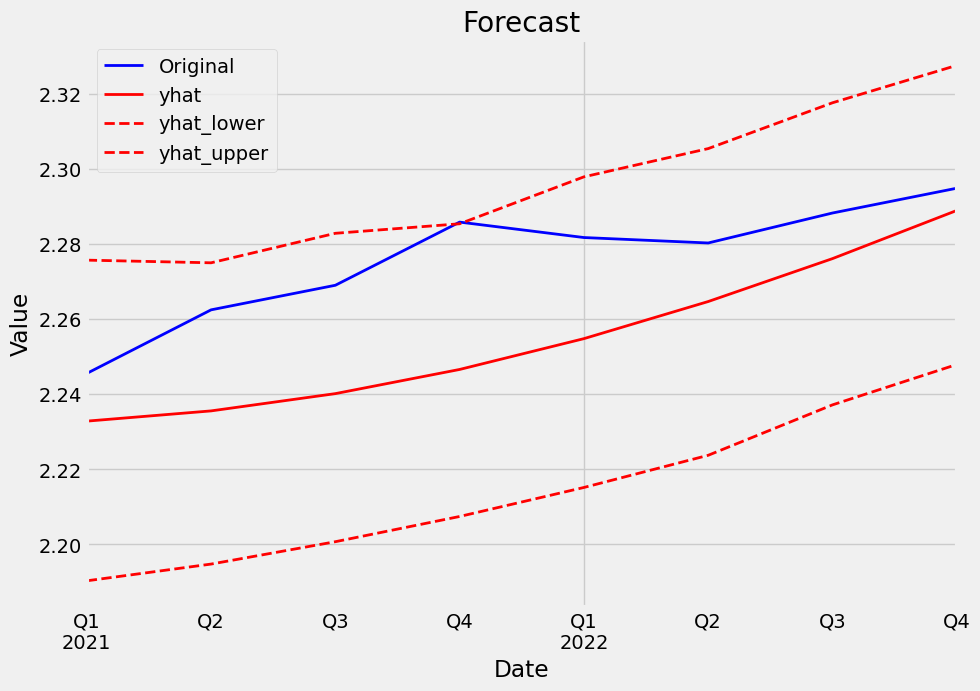

In [97]:
f, ax = plt.subplots(1) #plot the results
f.set_figheight(7)
f.set_figwidth(10)
_ = pred[['Original', 'yhat', 'yhat_lower', 'yhat_upper']].plot(ax=ax,
                                              style=['-','-','--','--'], linewidth=2, color=['blue','red','red','red'])
plt.xlabel("Date")
plt.ylabel("Value")
plt.xlabel("Date")
plt.title("Forecast")
plt.show()

With a MAE of 0.021, the Fb-prophet performs better than XGboost but worse than LSTM. Nevertheles, this algorithm is able to provide also 95% prediction intervals, but they are independent by the time, giving the same wide. 

## Time series analysis

Autoregressive Integrated Moving Average (ARIMA) model is a statistical model designed for analyzing and forecasting time series data proposed by Box and Jenkins (1976). It combines three components autoregression (AR), differencing (I), and moving average (MA). 

In [98]:
df_T #dataset with synthetic and original time series

Original  Cumlog-0  Cumlog-1  Cumlog-2  Cumlog-3  Cumlog-4  Cumlog-5  \
0    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   -0.002671  0.010202  0.003401  0.015098  0.005688 -0.007137  0.015012   
2   -0.004738  0.017681  0.015353  0.022251  0.013280  0.001959  0.036293   
3    0.010784  0.022344  0.026515  0.020247  0.021242 -0.000474  0.043417   
4    0.025714  0.030514  0.030759  0.013058  0.023399 -0.001953  0.059093   
..        ...       ...       ...       ...       ...       ...       ...   
291  2.245502  2.508608  2.326795  2.281464  2.150420  1.970523  2.083689   
292  2.233681  2.532230  2.332818  2.291536  2.158981  1.985143  2.092219   
293  2.145020  2.567544  2.341878  2.293161  2.177306  1.995927  2.104649   
294  2.220633  2.607768  2.342963  2.287390  2.192272  2.018228  2.121080   
295  2.230219  2.645431  2.345631  2.285857  2.202309  2.030139  2.126921   

     Cumlog-6  Cumlog-7  Cumlog-8  ...  Cumlog-990  Cumlog-991  Cumlog-992  \
0    0.000000  0.000000  0.000000  ...    0.000000    0.000000    0.000000   
1    0.003207  0.019822 -0.002367  ...    0.007901    0.024877    0.001277   
2   -0.001012  0.039292  0.006242  ...    0.016789    0.044267    0.013584   
3   -0.001806  0.049819  0.017317  ...    0.024603    0.058317    0.017625   
4   -0.000170  0.064115  0.023183  ...    0.029717    0.045575    0.021089   
..        ...       ...       ...  ...         ...         ...         ...   
291  1.895702  2.169766  2.131261  ...    2.529059    2.670496    2.290080   
292  1.906111  2.182638  2.143411  ...    2.546917    2.665353    2.313647   
293  1.909994  2.197634  2.153977  ...    2.555128    2.659799    2.320880   
294  1.921785  2.211206  2.161261  ...    2.568847    2.669874    2.335774   
295  1.922926  2.224251  2.168227  ...    2.581807    2.676880    2.345410   

     Cumlog-993  Cumlog-994  Cumlog-995  Cumlog-996  Cumlog-997  Cumlog-998  \
0      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
1      0.008286    0.006192   -0.009432    0.007693    0.011488    0.005386   
2      0.025435    0.012042    0.005372    0.019274    0.014437    0.011055   
3      0.037601    0.018060    0.006271    0.032163    0.023003    0.024599   
4      0.040177    0.019915    0.018059    0.040716    0.040549    0.035656   
..          ...         ...         ...         ...         ...         ...   
291    2.418258    2.572107    2.316728    2.400616    2.394030    2.297711   
292    2.425704    2.581598    2.329936    2.404166    2.394708    2.319088   
293    2.427801    2.593284    2.330778    2.404526    2.393852    2.322013   
294    2.421186    2.598235    2.346797    2.410051    2.399054    2.319236   
295    2.419331    2.613196    2.360551    2.418272    2.401221    2.314124   

     Cumlog-999  
0      0.000000  
1     -0.022185  
2     -0.042709  
3     -0.050070  
4     -0.046266  
..          ...  
291    1.707135  
292    1.703321  
293    1.702508  
294    1.713654  
295    1.700608  

[296 rows x 1001 columns]

In [99]:
stepwise_fit = auto_arima(df_T['Original'], start_p = 1, start_q = 1,  #autoarima
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = False, #we have seasonal adjusted data 
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-1617.172, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-1706.556, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-1619.169, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-1717.478, Time=0.07 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-1724.771, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-1772.391, Time=0.52 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-1751.797, Time=0.07 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-1775.263, Time=0.18 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=-1771.500, Time=0.43 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-1770.432, Time=0.35 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=-1777.267, Time=0.18 sec
 ARIMA(2,2,2)(0,0,0)[0]             :

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  296
Model:               SARIMAX(2, 2, 1)   Log Likelihood                 895.695
Date:                Mon, 12 Jun 2023   AIC                          -1783.389
Time:                        09:35:59   BIC                          -1768.655
Sample:                             0   HQIC                         -1777.488
                                - 296                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0977      0.053      1.847      0.065      -0.006       0.201
ar.L2          0.1058      0.073      1.439      0.150      -0.038       0.250
ma.L1         -0.9885      0.022    -45.328      0.000      -1.031      -0.946
sigma2         0.0001   4.35e-06     30.000      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6205.19
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.52   Skew:                            -0.53
Prob(H) (two-sided):                  0.04   Kurtosis:                        25.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [100]:
model = SARIMAX(df_T['Original'],  #ARIMA model
                order=(2, 2, 1), 
                #seasonal_order =(1, 1, 1, 12)
               )
  
result_m = model.fit()
result_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Original   No. Observations:                  296
Model:               SARIMAX(2, 2, 1)   Log Likelihood                 895.695
Date:                Mon, 12 Jun 2023   AIC                          -1783.389
Time:                        09:35:59   BIC                          -1768.655
Sample:                             0   HQIC                         -1777.488
                                - 296                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0977      0.053      1.847      0.065      -0.006       0.201
ar.L2          0.1058      0.073      1.439      0.150      -0.038       0.250
ma.L1         -0.9885      0.022    -45.328      0.000      -1.031      -0.946
sigma2         0.0001   4.35e-06     30.000      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6205.19
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.52   Skew:                            -0.53
Prob(H) (two-sided):                  0.04   Kurtosis:                        25.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Mean absolute error: 0.008688098175936465


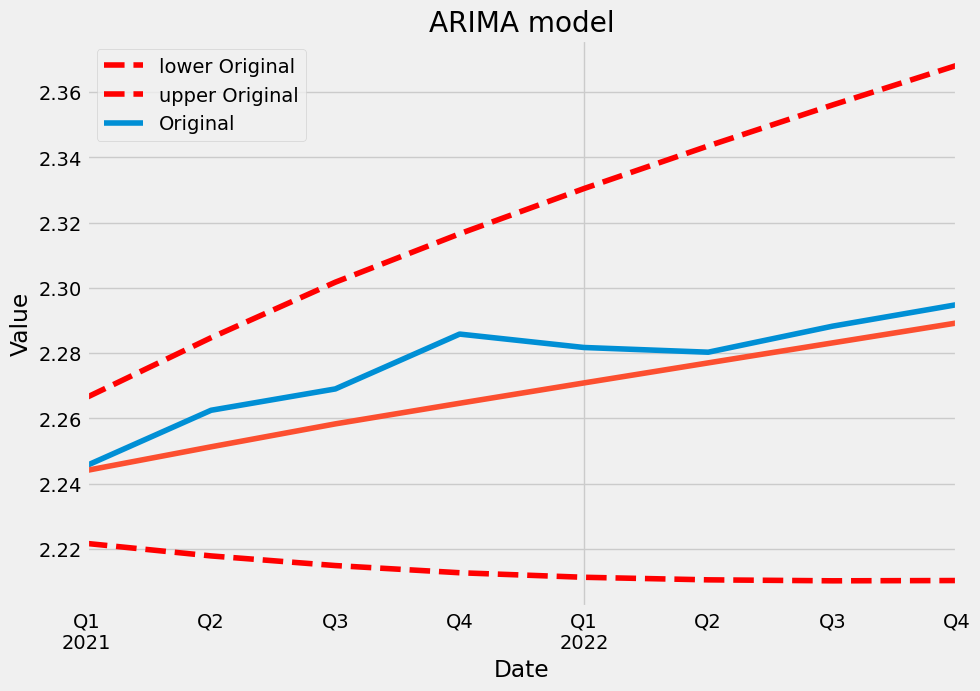

In [101]:
#Forecast for the next 3 years
y_h = result_m.get_forecast(steps=8)
forecast = y_h.predicted_mean
forecast.index = date_index_2[1:]
y_h_conf_int = y_h.conf_int(alpha=0.05)
y_h_conf_int.index = date_index_2[1:]

#Plot the forecast values
y_h_conf_int.plot(color='red', linestyle='dashed')
pred['Original'].plot(figsize = (10, 7), legend=True)
forecast.plot()
plt.title('ARIMA model')
plt.ylabel('Value')
plt.xlabel('Date')
test_mae_6 = mean_absolute_error(forecast, pred['Original'])
print('Mean absolute error: {}'.format(test_mae_6))

In terms of MAE, this traditional statistical approach outperforms all previous machine learning techniques. This should be not a coincidence, we are examining a seasonally adjusted time series, which tends to be stationary in a low sense. In general, ARIMA is more suitable for analyzing data with simple patterns, while deep learning may be more appropriate for modeling complex patterns in large datasets. Moreover, we can obtain 95% prediction intervals using the standard errors of our estimates*.

*Note: we consider also bootstrap prediction intervals, obtaining similar results. 

## The GAN window

As a last model, we propose a predictive approach based on synthetic data. A synthetic time series is a simulated or artificially generated time series data that is created to imitate the statistical properties of real-world time series data. This can be achieved using various  machine learning techniques such as neural networks or random forests. Synthetic time series data can be used for several purposes like testing predictive models, evaluating forecasting algorithms, or generating data for training and testing purposes. They are also valuable when real-world time series data is not available or is limited.

An example for all, is time series bootstrap. It is a resampling technique used for analyzing time series data. In this approach, multiple samples are generated from the original time series by randomly selecting data points with replacement, and a new time series is created from each sample. These new time series can be analyzed to estimate the uncertainty or variability in the original time series. The time series bootstrap method is particularly useful when the statistical properties of the time series are not well understood or when the assumptions of other statistical methods are not met. The time series bootstrap is commonly used in finance, economics, and meteorology to both forecast future values, and estimate its risks. 

### The idea
We propose a technique similar to the bootstrap but using generated data. In the most suitable case a well-established model is already present, and leaving everything unchanged we may obtain appropriate prediction intervals from its underlying distribution using the GAN (as done before for the distribution of the GDP). However, in a more realistic framework a model is not yet present or is constantly updated during the time. So, in the following we will use the GAN to obtain both predictions and prediction intervals. This last section has the following structure.

> 1) We generate one thousand of synthetic time series from the original data until the 4Q of 2022.

> 2) We compute the mean and the 95% prediction intervals for the chosen forecasting horizon (i.e. two years in this case). 

> 3) We evaluate the proposed prediction intervals respect cumulative log-return of original data from 4Q 2020 to the 4Q 2022.

>4) We enlarge the forecasting horizon until 2040.

>5) We test the GAN to learn the past prediction errors' distribution.

### Synthetic data

In [102]:
prices_returns_3 = pd.read_csv(r'.\GDPC1.csv') #import the eniter time sires, until 2022
f_log_return(prices_returns_3['GDPC1'])
prices_returns_3['ret'] = f_log_return(prices_returns_3['GDPC1'])['Log Returns']
prices_returns_3.index = pd.to_datetime(prices_returns_3['DATE'])
date_index_3 = prices_returns_3.index
prices_returns_3 = prices_returns_3
log_returns_3 = prices_returns_3.iloc[:,2].to_frame()
list_original_3 = log_returns_3.div(100).iloc[:,0].tolist()
prices_3 = prices_returns_3.iloc[:,1].to_frame()
list_original_p3 = prices_3.iloc[:,0].tolist()
df_TT = pd.DataFrame(np.cumsum(list_original_3), columns=['Original']) #new dataset with cumulative log-returns until 2022

As reported below, the proposed GAN generates synthetic data which cover almost all possible values of the real ones. Moreover, the mean of synthetic time series is similar to the real one, too.

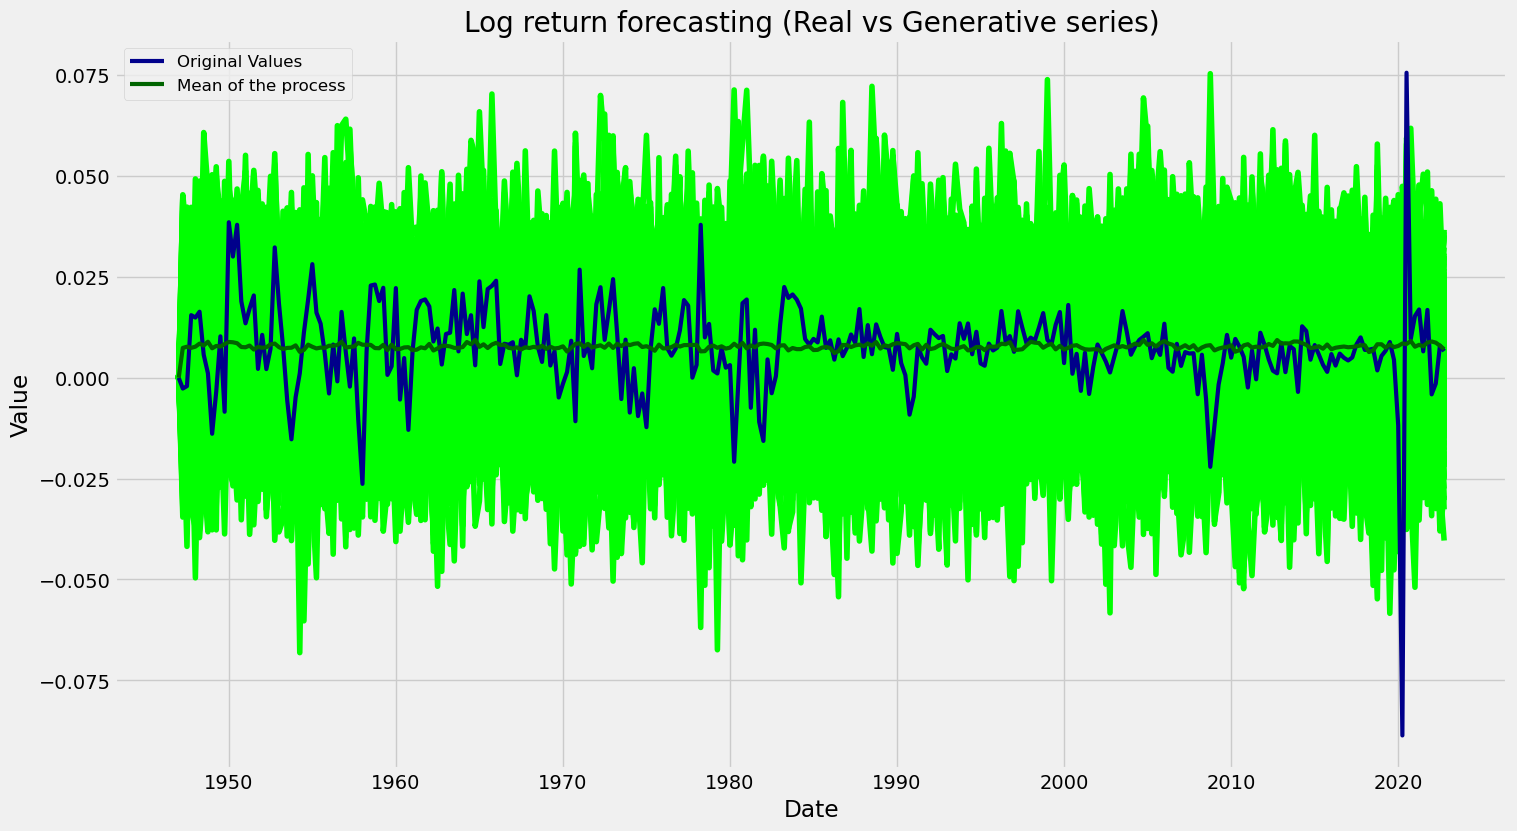

In [103]:
np.random.seed(7)

plt.subplots(figsize=(16, 9))
for i in range(1000):
    noise = np.random.randn(30,100) #30x32x100
    predictions = generator(noise, training=True)
    result = tf.squeeze(predictions) #Given a tensor input, this operation returns a tensor of the same type with all dimensions of size 1 removed.
    temp = (result.numpy())
    generated_data = [item for sublist in temp for item in sublist] #temp is the list getting flattened
    df_generated = pd.DataFrame(generated_data, columns=['Generated Data'])
    df_generated = df_generated[:312] #select time series data 
    
    df12 = df_generated.div(100) #divide by 100 to compensate for training input (x100)
    df12.iloc[0, 0] = 0
    df13 = df12.iloc[:,0].tolist()
    df = pd.DataFrame(df13, columns=['logreturns'])
    df["logr_na0"] = df.logreturns.fillna(0)
    df_TT[f'Cumlog-{i}'] = df.logr_na0
    df['cumlog'] = df.logr_na0

    list_generated = df.iloc[:,2].tolist()
    plt.plot(date_index_3, df[df.index < len(log_returns_3)]['cumlog'], color='lime')

plt.plot(date_index_3, list_original_3, label='Original Values', linewidth=3, color='darkblue')
plt.plot(date_index_3, df_TT.drop(['Original'], axis=1).mean(axis=1), label='Mean of the process', linewidth=3, color='darkgreen')
plt.xlabel('Date')
#plt.axhline(np.mean(list_original_3),label='Mean original values', linewidth=1, color='yellow')
plt.ylabel('Value')
plt.title('Log return forecasting (Real vs Generative series)')
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
plt.legend(fontsize=12)
plt.show()

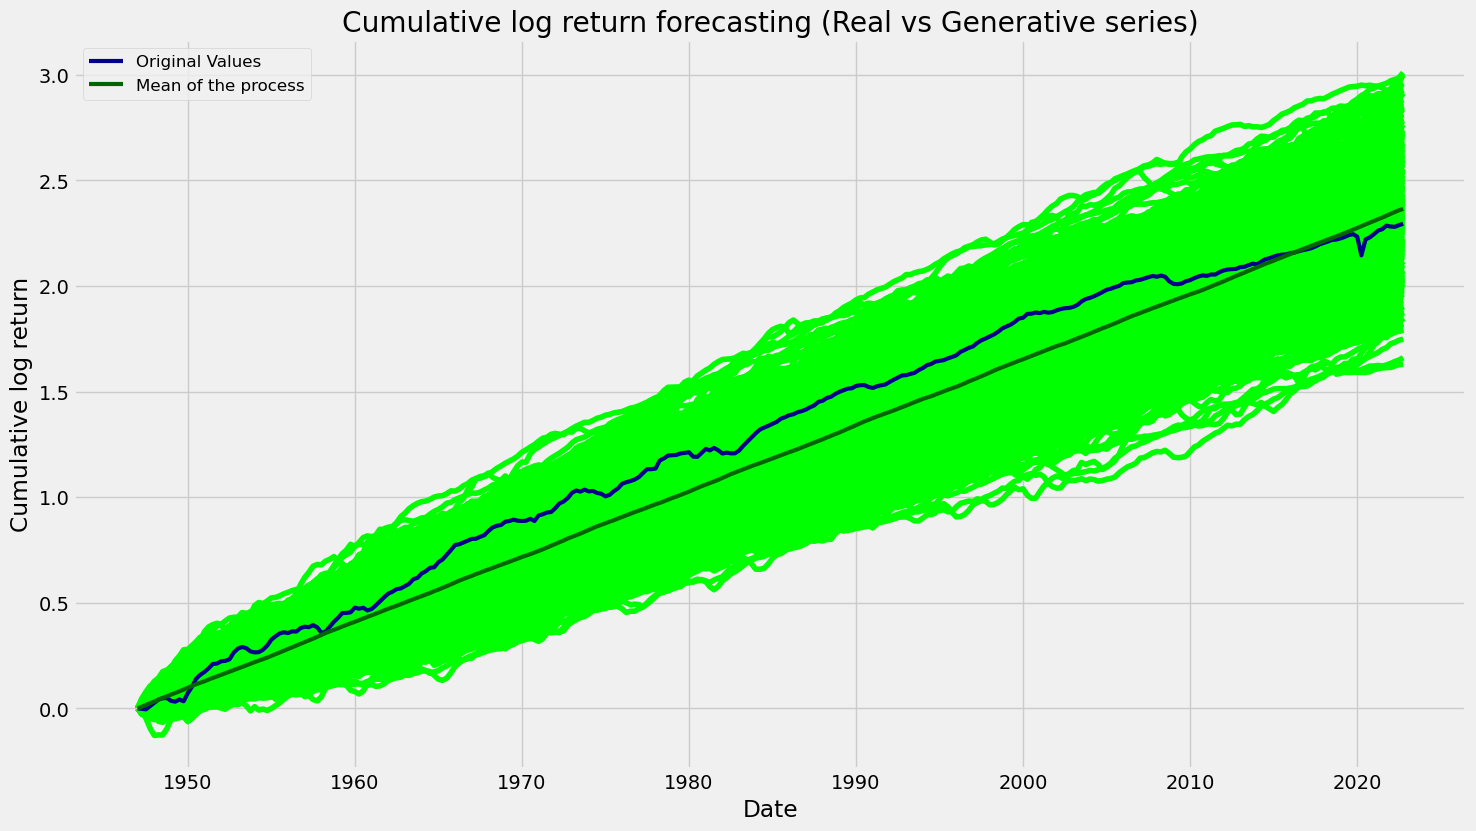

In [104]:
np.random.seed(1)

plt.subplots(figsize=(16, 9))
for i in range(1000):
    noise = np.random.randn(30,100) #30x32x100
    predictions = generator(noise, training=True)
    result = tf.squeeze(predictions) # Given a tensor input, this operation returns a tensor of the same type with all dimensions of size 1 removed.
    temp = (result.numpy())
    generated_data = [item for sublist in temp for item in sublist] # temp is the list getting flattened
    df_generated = pd.DataFrame(generated_data, columns=['Generated Data'])
    df_generated = df_generated[0:312] #select time series data
    
    df12 = df_generated.div(100) # divide by 100 to compensate for training input (x100)
    df12.iloc[0, 0] = 0
    df13 = df12.iloc[:,0].tolist()
    df = pd.DataFrame(df13, columns=['logreturns'])
    df["logr_na0"] = df.logreturns.fillna(0)
    df_TT[f'Cumlog-{i}'] = np.cumsum(df.logr_na0) 
    df['cumlog'] = np.cumsum(df.logr_na0)

    list_generated = df.iloc[:,2].tolist()
    plt.plot(date_index_3, df[df.index < len(log_returns_3)]['cumlog'], color='lime')

plt.plot(date_index_3, np.cumsum(list_original_3), label='Original Values', linewidth=3, color='darkblue')
plt.plot(date_index_3, df_TT.drop(['Original'], axis=1).mean(axis=1), label='Mean of the process', linewidth=3, color='darkgreen')
plt.xlabel('Date')
plt.ylabel('Cumulative log return')
plt.title('Cumulative log return forecasting (Real vs Generative series)')
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
plt.legend(fontsize=12)
plt.show()

At the end of 2022 the mean of the process has a cumulative log returns equal to 2.38, which means that the USA economy has an averaged growth rate equal to 3.17% from 1947 until 2022. This is in line with the real value reported by the [Trading Economics platform](https://tradingeconomics.com/united-states/gdp-growth), that is 3.18%. 

In [105]:
X_11 = df_TT.drop(['Original'], axis=1) #dataset of Synthetic data until 2022
X_11 = X_11[X_11.index < len(log_returns_2)]
X_11

Cumlog-0  Cumlog-1  Cumlog-2  Cumlog-3  Cumlog-4  Cumlog-5  Cumlog-6  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.001746  0.008539  0.002809 -0.020259 -0.002192 -0.009237  0.009925   
2  0.001049  0.000208  0.006766 -0.029140  0.001590 -0.018572  0.009981   
3  0.007279 -0.004329  0.015667 -0.037356 -0.000404 -0.006412  0.014568   
4  0.021312 -0.007710  0.018403 -0.039407  0.004865  0.008412  0.026374   
5  0.034519  0.002608  0.024798 -0.037894  0.011973  0.010807  0.053288   
6  0.050817  0.022648  0.032181 -0.026548  0.031182  0.025440  0.059909   
7  0.072109  0.038081  0.044531 -0.009203  0.036355  0.041148  0.085548   
8  0.083081  0.048862  0.056759  0.001375  0.046746  0.060621  0.091156   

   Cumlog-7  Cumlog-8  Cumlog-9  ...  Cumlog-990  Cumlog-991  Cumlog-992  \
0  0.000000  0.000000  0.000000  ...    0.000000    0.000000    0.000000   
1 -0.007717  0.001516  0.007897  ...    0.007277    0.008998    0.011496   
2 -0.003954  0.018698  0.012068  ...    0.019113    0.017056    0.013432   
3 -0.012247  0.006309  0.027476  ...    0.033900    0.023164    0.023585   
4 -0.001520  0.015810  0.040719  ...    0.051792    0.035219    0.030324   
5 -0.010639  0.017457  0.045927  ...    0.065892    0.054054    0.047625   
6 -0.008981  0.018742  0.057643  ...    0.074734    0.088189    0.061935   
7  0.006264  0.016063  0.073777  ...    0.084009    0.109599    0.076196   
8  0.022848  0.028950  0.081661  ...    0.085519    0.140602    0.091616   

   Cumlog-993  Cumlog-994  Cumlog-995  Cumlog-996  Cumlog-997  Cumlog-998  \
0    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
1    0.011561    0.017728    0.009227    0.038014    0.011803    0.010800   
2    0.038399    0.014464    0.034611    0.043952    0.025083    0.001862   
3    0.062294    0.008165    0.039143    0.060016    0.040889    0.005898   
4    0.085192    0.012686    0.054396    0.078840    0.060624    0.013057   
5    0.103488    0.021762    0.051285    0.062831    0.064197    0.034770   
6    0.114646    0.044140    0.062239    0.049721    0.072433    0.052575   
7    0.135356    0.060675    0.065077    0.051340    0.069989    0.077214   
8    0.153435    0.074090    0.061477    0.073658    0.070253    0.080633   

   Cumlog-999  
0    0.000000  
1    0.011474  
2    0.012373  
3    0.020495  
4    0.012531  
5    0.014462  
6    0.019216  
7    0.020498  
8    0.013691  

[9 rows x 1000 columns]

### GAN prediction intervals and forecasting

With the GAN approach we obtain a MAE of 0.008 which is lower to those obtained with the other machine learning algorithms and very similar to the MAE of the ARIMA model.Forecasting techniques can be used to reduce the uncertainty associated with future values, but there is always some level of uncertainty in these predictions. Therefore, it is important to understand and account for uncertainty to make informed decisions based on the forecasts.
Using the proposed approach the original time series is always inside the 95% prediction intervals. 

The reader have to take in mind that the GAN is designed to learn the probability distribution of a training dataset and generates new data, which tends to follow that distribution. Like for the ARIMA model, it is important to work with seasonally adjusted and stationary time series. 

In [106]:
from statsmodels.tsa.stattools import adfuller
res = adfuller(list_original_3) #Augmented Dickey-Fuller test null hypothesis: no-stationary time series
 
#printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
 
#printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -10.269651
p-value: 0.000000
critical values at different levels:
	1%: -3.452
	5%: -2.871
	10%: -2.572


In [107]:
percentile_5,percentile_95, mean = X_11.apply(lambda x: np.percentile(x, 2.5), axis=1), X_11.apply(lambda x: np.percentile(x, 97.5), axis=1), X_11.mean(axis=1)
#mean and 95% CI

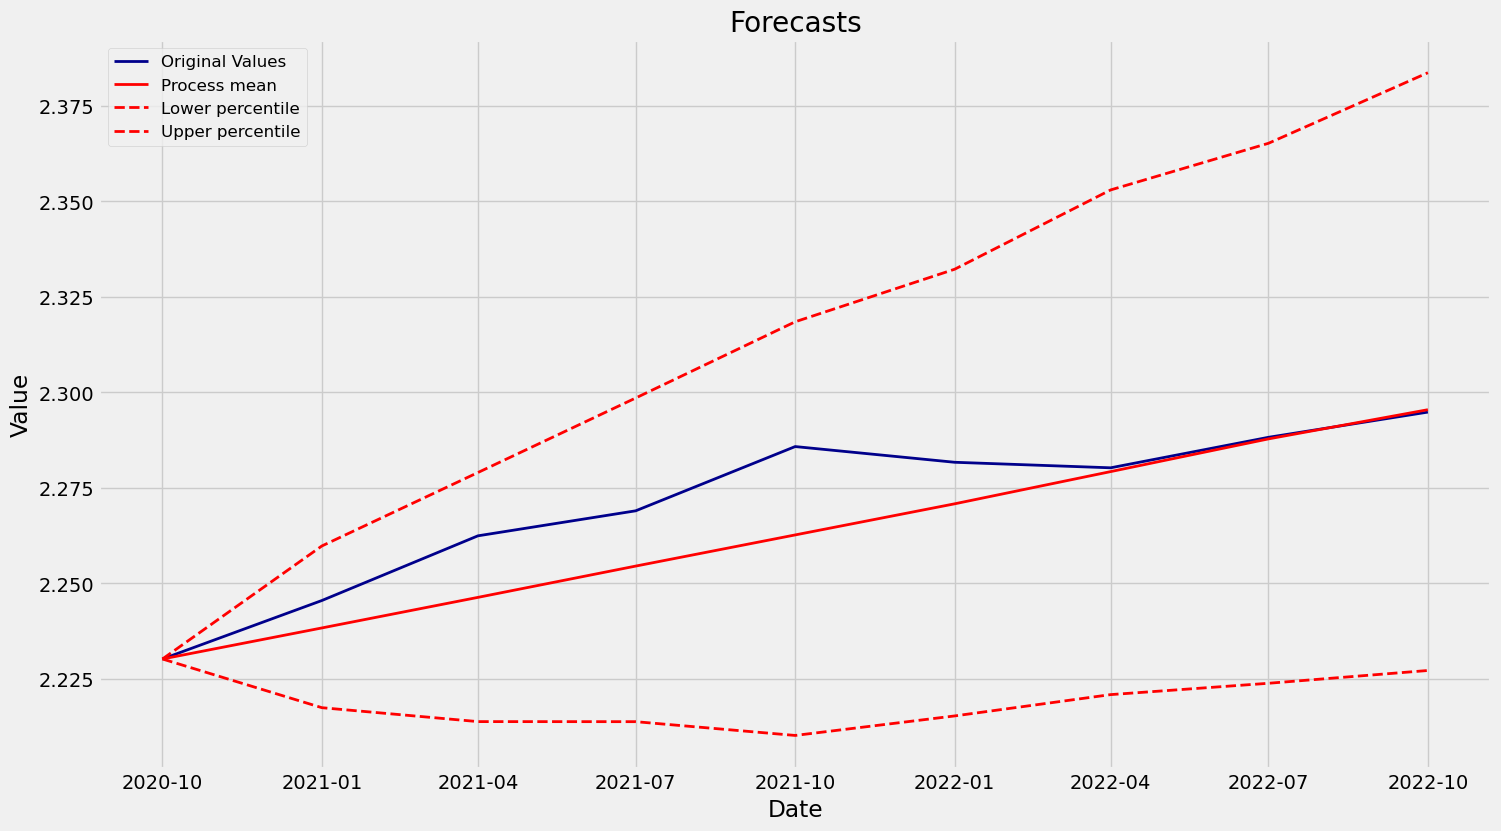

In [108]:
plt.subplots(figsize=(16, 9)) #compare the predictions with real values
plt.plot(date_index_2, np.cumsum(list_original_2)+Y_test_2['Original'][0], label= 'Original Values', linewidth=2, color='darkblue')
plt.plot(date_index_2, mean+Y_test_2['Original'][0], label='Process mean', linewidth=2, color='red')
plt.plot(date_index_2, percentile_5+Y_test_2['Original'][0], label= 'Lower percentile', linewidth=2, color='red', linestyle='dashed')
plt.plot(date_index_2, percentile_95+Y_test_2['Original'][0], label= 'Upper percentile', linewidth=2, color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Forecasts')
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
plt.legend(fontsize=12)
plt.show()

In [109]:
test_mae_7 = mean_absolute_error(mean, np.cumsum(list_original_2))
print('Mean absolute error: {}'.format(test_mae_7))

Mean absolute error: 0.008198866112309822


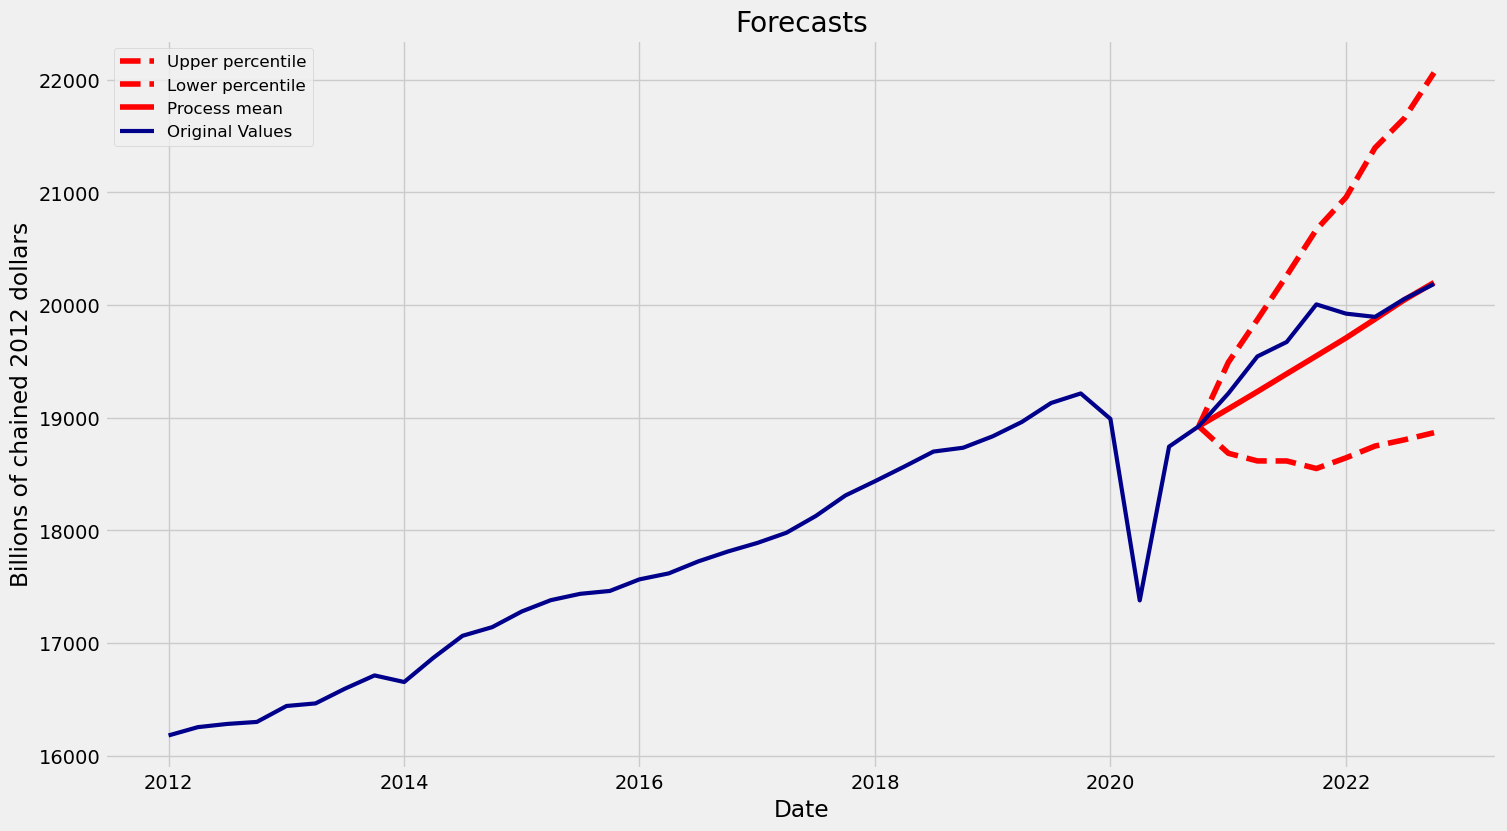

In [110]:
plt.subplots(figsize=(16, 9))

price_00 = 18924.262
up = np.exp(percentile_95)
up = price_00 * up

down = np.exp(percentile_5)
down = price_00 * down

mean_p = np.exp(mean)
mean_p = price_00 * mean_p

plt.plot(date_index_2, up, label='Upper percentile', color='red', linestyle='dashed')
plt.plot(date_index_2, down, label='Lower percentile', color='red', linestyle='dashed')
plt.plot(date_index_2, mean_p, label='Process mean', color='red')
plt.plot(date_index_3[260:312], list_original_p3[260:312], label='Original Values', linewidth=3, color='darkblue')
plt.xlabel('Date')
plt.ylabel('Billions of chained 2012 dollars')
plt.title('Forecasts')
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
plt.legend(fontsize=12)
plt.show()

### A long-term forecasting

Using synthetic data, we also perform a long term forecasting until 2040. As reported before, our proposed GAN correctly capture the averaged growth rate of the process using it to predict future behaviors. 

The GDP constant growth rate hypothesis states that a country's gross domestic product (GDP) will grow at a constant rate over time. This hypothesis assumes that the growth of the economy is not affected by any external shocks or fluctuations and that it will continue to grow at a steady pace. Under this hypothesis, policymakers and economists can make predictions about future economic growth based on past trends and data.
However, it is important to note that the GDP constant growth rate hypothesis is an idealized model of economic growth, and actual growth is often affected also by several other factors, including changes in global economic tensions or political events. We speculate that these exogenous events are captured by the GAN providing a range of alternative growth paths during the time. 

Therefore, economic systems tend to their own equilibrium, reaching in the best situation their balanced growth path. In macroeconomics, the balanced-growth path of a dynamic model is a trajectory such that all variables grow at a constant rate.

In [111]:
date_index_4 = pd.date_range('2020-07-01',  freq='Q', periods=78)

X_11 = df_TT.drop(['Original'], axis=1) #dataset of Synthetic data until 2022
X_11 = X_11[X_11.index < len(date_index_4)] #forecasting horizon
X_11

Cumlog-0  Cumlog-1  Cumlog-2  Cumlog-3  Cumlog-4  Cumlog-5  Cumlog-6  \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.001746  0.008539  0.002809 -0.020259 -0.002192 -0.009237  0.009925   
2   0.001049  0.000208  0.006766 -0.029140  0.001590 -0.018572  0.009981   
3   0.007279 -0.004329  0.015667 -0.037356 -0.000404 -0.006412  0.014568   
4   0.021312 -0.007710  0.018403 -0.039407  0.004865  0.008412  0.026374   
..       ...       ...       ...       ...       ...       ...       ...   
73  0.475184  0.585651  0.545804  0.539161  0.622187  0.534108  0.675611   
74  0.477028  0.597004  0.550280  0.538976  0.625121  0.542609  0.680101   
75  0.489417  0.609624  0.565125  0.539981  0.644497  0.551394  0.699274   
76  0.508558  0.619836  0.572579  0.545823  0.660438  0.571305  0.715530   
77  0.526089  0.631739  0.583157  0.578427  0.678235  0.583804  0.732674   

    Cumlog-7  Cumlog-8  Cumlog-9  ...  Cumlog-990  Cumlog-991  Cumlog-992  \
0   0.000000  0.000000  0.000000  ...    0.000000    0.000000    0.000000   
1  -0.007717  0.001516  0.007897  ...    0.007277    0.008998    0.011496   
2  -0.003954  0.018698  0.012068  ...    0.019113    0.017056    0.013432   
3  -0.012247  0.006309  0.027476  ...    0.033900    0.023164    0.023585   
4  -0.001520  0.015810  0.040719  ...    0.051792    0.035219    0.030324   
..       ...       ...       ...  ...         ...         ...         ...   
73  0.288243  0.735216  0.363014  ...    0.445665    0.664652    0.585674   
74  0.296978  0.748586  0.363502  ...    0.468871    0.675911    0.597372   
75  0.302134  0.750716  0.372910  ...    0.471471    0.685052    0.602213   
76  0.314033  0.756244  0.379690  ...    0.485785    0.694410    0.607717   
77  0.319691  0.756792  0.387000  ...    0.498533    0.706691    0.630784   

    Cumlog-993  Cumlog-994  Cumlog-995  Cumlog-996  Cumlog-997  Cumlog-998  \
0     0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
1     0.011561    0.017728    0.009227    0.038014    0.011803    0.010800   
2     0.038399    0.014464    0.034611    0.043952    0.025083    0.001862   
3     0.062294    0.008165    0.039143    0.060016    0.040889    0.005898   
4     0.085192    0.012686    0.054396    0.078840    0.060624    0.013057   
..         ...         ...         ...         ...         ...         ...   
73    0.863275    0.502278    0.626723    0.548814    0.640941    0.923596   
74    0.864666    0.495225    0.631445    0.557450    0.647719    0.918026   
75    0.857745    0.484392    0.625704    0.570034    0.657871    0.932530   
76    0.865669    0.472454    0.621055    0.583396    0.665737    0.935384   
77    0.867394    0.472669    0.621485    0.599861    0.676283    0.910651   

    Cumlog-999  
0     0.000000  
1     0.011474  
2     0.012373  
3     0.020495  
4     0.012531  
..         ...  
73    0.460142  
74    0.472281  
75    0.479085  
76    0.482409  
77    0.488324  

[78 rows x 1000 columns]

In [112]:
percentile_5,percentile_95, mean = X_11.apply(lambda x: np.percentile(x, 2.5), axis=1), X_11.apply(lambda x: np.percentile(x, 97.5), axis=1), X_11.mean(axis=1)
#mean and 95% CI

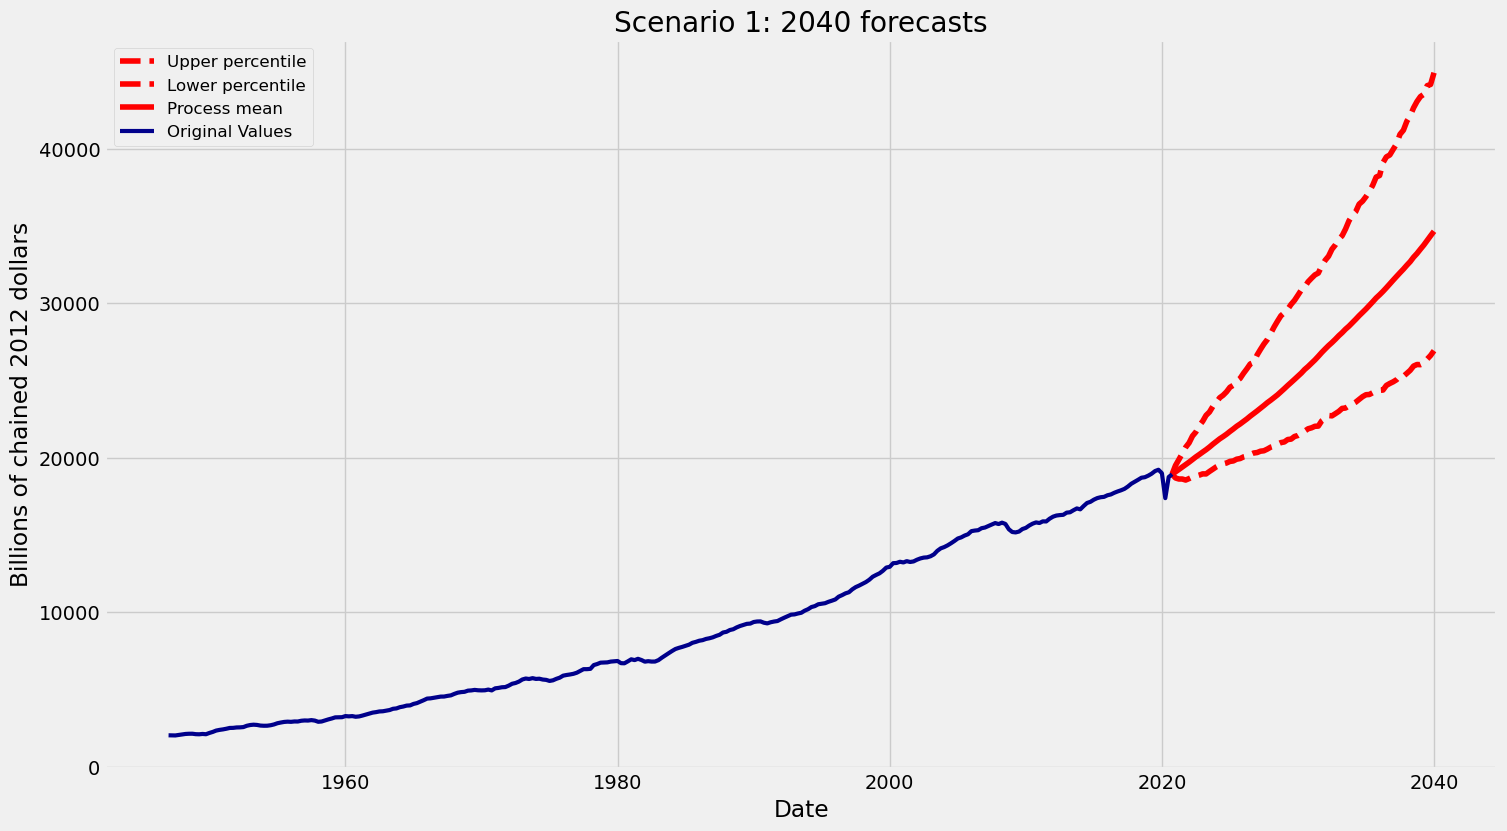

In [113]:
plt.subplots(figsize=(16, 9))

up = np.exp(percentile_95)
up = price_00 * up

down = np.exp(percentile_5)
down = price_00 * down

mean_p = np.exp(mean)
mean_p = price_00 * mean_p

plt.plot(date_index_4, up, label='Upper percentile', color='red', linestyle='dashed')
plt.plot(date_index_4, down, label='Lower percentile', color='red', linestyle='dashed')
plt.plot(date_index_4, mean_p, label='Process mean', color='red')
plt.plot(date_index, list_original_p, label='Original Values', linewidth=3, color='darkblue')
plt.xlabel('Date')
plt.ylabel('Billions of chained 2012 dollars')
plt.title('Scenario 1: 2040 forecasts')
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
plt.legend(fontsize=12)
plt.show()

In [114]:
mean_p #point forecasting

0     18924.262000
1     19078.691244
2     19231.907457
3     19390.059074
4     19548.805645
          ...     
73    33487.110035
74    33750.400614
75    34050.096147
76    34352.714824
77    34645.672667
Length: 78, dtype: float64

The Organization for Economic Co-operation and Development ([OECD](https://data.oecd.org/gdp/real-gdp-long-term-forecast.htm#indicator-chart)) has a long-term baseline projections of real GDP for the USA equal to 28,068 billions of dollars (measured in USD at constant prices and Purchasing Power Parities of 2010). These forecasts are based on articulated models, which uses several variables and assumptions, such as economic policies, demographic trends, global economic conditions, and other factors that may impact economic growth. As outlined in Kohlscheen, E., et al. (2020), the United States GDP's steady-state has declined from just above 3% per year in the 1990s. Probably, OECD estimates give more importance at the current growth rate values rather than the past.
So, we decide to investigate this phenomena firstly computing a linear regression and then using a non-parametric structural break test based on the Cramer von-Mises approach*.

*Note: the test was carried out in R using [cpm package](https://www.rdocumentation.org/packages/cpm/versions/2.3/topics/processStream).

In [115]:
regression = pd.DataFrame(log_returns.div(100).iloc[:,0].tolist(), columns=['Values']) #dataset to store trend and mean
regression.index = date_index
regression['X'] = np.arange(len(regression.index))
regression['Mean'] = regression['Values'].mean()

X_reg = regression.loc[:, ['X']]  #features
Y_reg = regression.loc[:, 'Values']  #target

#train the model
linear = LinearRegression()
linear.fit(X_reg, Y_reg)

#store the fitted values as a time series with the same time index as
#the training data
regression['Trend'] = pd.Series(linear.predict(X_reg), index=X_reg.index) #linear Trend
#Trend.plot(figsize=(15, 8), title = "Past values trend")
regression

Values    X      Mean     Trend
DATE                                         
1947-01-01  0.000000    0  0.007535  0.010435
1947-04-01 -0.002671    1  0.007535  0.010415
1947-07-01 -0.002067    2  0.007535  0.010396
1947-10-01  0.015522    3  0.007535  0.010376
1948-01-01  0.014930    4  0.007535  0.010356
...              ...  ...       ...       ...
2019-10-01  0.004421  291  0.007535  0.004713
2020-01-01 -0.011821  292  0.007535  0.004693
2020-04-01 -0.088660  293  0.007535  0.004673
2020-07-01  0.075613  294  0.007535  0.004654
2020-10-01  0.009586  295  0.007535  0.004634

[296 rows x 4 columns]

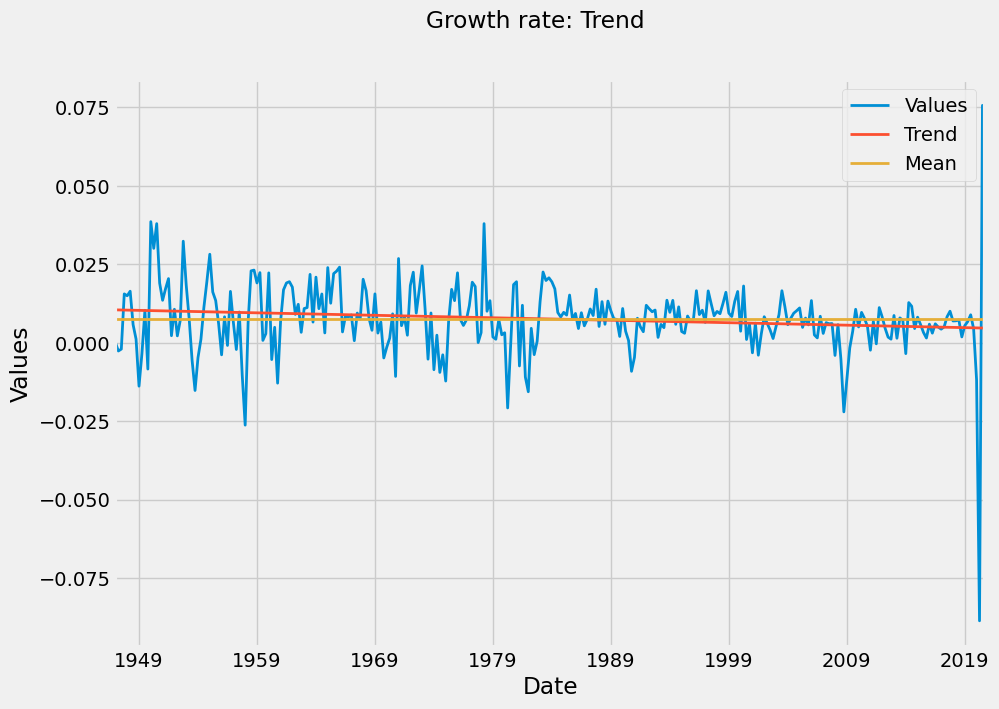

In [116]:
f, ax = plt.subplots(1)
f.set_figheight(7)
f.set_figwidth(10)
_ = regression[['Values', 'Trend', 'Mean']].plot(ax=ax,
                                              style=['-','-'], linewidth=2)
#ax.set_xbound(lower=11, upper=548)
#ax.set_ylim(0.8, 1.5)
plot = plt.suptitle('Growth rate: Trend')
plot = plt.xlabel('Date')
plot = plt.ylabel('Values')
#plt.savefig('Traveling Salesmen Graph2.png')

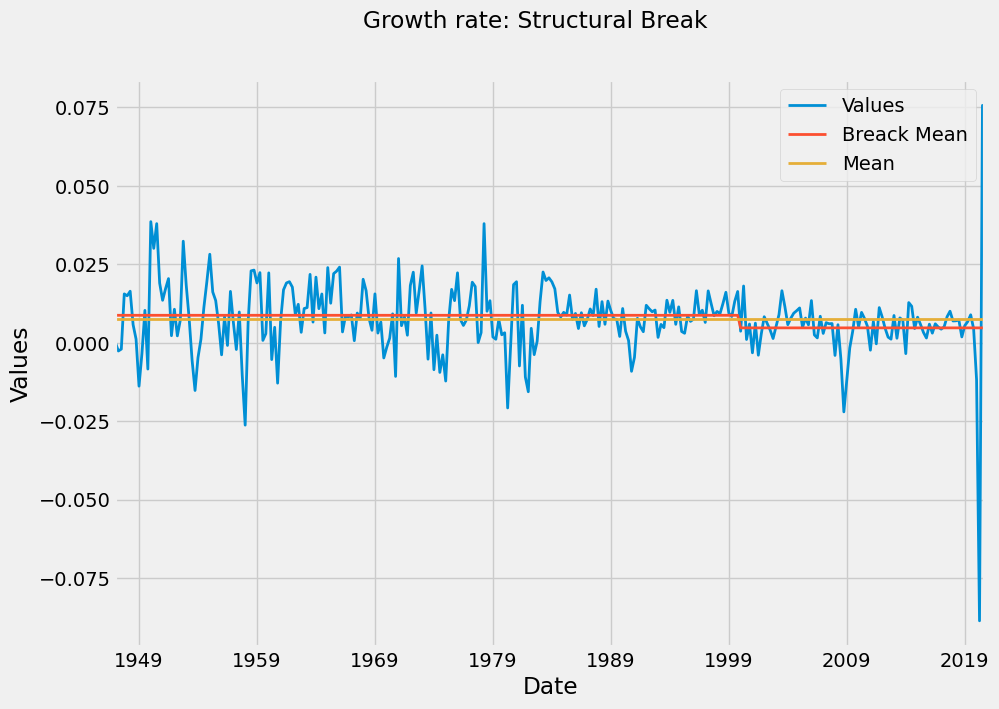

In [117]:
break_data = pd.DataFrame(log_returns_3.div(100).iloc[:,0].tolist(), columns=['Values']) #structural break plot
break_data.index = date_index_3
break_data = break_data[0:212]
break_data['Mean'] = break_data['Values'].mean()

break_data_2 = pd.DataFrame(log_returns_3.div(100).iloc[:,0].tolist(), columns=['Values'])
break_data_2.index = date_index_3
break_data_2 = break_data_2[212:297]
break_data_2['Mean'] = break_data_2['Values'].mean()

regression['Breack Mean'] = pd.concat([break_data['Mean'], break_data_2['Mean']])


f, ax = plt.subplots(1)
f.set_figheight(7)
f.set_figwidth(10)
_ = regression[['Values', 'Breack Mean', 'Mean']].plot(ax=ax,
                                              style=['-','-'], linewidth=2)
#ax.set_xbound(lower=11, upper=548)
#ax.set_ylim(0.8, 1.5)
plot = plt.suptitle('Growth rate: Structural Break')
plot = plt.xlabel('Date')
plot = plt.ylabel('Values')
#plt.savefig('Traveling Salesmen Graph2.png')

As outlined above, the GDP growth rate has a negative trend. Moreover, even if the Dickey–Fuller test accepted the stationary hypothesis, the non-parametric test identified a break in the series at the date 01-01-2000. These findings give us two ways to follow,

> 1) according to the Ramsey Model (which is the base of standard Dynamic General Equilibrium models), the steady-state growth rate of GDP is determined by the rate of technological progress or productivity growth, which is exogenous, and the rate of investment. When investment is high, the economy can grow at a faster rate because more resources are being devoted to the production of new capital goods, which can then be used to increase productivity and output. One of the key features of the Ramsey model is that it can exhibit multiple steady states. Under this hypothesis, there are two or more stable equilibria that the economy can converge to depending on the initial conditions or policy interventions. The existence of multiple steady states in the Ramsey model has important implications for policy interventions. Depending on the initial conditions, policy interventions could lead the economy to converge to either steady state. Thus, policymakers must carefully consider the potential trade-offs and implications of their decisions when designing economic policies. 

> 2) there are some states in the development path of an economy where once left we cannot longer return. An example for all is the Malthusianism trap (Ray, D., 1998). 

Multiple steady states is a long term phenomena, and it may be hard to predict where the economy will be with a so large horizon. At the present we have not hints or suggestions to know in which steady state the economy will be. In other words, the system can remain at the present equilibrium, returning to the previous one or also moving in between of the two.
To deal with this issue, a solution could be to perform an average between steady states. The reader should take in mind that this is only one of a wider set of subjective alternatives that may be used to deal with the presence of multiple steady states. 

Considering the second hypothesis, the economy cannot return anymore to previous states. Therefore, we re-estimate our proposed PAR-WGAN-GP using only observations after the date 01-01-2000.

In [118]:
data_2 = rolling_window(np.asarray(log_returns[212:]))
train_data_2 = np.stack(data_2, axis=0)

#specific for real data
BUFFER_SIZE = len(log_returns[212:]) #lenght of timeseries 

#convert to tensor
train_data_2 = tf.convert_to_tensor(train_data_2, np.float32)
train_dataset_2 = tf.data.Dataset.from_tensor_slices(train_data_2).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
#0.1 tot
#0.3 without covid

In [119]:
###Load the model below. Too time to run.

#Input for the generator: some random noise, called latent data 
#EPOCHS = 1000
#num_examples_to_generate = 16 # maximum value due to plotting 
#seed = tf.random.normal([num_examples_to_generate, noise_dim])
#disc_n = 5

#test = [[plot_hist, seed]]

#G_loss = []; D_loss = []; D_loss_0 = []

#train(train_dataset_2, test, EPOCHS, choice, disc_n)

#dict = {'Loss_G': G_loss, 'Loss_D': D_loss, 'Loss_D_0': D_loss_0}  
       
#df = pd.DataFrame(dict) 
    
# saving the dataframe 
#df.to_csv('Loss.csv') 

In [120]:
###Loading the model

#checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir)) #last checkpoint
#ckpt_manager = tf.train.CheckpointManager(checkpoint, checkpoint_dir, max_to_keep=50)
checkpoint_fname = checkpoint_dir + '\ckpt-''WGAN-PAR-R2'
tf.print("-----------Restoring from {}-----------".format(checkpoint_fname))
checkpoint.restore(checkpoint_fname)

-----------Restoring from ./training_checkpoints\ckpt-WGAN-PAR-R2-----------


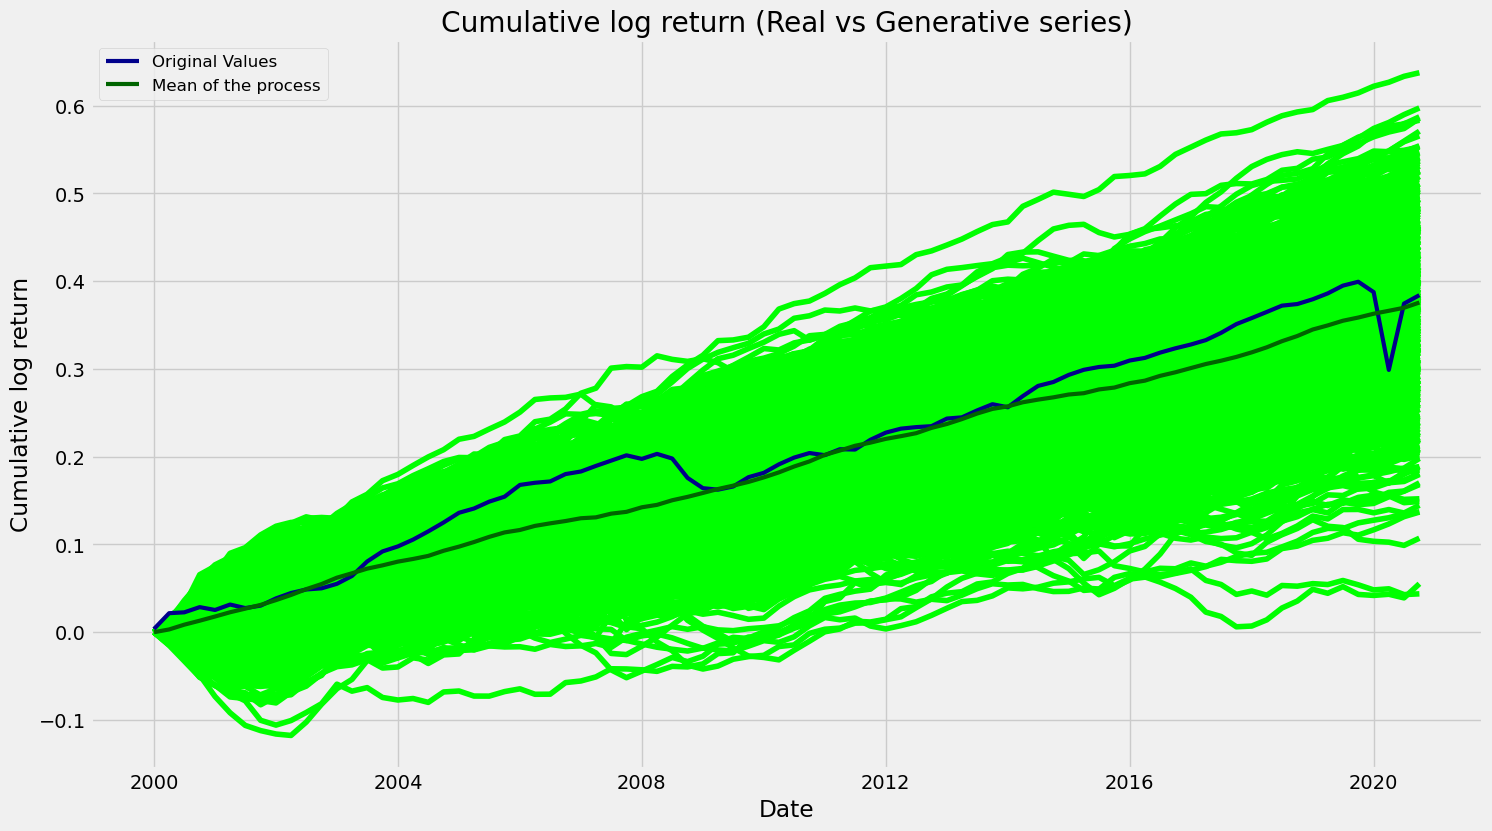

In [121]:
np.random.seed(13)

df_TTT = pd.DataFrame(np.cumsum(list_original[212:]), columns=['Original']) #new dataset with cumulative log-returns from 2000 to 2020

plt.subplots(figsize=(16, 9))
for i in range(1000):
    noise = np.random.randn(20,100)
    predictions = generator(noise, training=True)
    result = tf.squeeze(predictions) #given a tensor input, this operation returns a tensor of the same type with all dimensions of size 1 removed.
    temp = (result.numpy())
    generated_data = [item for sublist in temp for item in sublist] #temp is the list getting flattened
    df_generated = pd.DataFrame(generated_data, columns=['Generated Data'])
    df_generated = df_generated[0:84] #selected time series
    
    df12 = df_generated.div(100) #divide by 100 to compensate for training input (x100)
    df12.iloc[0, 0] = 0
    df13 = df12.iloc[:,0].tolist()
    df = pd.DataFrame(df13, columns=['logreturns'])
    df["logr_na0"] = df.logreturns.fillna(0)
    df_TTT[f'Cumlog-{i}'] = np.cumsum(df.logr_na0) 
    df['cumlog'] = np.cumsum(df.logr_na0)

    list_generated = df.iloc[:,2].tolist()
    plt.plot(date_index[212:], df[df.index < len(log_returns[212:])]['cumlog'], color='lime')

plt.plot(date_index[212:], np.cumsum(list_original[212:]), label='Original Values', linewidth=3, color='darkblue')
plt.plot(date_index[212:], df_TTT.drop(['Original'], axis=1).mean(axis=1), label='Mean of the process', linewidth=3, color='darkgreen')
plt.xlabel('Date')
plt.ylabel('Cumulative log return')
plt.title('Cumulative log return (Real vs Generative series)')
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
plt.legend(fontsize=12)
plt.show()

In [122]:
X_111 = df_TTT.drop(['Original'], axis=1) #dataset of Synthetic data from 2000 to 2020
X_111 = X_111[X_111.index<len(date_index_4)]
X_111

Cumlog-0  Cumlog-1  Cumlog-2  Cumlog-3  Cumlog-4  Cumlog-5  Cumlog-6  \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  -0.005028  0.010802  0.003315  0.004288  0.017621  0.006186  0.001880   
2  -0.006655  0.019468  0.006952  0.000896  0.026246  0.011530  0.007135   
3  -0.014519  0.025410  0.014876  0.004144  0.037254  0.015561  0.009322   
4  -0.021228  0.030751  0.018689  0.003481  0.043922  0.018763  0.013070   
..       ...       ...       ...       ...       ...       ...       ...   
73  0.422931  0.344443  0.225630  0.237258  0.411280  0.404983  0.110960   
74  0.423574  0.352673  0.238983  0.242109  0.419799  0.416338  0.125861   
75  0.419388  0.365228  0.242447  0.250597  0.430504  0.420567  0.135934   
76  0.424310  0.377916  0.241399  0.253474  0.436475  0.432474  0.139759   
77  0.443230  0.381029  0.234273  0.255551  0.434225  0.445090  0.135956   

    Cumlog-7  Cumlog-8  Cumlog-9  ...  Cumlog-990  Cumlog-991  Cumlog-992  \
0   0.000000  0.000000  0.000000  ...    0.000000    0.000000    0.000000   
1  -0.002715  0.003928  0.005952  ...    0.007619    0.007815    0.001035   
2   0.006451  0.010474  0.015220  ...    0.017989    0.010887    0.010470   
3   0.009992  0.021878  0.027991  ...    0.026099    0.010843    0.012907   
4   0.013770  0.024237  0.034521  ...    0.036931    0.014670    0.015028   
..       ...       ...       ...  ...         ...         ...         ...   
73  0.221650  0.307759  0.253810  ...    0.410601    0.376726    0.355174   
74  0.226196  0.318881  0.260378  ...    0.418988    0.378854    0.357329   
75  0.230292  0.326596  0.275038  ...    0.425480    0.385724    0.374675   
76  0.248705  0.333677  0.283355  ...    0.431004    0.392061    0.378345   
77  0.251978  0.331820  0.285088  ...    0.431708    0.399415    0.386364   

    Cumlog-993  Cumlog-994  Cumlog-995  Cumlog-996  Cumlog-997  Cumlog-998  \
0     0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
1     0.005808    0.001639    0.015508    0.008254   -0.008573    0.001766   
2     0.009634    0.008829    0.020693    0.021327   -0.003786    0.012265   
3     0.010764    0.006195    0.025806    0.033688   -0.010983    0.026152   
4     0.011770    0.020370    0.025165    0.046177   -0.009989    0.033406   
..         ...         ...         ...         ...         ...         ...   
73    0.416989    0.363378    0.370555    0.307798    0.164125    0.355518   
74    0.427129    0.367486    0.371769    0.314627    0.176263    0.354924   
75    0.428870    0.364835    0.382755    0.310274    0.179756    0.358281   
76    0.435848    0.375017    0.379908    0.323906    0.186828    0.362688   
77    0.433127    0.374119    0.377318    0.321676    0.188493    0.369051   

    Cumlog-999  
0     0.000000  
1     0.013485  
2     0.027564  
3     0.048691  
4     0.056030  
..         ...  
73    0.357385  
74    0.365035  
75    0.369886  
76    0.377846  
77    0.388520  

[78 rows x 1000 columns]

In [123]:
percentile_5_2, percentile_95_2, mean_2 = X_111.apply(lambda x: np.percentile(x, 2.5), axis=1), X_111.apply(lambda x: np.percentile(x, 97.5), axis=1), X_111.mean(axis=1)
#mean and 95% CI

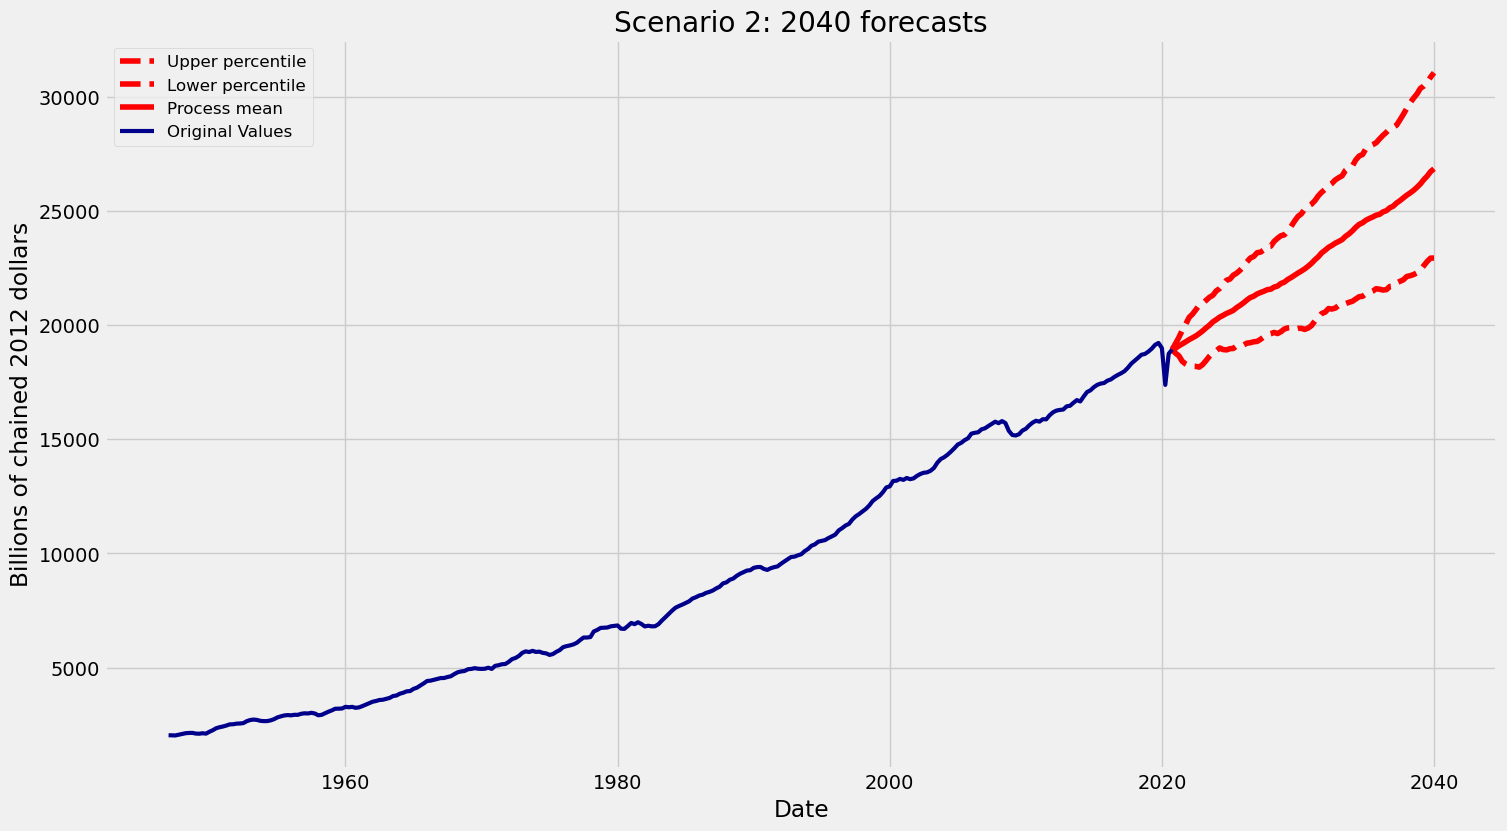

In [124]:
plt.subplots(figsize=(16, 9))

up_2 = np.exp(percentile_95_2)
up_2 = price_00 * up_2

down_2 = np.exp(percentile_5_2)
down_2 = price_00 * down_2

mean_p_2 = np.exp(mean_2)
mean_p_2 = price_00 * mean_p_2

plt.plot(date_index_4, up_2, label='Upper percentile', color='red', linestyle='dashed')
plt.plot(date_index_4, down_2, label='Lower percentile', color='red', linestyle='dashed')
plt.plot(date_index_4, mean_p_2, label='Process mean', color='red')
plt.plot(date_index, list_original_p, label='Original Values', linewidth=3, color='darkblue')
plt.xlabel('Date')
plt.ylabel('Billions of chained 2012 dollars')
plt.title('Scenario 2: 2040 forecasts')
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
plt.legend(fontsize=12)
plt.show()

In [125]:
mean_p_2 #points forecast

0     18924.262000
1     18984.334762
2     19088.218031
3     19174.251091
4     19266.221427
          ...     
73    26183.824052
74    26367.204993
75    26523.535804
76    26719.763082
77    26845.559408
Length: 78, dtype: float64

Using this approach, we end up with a predicted value for 2040 equal to 26,845 billions of dollars. To deal with the multiple steady states issue, we can also perform an average between GANs estimate, considering each steady state singularly. In this regard, we train the GAN using only the data from 1947 to 2000, and then we obtain a short-long term PAR-WGAN-GP archetype doing a weighted average between the present and the past model. By assigning a weight of 0.6 for the current steady state, we end up with a forecasting value of 30,682. This final approach turned out to be the most appropriate one to deal with both short term and long term forecasting*.

*Note: Our data are expressed in billions of chained 2012 dollars, and those of OECD in USD at constant prices and Purchasing Power Parities of 2010. Moreover, the average inflation rate from 1960 to 2021 in the United States was 3.8% per year.

In [126]:
data_22 = rolling_window(np.asarray(log_returns[:212]))
train_data_22 = np.stack(data_22, axis=0)

BUFFER_SIZE = len(log_returns[:212]) #lenght of timeseries

# Convert to tensor
train_data_22 = tf.convert_to_tensor(train_data_22, np.float32)
train_dataset_22 = tf.data.Dataset.from_tensor_slices(train_data_22).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [127]:
###Load the model below. Too time to run.

#Input for the generator: some random noise, called latent data 
#EPOCHS = 1000
#num_examples_to_generate = 16 # maximum value due to plotting 
#seed = tf.random.normal([num_examples_to_generate, noise_dim])
#disc_n = 5

#test = [[plot_hist, seed]]

#G_loss = []; D_loss = []; D_loss_0 = []

#train(train_dataset_22, test, EPOCHS, choice, disc_n)

#dict = {'Loss_G': G_loss, 'Loss_D': D_loss, 'Loss_D_0': D_loss_0}  
       
#df = pd.DataFrame(dict) 
    
# saving the dataframe 
#df.to_csv('Loss.csv') 

In [128]:
###Loading the model

#checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir)) #last checkpoint
#ckpt_manager = tf.train.CheckpointManager(checkpoint, checkpoint_dir, max_to_keep=50)
checkpoint_fname = checkpoint_dir + '\ckpt-''WGAN-PAR-R3'
tf.print("-----------Restoring from {}-----------".format(checkpoint_fname))
checkpoint.restore(checkpoint_fname)

-----------Restoring from ./training_checkpoints\ckpt-WGAN-PAR-R3-----------


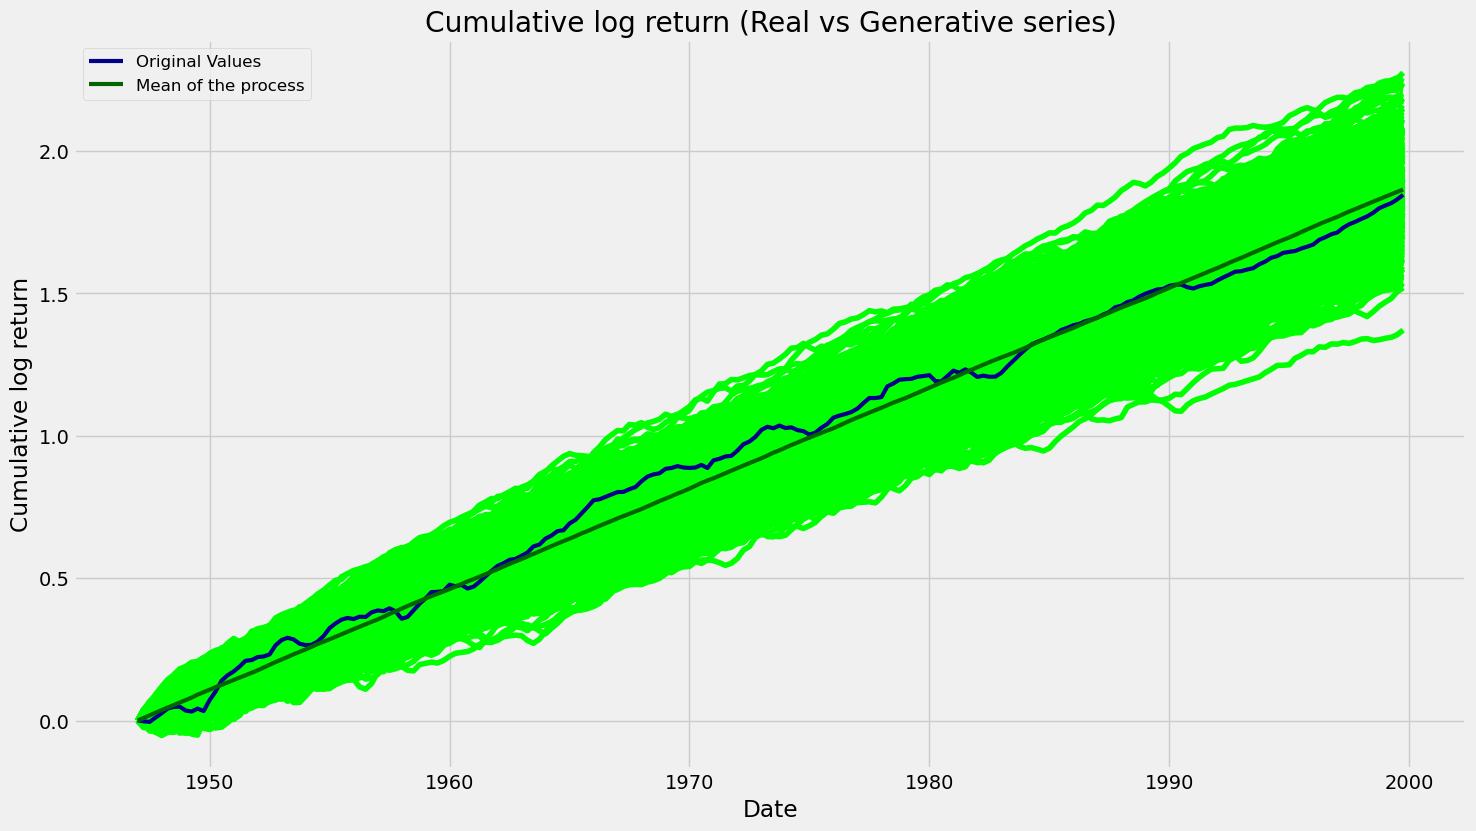

In [129]:
np.random.seed(15)

df_TTTT = pd.DataFrame(np.cumsum(list_original[:212]), columns = ['Original']) #new dataset with cumulative log-returns from 1947 to 2000


plt.subplots(figsize=(16, 9))
for i in range(1000):
    noise = np.random.randn(20,100)
    predictions = generator(noise, training=True)
    result = tf.squeeze(predictions) #Given a tensor input, this operation returns a tensor of the same type with all dimensions of size 1 removed.
    temp = (result.numpy())
    generated_data = [item for sublist in temp for item in sublist] #temp is the list getting flattened
    df_generated = pd.DataFrame(generated_data, columns=['Generated Data'])
    df_generated = df_generated[:212] #selected time series
    
    df12 = df_generated.div(100) #divide by 100 to compensate for training input (x100)
    df12.iloc[0, 0] = 0
    df13 = df12.iloc[:,0].tolist()
    df = pd.DataFrame(df13, columns=['logreturns'])
    df["logr_na0"] = df.logreturns.fillna(0)
    df_TTTT[f'Cumlog-{i}'] = np.cumsum(df.logr_na0) 
    df['cumlog'] = np.cumsum(df.logr_na0)

    list_generated = df.iloc[:,2].tolist()
    plt.plot(date_index[:212], df[df.index < len(log_returns[:212])]['cumlog'], color='lime')

plt.plot(date_index[:212], np.cumsum(list_original[:212]), label='Original Values', linewidth=3, color='darkblue')
plt.plot(date_index[:212], df_TTTT.drop(['Original'], axis=1).mean(axis=1), label='Mean of the process', linewidth=3, color='darkgreen')
plt.xlabel('Date')
plt.ylabel('Cumulative log return')
plt.title('Cumulative log return (Real vs Generative series)')
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
plt.legend(fontsize=12)
plt.show()

In [130]:
X_1111 = df_TTTT.drop(['Original'], axis=1) #dataset of Synthetic data from 1947 to 2000
X_1111 = X_1111[X_1111.index < len(date_index_4)]
X_1111

Cumlog-0  Cumlog-1  Cumlog-2  Cumlog-3  Cumlog-4  Cumlog-5  Cumlog-6  \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.008832  0.005051 -0.000316 -0.007038  0.006224  0.005706  0.025565   
2   0.029915 -0.004395  0.014250 -0.000904  0.007579  0.019532  0.033092   
3   0.035946 -0.001668  0.039939  0.012200  0.009865  0.035021  0.043658   
4   0.041679  0.001410  0.057973  0.008589  0.021869  0.055399  0.058322   
..       ...       ...       ...       ...       ...       ...       ...   
73  0.621221  0.625859  0.646448  0.629616  0.629315  0.597789  0.619483   
74  0.634436  0.630787  0.663705  0.649387  0.645626  0.603432  0.627727   
75  0.647592  0.644429  0.664115  0.661132  0.668122  0.620785  0.631273   
76  0.658655  0.664720  0.665619  0.674887  0.679453  0.633717  0.630326   
77  0.667110  0.681790  0.678581  0.687760  0.692591  0.637762  0.639833   

    Cumlog-7  Cumlog-8  Cumlog-9  ...  Cumlog-990  Cumlog-991  Cumlog-992  \
0   0.000000  0.000000  0.000000  ...    0.000000    0.000000    0.000000   
1   0.005349  0.015290  0.025083  ...    0.023456    0.022302   -0.001386   
2   0.016468  0.015261  0.046044  ...    0.042285    0.050353    0.002411   
3   0.018776  0.030978  0.067375  ...    0.064590    0.072499    0.003908   
4   0.026931  0.038577  0.074022  ...    0.077075    0.089077   -0.001578   
..       ...       ...       ...  ...         ...         ...         ...   
73  0.658523  0.729826  0.596467  ...    0.615744    0.712131    0.575197   
74  0.666633  0.742169  0.620622  ...    0.623731    0.720811    0.607677   
75  0.668334  0.764165  0.625232  ...    0.628239    0.723122    0.629767   
76  0.666992  0.786982  0.644614  ...    0.631828    0.726159    0.653769   
77  0.684461  0.789395  0.655332  ...    0.635817    0.716154    0.661180   

    Cumlog-993  Cumlog-994  Cumlog-995  Cumlog-996  Cumlog-997  Cumlog-998  \
0     0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
1    -0.002710    0.011443    0.030523    0.006400   -0.016388    0.010491   
2     0.006328    0.014203    0.051916    0.019267   -0.021463    0.012312   
3     0.009808    0.013046    0.060826    0.027042   -0.011085    0.023245   
4     0.017516    0.017502    0.070989    0.040102    0.015115    0.020606   
..         ...         ...         ...         ...         ...         ...   
73    0.592208    0.570805    0.771580    0.663985    0.621856    0.633701   
74    0.584969    0.567634    0.772793    0.661194    0.627367    0.658414   
75    0.601115    0.578029    0.782242    0.665166    0.630801    0.666240   
76    0.646560    0.593455    0.789822    0.671846    0.653643    0.675186   
77    0.673163    0.598936    0.801585    0.674538    0.658434    0.680688   

    Cumlog-999  
0     0.000000  
1     0.005233  
2     0.014763  
3     0.033522  
4     0.044500  
..         ...  
73    0.505980  
74    0.504322  
75    0.496939  
76    0.499558  
77    0.498900  

[78 rows x 1000 columns]

In [131]:
percentile_5_22, percentile_95_22, mean_22 = X_1111.apply(lambda x: np.percentile(x, 2.5), axis=1), X_1111.apply(lambda x: np.percentile(x, 97.5), axis=1), X_1111.mean(axis=1)
#mean and 95% CI

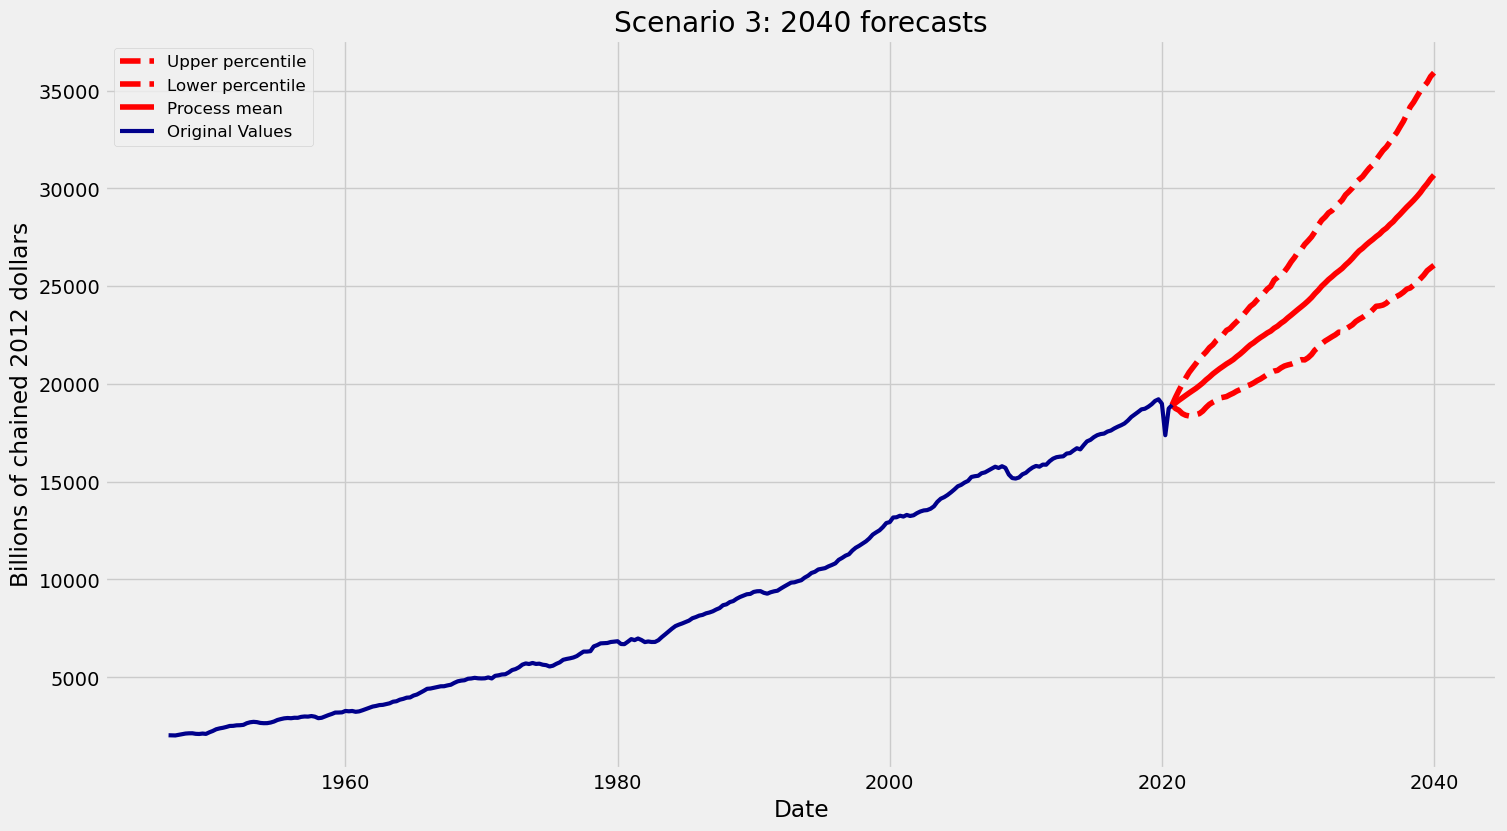

In [132]:
plt.subplots(figsize=(16, 9))

up_2 = np.exp(percentile_95_22*0.4+percentile_95_2*0.6) #mean
up_2 = price_00 * up_2

down_2 = np.exp(percentile_5_22*0.4+percentile_5_2*0.6) #mean
down_2 = price_00 * down_2

mean_p_2 = np.exp(mean_22*0.4+mean_2*0.6) #mean
mean_p_2 = price_00 * mean_p_2

plt.plot(date_index_4, up_2, label='Upper percentile', color='red', linestyle='dashed')
plt.plot(date_index_4, down_2, label='Lower percentile', color='red', linestyle='dashed')
plt.plot(date_index_4, mean_p_2, label='Process mean', color='red')
plt.plot(date_index, list_original_p, label='Original Values', linewidth=3, color='darkblue')
plt.xlabel('Date')
plt.ylabel('Billions of chained 2012 dollars')
plt.title('Scenario 3: 2040 forecasts')
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
plt.legend(fontsize=12)
plt.show()

In [133]:
mean_p_2 #point forecasts

0     18924.262000
1     19029.628986
2     19163.451185
3     19285.335913
4     19412.810505
          ...     
73    29791.739445
74    30032.293411
75    30240.549959
76    30485.642153
77    30682.943254
Length: 78, dtype: float64

Even if the GAN is a powerful tool, it remains a black-box. This lack of interpretability and transparency can be a challenge in certain fields where explanations and insights are necessary. Nevertheless, the GAN and the ARIMA model provide similar results in terms of point forecast. On the other hand, the prediction intervals of the GAN is smaller than that given by its counterpart.

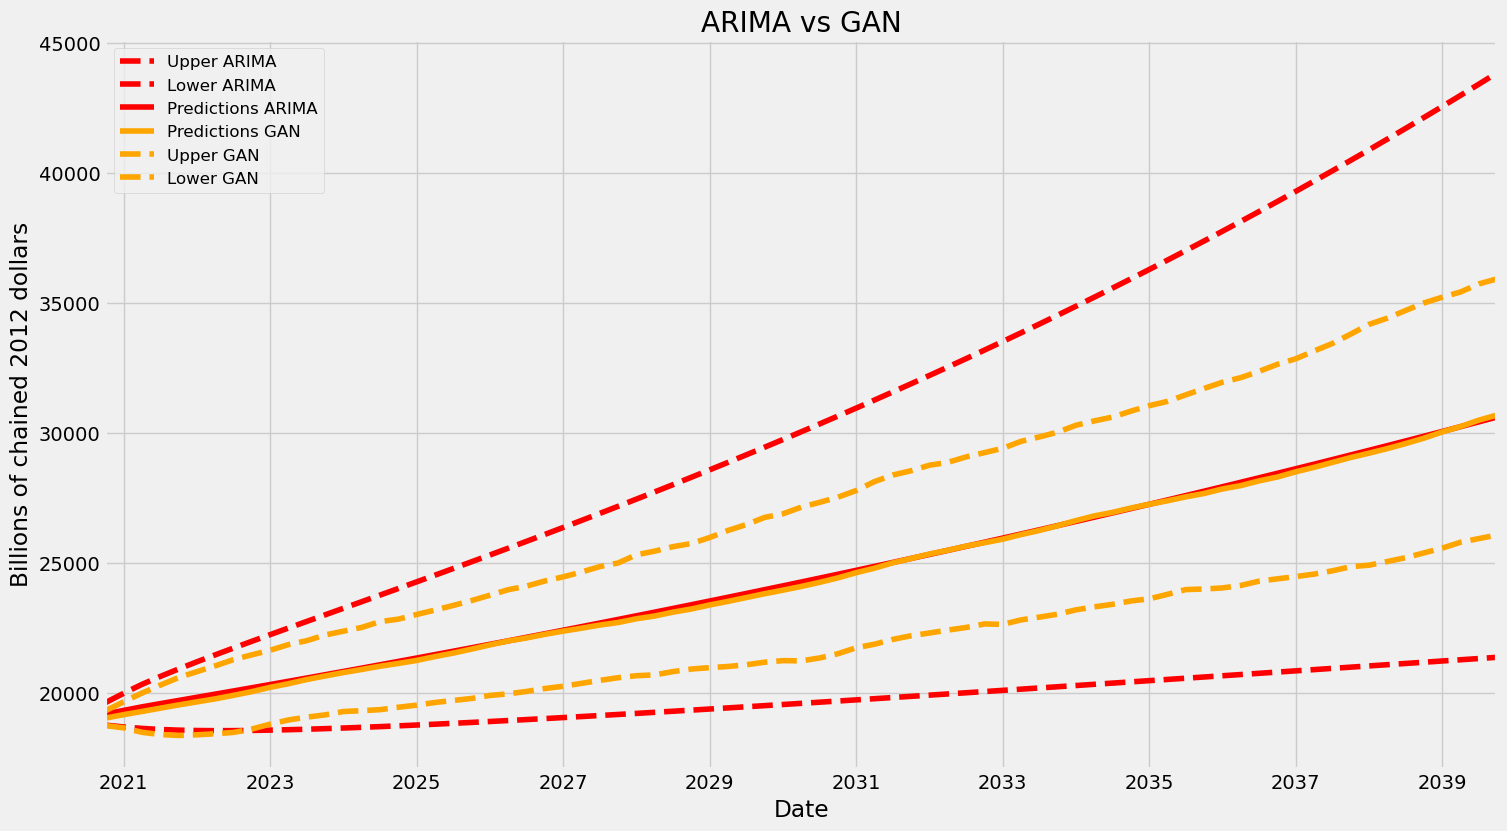

In [134]:
plt.subplots(figsize=(16, 9)) #Comparison between GAN and ARIMA

y_h = result_m.get_forecast(steps=77)
y_h_conf_int = y_h.conf_int(alpha=0.05)
y_h_conf_int.index = date_index_4[1:] #Removing intial point
forecast = y_h.predicted_mean
forecast.index = date_index_4[1:]

up_3 = np.exp(y_h_conf_int['upper Original']-Y_test_2['Original'][0])
up_3 = price_00 * up_3

down_3 = np.exp(y_h_conf_int['lower Original']-Y_test_2['Original'][0])
down_3 = price_00 * down_3

mean_p_3 = np.exp(forecast-Y_test_2['Original'][0])
mean_p_3 = price_00 * mean_p_3

U = up_2
D = down_2
U = U[1:]
D = D[1:]
U.index = y_h_conf_int.index
D.index = y_h_conf_int.index
M = mean_p_2
M = M[1:]
M.index = y_h_conf_int.index
#real = df_TT['Original'][1:] + Y_test_2['Original'][0]
#real.index = y_h_conf_int.index

up_3.plot(color='red', linestyle='dashed', label='Upper ARIMA')
down_3.plot(color='red', linestyle='dashed', label='Lower ARIMA')
mean_p_3.plot(color='red', label='Predictions ARIMA')
#real.plot()
M.plot(color='orange', label='Predictions GAN')
U.plot(color='orange', linestyle='dashed', label='Upper GAN')
D.plot(color='orange', linestyle='dashed', label='Lower GAN')
plt.xlabel('Date')
plt.ylabel('Billions of chained 2012 dollars')
plt.title('ARIMA vs GAN')
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
plt.legend(fontsize=12)
plt.show()

### COVID-19: stress test

Covid-19 pandemic was the worst public health threat since the Spanish flu of the 20th century. It was not only an issue for the healthcare system, but had also relevant economic consequences. So, we test the reliability of the GAN to cover such a dramatic event. In the next, we estimate the GAN considering values between 01-01-2000 until 01-10-2019*.

*Note: A change in the steady state is a long-term process of an economy. Therefore, to short term forecasting we should  consider only the current state.

In [135]:
###Loading the model

#checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir)) #last checkpoint
#ckpt_manager = tf.train.CheckpointManager(checkpoint, checkpoint_dir, max_to_keep=50)
checkpoint_fname = checkpoint_dir + '\ckpt-''WGAN-PAR-R2COVID'
tf.print("-----------Restoring from {}-----------".format(checkpoint_fname))
checkpoint.restore(checkpoint_fname)

-----------Restoring from ./training_checkpoints\ckpt-WGAN-PAR-R2COVID-----------


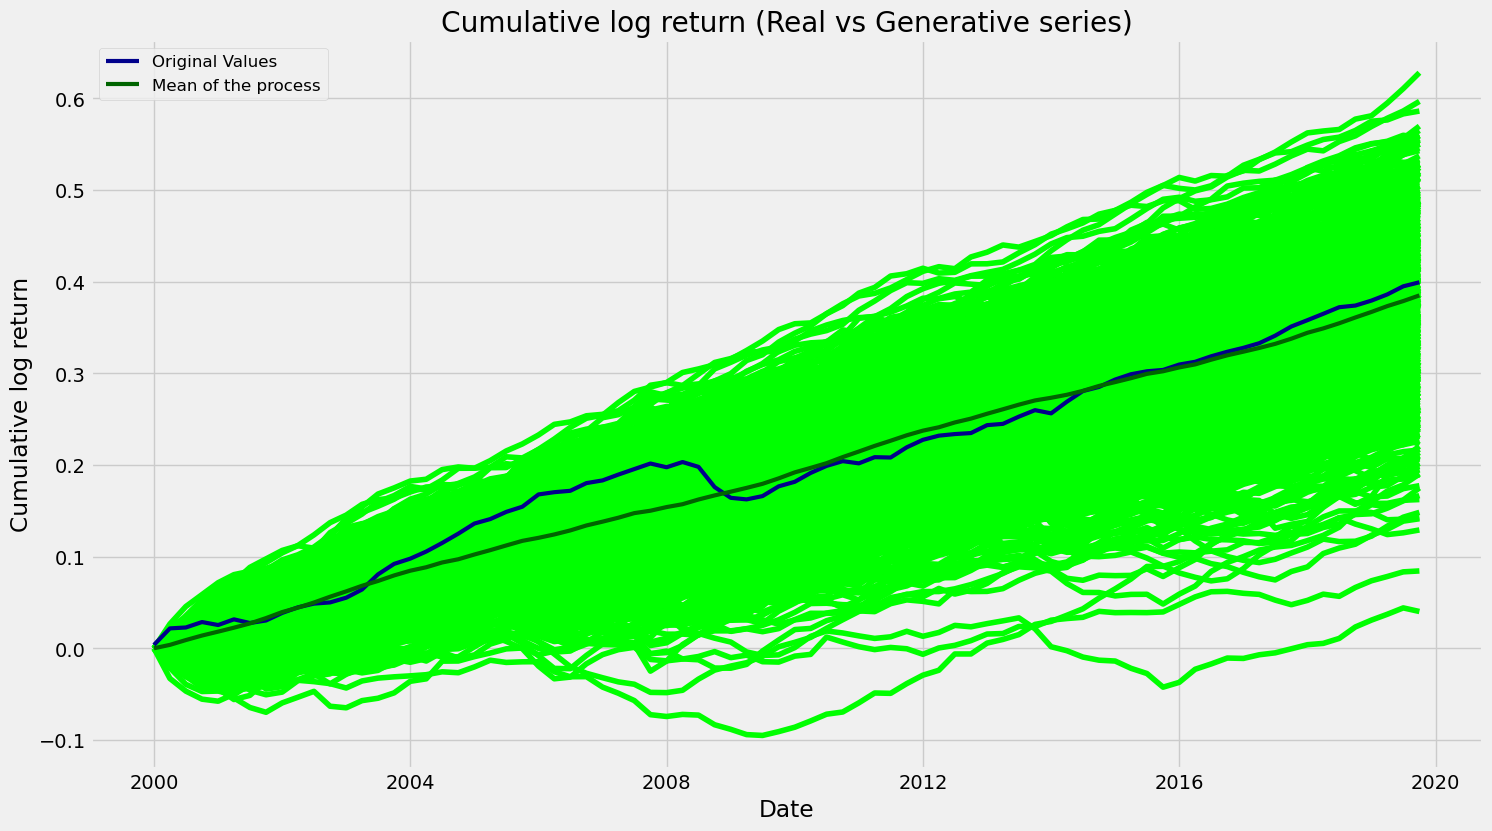

In [136]:
np.random.seed(12)

df_Covid = pd.DataFrame(np.cumsum(list_original[212:292]), columns=['Original']) #new dataset with cumulative log-returns from 2000 to 2019

plt.subplots(figsize=(16, 9))
for i in range(1000):
    noise = np.random.randn(20,100) #20x32x100
    predictions = generator(noise, training=True)
    result = tf.squeeze(predictions) # Given a tensor input, this operation returns a tensor of the same type with all dimensions of size 1 removed.
    temp = (result.numpy())
    generated_data = [item for sublist in temp for item in sublist] # temp is the list getting flattened
    df_generated = pd.DataFrame(generated_data, columns=['Generated Data'])
    df_generated = df_generated[:82] #selected time series
    
    df12 = df_generated.div(100) # divide by 100 to compensate for training input (x100)
    df12.iloc[0, 0] = 0
    df13 = df12.iloc[:,0].tolist()
    df = pd.DataFrame(df13, columns=['logreturns'])
    df["logr_na0"] = df.logreturns.fillna(0)
    df_Covid[f'Cumlog-{i}'] = np.cumsum(df.logr_na0) 
    df['cumlog'] = np.cumsum(df.logr_na0)

    list_generated = df.iloc[:,2].tolist()
    plt.plot(date_index[212:292], df[df.index < len(log_returns[212:292])]['cumlog'], color='lime')

plt.plot(date_index[212:292], np.cumsum(list_original[212:292]), label='Original Values', linewidth=3, color='darkblue')
plt.plot(date_index[212:292], df_Covid.drop(['Original'], axis=1).mean(axis=1), label='Mean of the process', linewidth=3, color='darkgreen')
plt.xlabel('Date')
plt.ylabel('Cumulative log return')
plt.title('Cumulative log return (Real vs Generative series)')
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
plt.legend(fontsize=12)
plt.show()

In [137]:
X_111_2 = df_Covid.drop(['Original'], axis=1) #dataset of Synthetic data form 2000 to 2019
X_111_2 = X_111_2[X_111_2.index<len(date_index_3[291:])]
X_111_2

Cumlog-0  Cumlog-1  Cumlog-2  Cumlog-3  Cumlog-4  Cumlog-5  Cumlog-6  \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.004363  0.012194 -0.015180  0.016634  0.002349 -0.006063  0.000603   
2   0.018550  0.019120 -0.014538  0.027014  0.012124 -0.012491  0.008094   
3   0.030250  0.026986 -0.014117  0.032384  0.015443 -0.013119  0.016903   
4   0.043970  0.030949 -0.002431  0.030949  0.021718 -0.011182  0.027949   
5   0.057075  0.040482  0.009943  0.033953  0.038413 -0.008424  0.030188   
6   0.064467  0.047018  0.022861  0.032793  0.044232  0.000324  0.039046   
7   0.079304  0.057539  0.035059  0.034921  0.043305  0.012976  0.031940   
8   0.083497  0.058473  0.043068  0.040302  0.056327  0.021247  0.040349   
9   0.090738  0.063754  0.054689  0.045526  0.055327  0.023701  0.040622   
10  0.094527  0.073004  0.057090  0.052267  0.056196  0.019614  0.038342   
11  0.099050  0.082864  0.060094  0.054641  0.065625  0.025426  0.045726   
12  0.112295  0.088629  0.063187  0.067866  0.077834  0.024008  0.051013   

    Cumlog-7  Cumlog-8  Cumlog-9  ...  Cumlog-990  Cumlog-991  Cumlog-992  \
0   0.000000  0.000000  0.000000  ...    0.000000    0.000000    0.000000   
1  -0.000414  0.003826 -0.002427  ...    0.014810    0.003264    0.008404   
2   0.002138  0.008897  0.012930  ...    0.034101    0.006527    0.011730   
3   0.006298  0.014075  0.018620  ...    0.042293    0.010531    0.019782   
4   0.002507  0.020983  0.026264  ...    0.044936    0.014791    0.028202   
5   0.007597  0.026179  0.034257  ...    0.058227    0.019426    0.035881   
6   0.010992  0.035537  0.035981  ...    0.061716    0.021826    0.033430   
7   0.021453  0.041154  0.038922  ...    0.064416    0.028127    0.041770   
8   0.029397  0.045504  0.045508  ...    0.074471    0.028723    0.046533   
9   0.033948  0.053343  0.051580  ...    0.077052    0.035549    0.053236   
10  0.035683  0.056423  0.056734  ...    0.083703    0.036485    0.053747   
11  0.045133  0.064898  0.065273  ...    0.097713    0.044584    0.054883   
12  0.048470  0.065313  0.078720  ...    0.109261    0.051196    0.061421   

    Cumlog-993  Cumlog-994  Cumlog-995  Cumlog-996  Cumlog-997  Cumlog-998  \
0     0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
1     0.007617    0.006406    0.014863    0.006088    0.002071    0.010616   
2     0.016206    0.016598    0.028447    0.017225    0.002064    0.023382   
3     0.027671    0.024554    0.043610    0.019915    0.010728    0.031894   
4     0.039416    0.034652    0.054460    0.026127    0.015220    0.043469   
5     0.049509    0.042219    0.063415    0.030889    0.025862    0.053583   
6     0.064411    0.040746    0.067102    0.028175    0.034233    0.058421   
7     0.076116    0.042021    0.067603    0.031712    0.044555    0.067528   
8     0.077409    0.048548    0.074575    0.035759    0.051106    0.073889   
9     0.083442    0.057915    0.085284    0.034793    0.053622    0.081442   
10    0.087860    0.061886    0.095018    0.035414    0.052057    0.088679   
11    0.107404    0.079574    0.103652    0.054770    0.060204    0.100819   
12    0.098719    0.097174    0.109441    0.070938    0.062279    0.114447   

    Cumlog-999  
0     0.000000  
1     0.006697  
2     0.018195  
3     0.019918  
4     0.023764  
5     0.028079  
6     0.027560  
7     0.024678  
8     0.028400  
9     0.032122  
10    0.035944  
11    0.040598  
12    0.044334  

[13 rows x 1000 columns]

In [138]:
percentile_5_2c, percentile_95_2c, mean_2c = X_111_2.apply(lambda x: np.percentile(x, 2.5), axis=1), X_111_2.apply(lambda x: np.percentile(x, 97.5), axis=1), X_111_2.mean(axis=1)
#mean and 95% CI

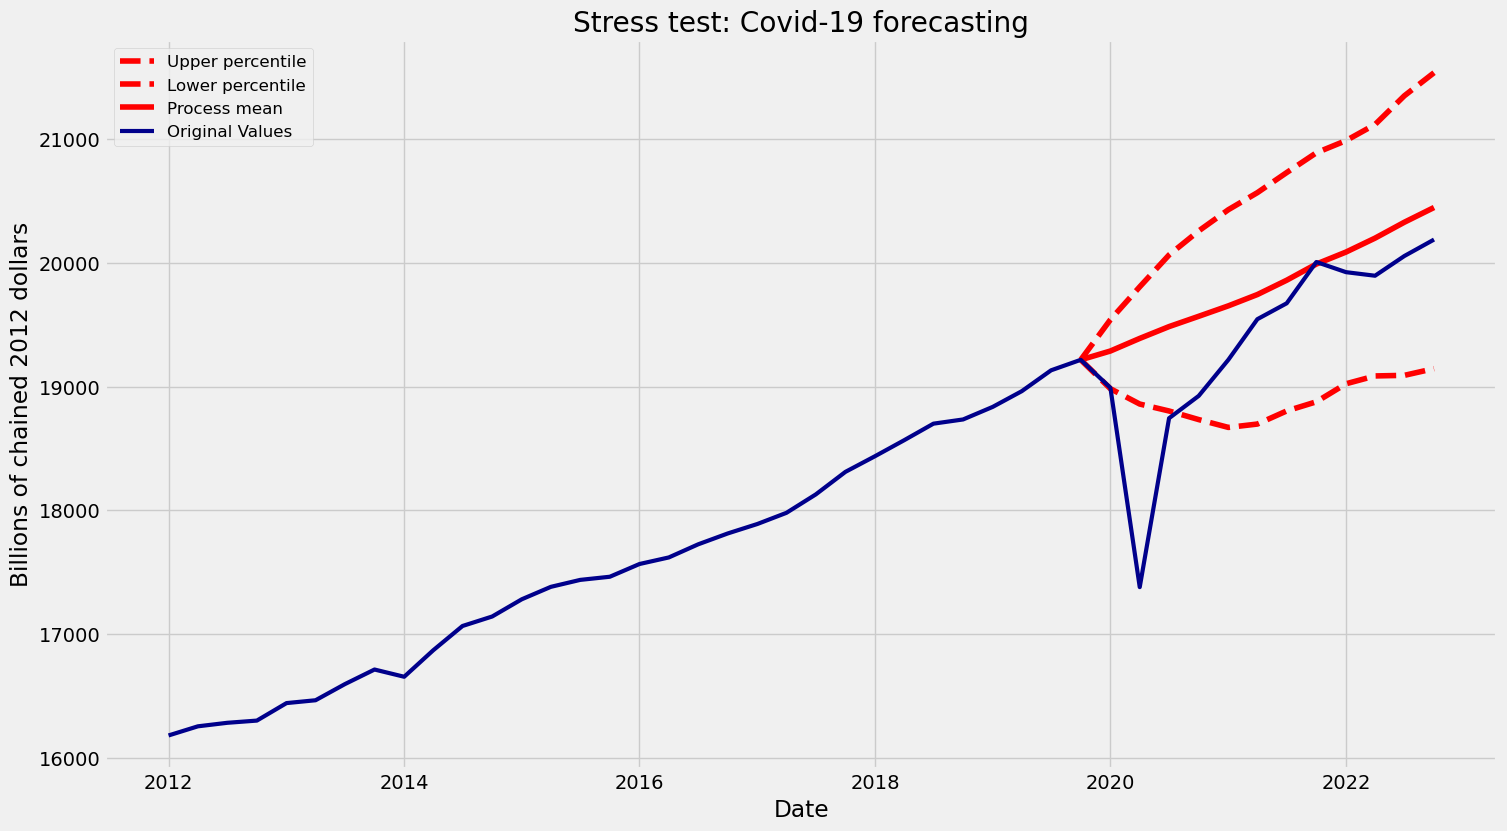

In [139]:
plt.subplots(figsize=(16, 9))

up_2c = np.exp(percentile_95_2c)
up_2c = list_original_p[291] * up_2c

down_2c = np.exp(percentile_5_2c)
down_2c = list_original_p[291] * down_2c

mean_p_2c = np.exp(mean_2c)
mean_p_2c = list_original_p[291] * mean_p_2c

plt.plot(date_index_3[291:], up_2c, label='Upper percentile', color='red', linestyle='dashed')
plt.plot(date_index_3[291:], down_2c, label='Lower percentile', color='red', linestyle='dashed')
plt.plot(date_index_3[291:], mean_p_2c, label='Process mean', color='red')
plt.plot(date_index_3[260:], list_original_p3[260:312], label='Original Values', linewidth=3, color='darkblue')
plt.xlabel('Date')
plt.ylabel('Billions of chained 2012 dollars')
plt.title('Stress test: Covid-19 forecasting')
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
plt.legend(fontsize=12)
plt.show()

As reported above, the proposed approach fails to fully capture the economic effects of Covid-19. Nevertheless, after the deepest peak, the time series returns inside the prediction intervals. 

### 1981-82 crisis: stress test

In [140]:
data_1979 = rolling_window(np.asarray(log_returns[:134]))
train_data_1979 = np.stack(data_1979, axis=0)

BUFFER_SIZE = len(log_returns[:134]) #lenght of timeseries

# Convert to tensor
train_data_1979 = tf.convert_to_tensor(train_data_1979, np.float32)
train_dataset_1979 = tf.data.Dataset.from_tensor_slices(train_data_1979).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [141]:
log_returns[:134]

ret
DATE                
1947-01-01  0.000000
1947-04-01 -0.267062
1947-07-01 -0.206717
1947-10-01  1.552168
1948-01-01  1.492999
...              ...
1979-04-01  0.106863
1979-07-01  0.740126
1979-10-01  0.249763
1980-01-01  0.314025
1980-04-01 -2.081996

[134 rows x 1 columns]

In [142]:
###Load the model below. Too time to run.

#Input for the generator: some random noise, called latent data 
#EPOCHS = 1000
#num_examples_to_generate = 16 # maximum value due to plotting 
#seed = tf.random.normal([num_examples_to_generate, noise_dim])
#disc_n = 5

#test = [[plot_hist, seed]]

#G_loss = []; D_loss = []; D_loss_0 = []

#train(train_dataset_1979, test, EPOCHS, choice, disc_n)

#dict = {'Loss_G': G_loss, 'Loss_D': D_loss, 'Loss_D_0': D_loss_0}  
       
#df = pd.DataFrame(dict) 
    
# saving the dataframe 
#df.to_csv('Loss.csv') 

In [143]:
###Loading the model

#checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir)) #last checkpoint
#ckpt_manager = tf.train.CheckpointManager(checkpoint, checkpoint_dir, max_to_keep=50)
checkpoint_fname = checkpoint_dir + '\ckpt-''WGAN-PAR-1979'
tf.print("-----------Restoring from {}-----------".format(checkpoint_fname))
checkpoint.restore(checkpoint_fname)

-----------Restoring from ./training_checkpoints\ckpt-WGAN-PAR-1979-----------


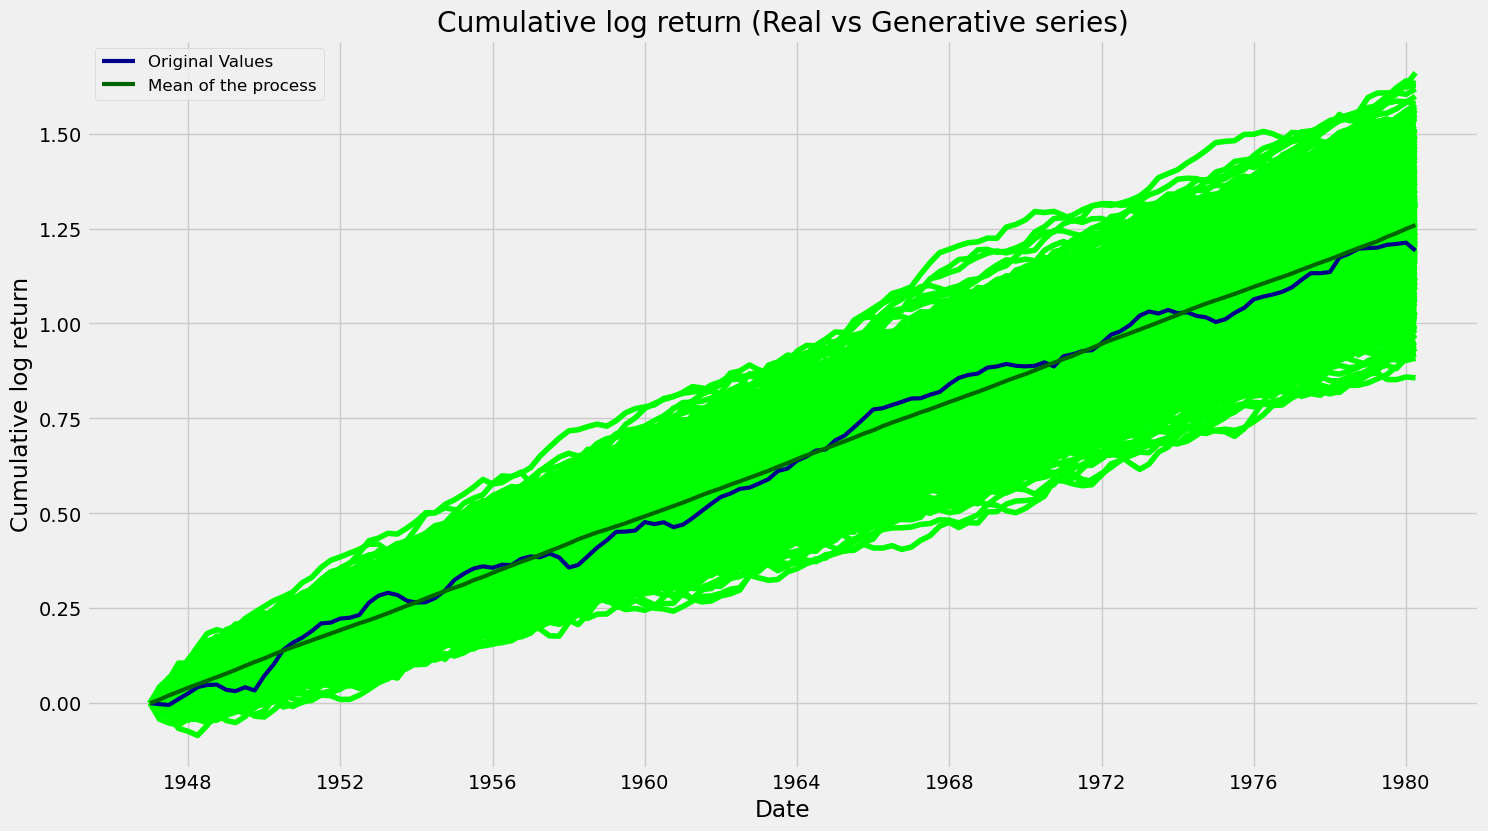

In [144]:
np.random.seed(12)

df_1979 = pd.DataFrame(np.cumsum(list_original[:134]), columns=['Original']) #new dataset with cumulative log-returns from 2000 to 2019

plt.subplots(figsize=(16, 9))
for i in range(1000):
    noise = np.random.randn(20,100) #20x32x100
    predictions = generator(noise, training=True)
    result = tf.squeeze(predictions) # Given a tensor input, this operation returns a tensor of the same type with all dimensions of size 1 removed.
    temp = (result.numpy())
    generated_data = [item for sublist in temp for item in sublist] # temp is the list getting flattened
    df_generated = pd.DataFrame(generated_data, columns=['Generated Data'])
    df_generated = df_generated[:134] #selected time series
    
    df12 = df_generated.div(100) # divide by 100 to compensate for training input (x100)
    df12.iloc[0, 0] = 0
    df13 = df12.iloc[:,0].tolist()
    df = pd.DataFrame(df13, columns=['logreturns'])
    df["logr_na0"] = df.logreturns.fillna(0)
    df_1979[f'Cumlog-{i}'] = np.cumsum(df.logr_na0) 
    df['cumlog'] = np.cumsum(df.logr_na0)

    list_generated = df.iloc[:,2].tolist()
    plt.plot(date_index[:134], df[df.index < len(log_returns[:134])]['cumlog'], color='lime')

plt.plot(date_index[:134], np.cumsum(list_original[:134]), label='Original Values', linewidth=3, color='darkblue')
plt.plot(date_index[:134], df_1979.drop(['Original'], axis=1).mean(axis=1), label='Mean of the process', linewidth=3, color='darkgreen')
plt.xlabel('Date')
plt.ylabel('Cumulative log return')
plt.title('Cumulative log return (Real vs Generative series)')
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
plt.legend(fontsize=12)
plt.show()

In [145]:
X_1979 = df_1979.drop(['Original'], axis=1) #dataset of Synthetic data form 2000 to 2019
X_1979 = X_1979[X_1979.index<len(date_index_3[133:150])]
X_1979

Cumlog-0  Cumlog-1  Cumlog-2  Cumlog-3  Cumlog-4  Cumlog-5  Cumlog-6  \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.019220  0.014385  0.027012 -0.003178  0.006234 -0.022992 -0.003986   
2   0.015152  0.033204  0.034910  0.001382  0.002542 -0.027501 -0.004301   
3   0.044270  0.051664  0.060382 -0.005828  0.009100 -0.013787 -0.004644   
4   0.052834  0.063153  0.076684  0.000387  0.003287  0.034159  0.014889   
5   0.049673  0.064634  0.115027  0.004221 -0.009210  0.060322  0.026481   
6   0.046483  0.073797  0.135428  0.026033  0.001590  0.082728  0.063083   
7   0.065269  0.077733  0.149002  0.040983  0.012585  0.092509  0.095097   
8   0.079096  0.094822  0.151606  0.058514  0.029517  0.090968  0.102119   
9   0.091461  0.106628  0.159638  0.083993  0.047751  0.087455  0.129898   
10  0.119799  0.124225  0.155708  0.111756  0.057284  0.081330  0.132830   
11  0.133825  0.146260  0.161043  0.124713  0.065840  0.079506  0.138835   
12  0.153610  0.157113  0.176945  0.145705  0.075949  0.103858  0.149521   
13  0.165212  0.166259  0.194799  0.151593  0.084416  0.135238  0.150212   
14  0.177583  0.182731  0.209282  0.156931  0.087927  0.147655  0.149823   
15  0.195141  0.183678  0.216483  0.159412  0.098130  0.173110  0.151674   
16  0.209432  0.194521  0.219752  0.166194  0.109048  0.162272  0.159617   

    Cumlog-7  Cumlog-8  Cumlog-9  ...  Cumlog-990  Cumlog-991  Cumlog-992  \
0   0.000000  0.000000  0.000000  ...    0.000000    0.000000    0.000000   
1  -0.000745  0.007224  0.014870  ...    0.014509    0.012101    0.020638   
2   0.020915  0.030340  0.037192  ...    0.040211    0.016945    0.033346   
3   0.019563  0.027817  0.051764  ...    0.050719    0.014970    0.038965   
4   0.035330  0.011908  0.051846  ...    0.055425    0.035619    0.062309   
5   0.053485  0.023722  0.071224  ...    0.059524    0.041892    0.070832   
6   0.074594  0.032909  0.095746  ...    0.060970    0.060340    0.058383   
7   0.100697  0.055616  0.099489  ...    0.047289    0.075535    0.071521   
8   0.116289  0.077018  0.101224  ...    0.050100    0.080184    0.084601   
9   0.119381  0.102348  0.120390  ...    0.050761    0.085550    0.115248   
10  0.140197  0.121137  0.130531  ...    0.054884    0.088478    0.137748   
11  0.141693  0.120235  0.124109  ...    0.050193    0.102132    0.162114   
12  0.153428  0.120435  0.119296  ...    0.057264    0.105494    0.181710   
13  0.153446  0.128970  0.111766  ...    0.061282    0.110114    0.196873   
14  0.165396  0.129524  0.117445  ...    0.057463    0.121267    0.209025   
15  0.180295  0.139475  0.105210  ...    0.062533    0.134594    0.216633   
16  0.177910  0.142813  0.120340  ...    0.080847    0.133679    0.228196   

    Cumlog-993  Cumlog-994  Cumlog-995  Cumlog-996  Cumlog-997  Cumlog-998  \
0     0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
1     0.028791   -0.001465   -0.005941    0.013930    0.006620    0.015124   
2     0.057062    0.030984   -0.008539    0.031751    0.023394    0.030052   
3     0.084891    0.029474   -0.003711    0.036141    0.068910    0.056762   
4     0.109510    0.028643   -0.002857    0.041052    0.090805    0.073712   
5     0.132612    0.028833    0.014182    0.056933    0.103698    0.092513   
6     0.141453    0.046630    0.020505    0.059581    0.111271    0.094006   
7     0.141154    0.051291    0.054026    0.061482    0.105372    0.103633   
8     0.150539    0.057933    0.058486    0.066259    0.091738    0.118722   
9     0.164895    0.074217    0.068575    0.089041    0.061782    0.137102   
10    0.179898    0.089483    0.094009    0.116773    0.033495    0.146534   
11    0.218592    0.093437    0.118148    0.133150    0.027594    0.155709   
12    0.226471    0.097215    0.118379    0.139392    0.033865    0.159248   
13    0.235006    0.094580    0.131200    0.145973    0.073253    0.142058   
14    0.253802    0.102081    0.125433    0.151732    0.106734    0.121527   


In [146]:
percentile_5_1979, percentile_95_1979, mean_1979 = X_1979.apply(lambda x: np.percentile(x, 2.5), axis=1), X_1979.apply(lambda x: np.percentile(x, 97.5), axis=1), X_1979.mean(axis=1)
#mean and 95% CI

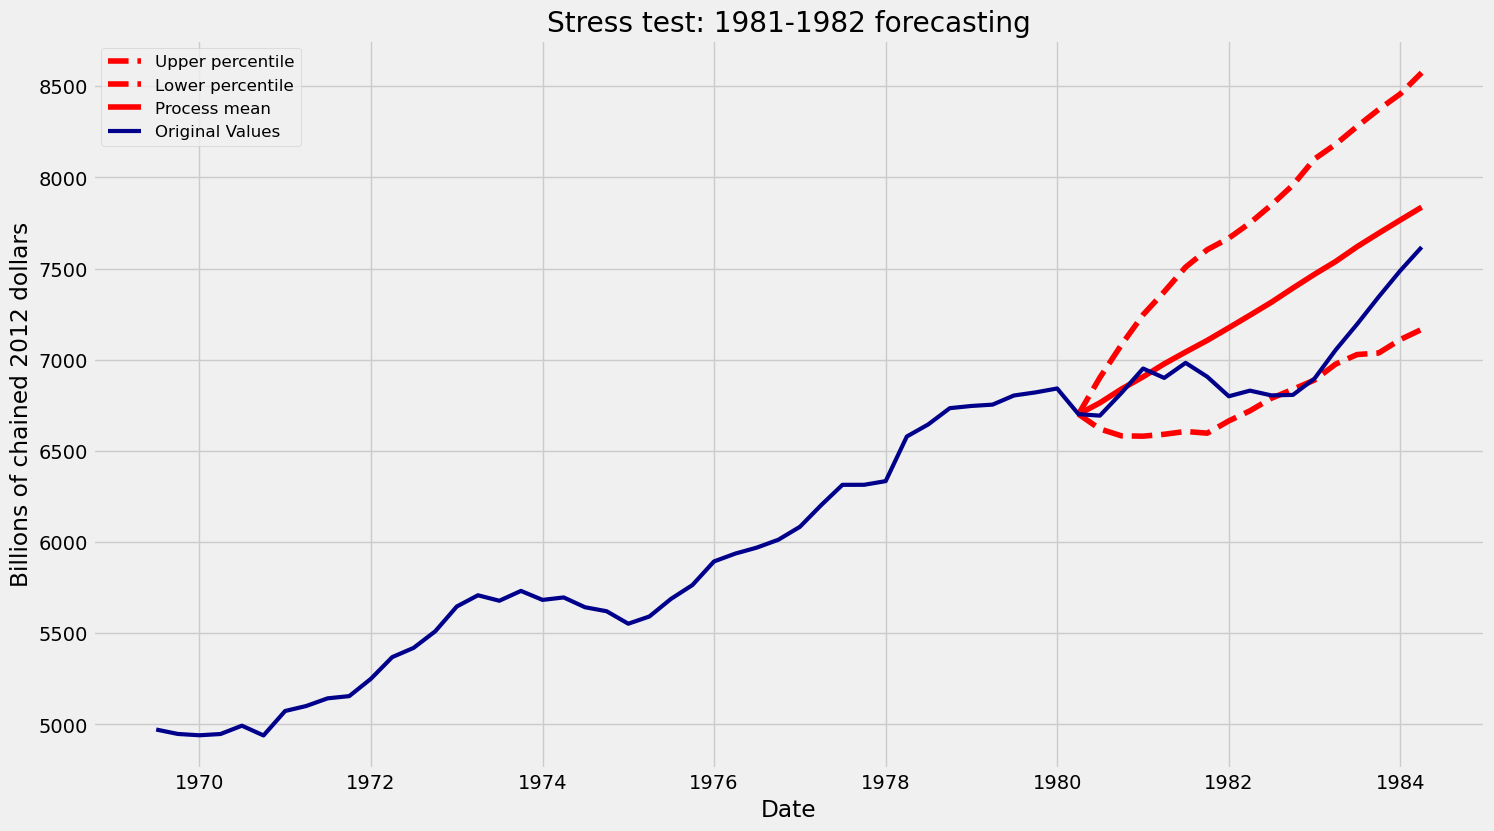

In [147]:
plt.subplots(figsize=(16, 9))

up_1979 = np.exp(percentile_95_1979)
up_1979 = list_original_p[133] * up_1979

down_1979 = np.exp(percentile_5_1979)
down_1979 = list_original_p[133] * down_1979

mean_p_1979 = np.exp(mean_1979)
mean_p_1979 = list_original_p[133] * mean_p_1979

plt.plot(date_index_3[133:150], up_1979, label='Upper percentile', color='red', linestyle='dashed')
plt.plot(date_index_3[133:150], down_1979, label='Lower percentile', color='red', linestyle='dashed')
plt.plot(date_index_3[133:150], mean_p_1979, label='Process mean', color='red')
plt.plot(date_index_3[90:150], list_original_p3[90:150], label='Original Values', linewidth=3, color='darkblue')
plt.xlabel('Date')
plt.ylabel('Billions of chained 2012 dollars')
plt.title('Stress test: 1981-1982 forecasting')
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
plt.legend(fontsize=12)
plt.show()

## GAN and prediction errors

In the previous section, we assumed the worst scenario; that is, the nonexistence of an adequate model to predict future GDP values. In this case, the GAN was used not only to obtain prediction intervals but also point forecasting estimations. Now, we relax this assumption, and we imagine having a well-established model to perform GDP predictions. However, a perfect model does not exist. So, the underlying distribution of prediction errors may be helpful to build prediction intervals. Using a relatively small sample (128 observations), we will see how the GAN may be an useful tool to obtain this distribution. 

### Normal Errors

The model is assumed to be almost perfect, but with some mistakes in the predictions. The main problem is that the distribution of these errors is unknown, which is a normal distribution with variance equal to 0.004. Using the GAN, we are able to obtain an appropriate representation of the underlying distribution of the prediction errors*.

*Note: for computational reasons the CNN-WGAN-GP archetype is adopted to perform this task.

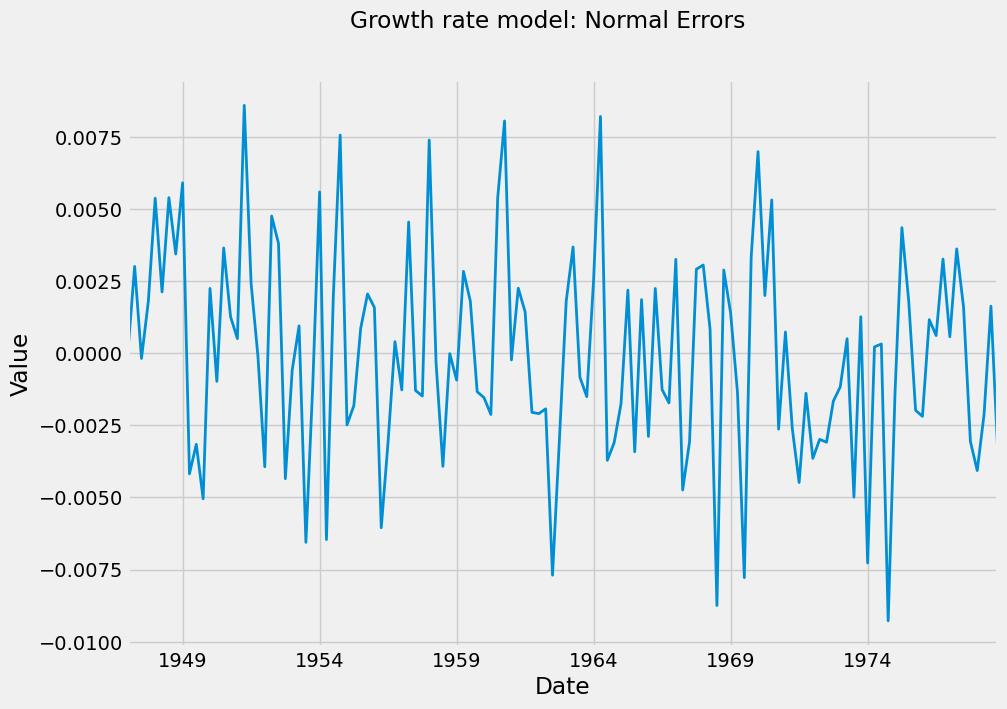

In [148]:
np.random.seed(13)

errors = np.random.normal(loc=0.0, scale=0.004, size=128) #sample from normal distribution
errors[0] = 0

known_data = pd.DataFrame(log_returns.div(100).iloc[:,0].tolist(), columns=['Original'])[:128]
known_data.index = date_index[0:128]
known_data['Predictions'] = known_data['Original']+errors
known_data['Errors'] = errors

f, ax = plt.subplots(1)
f.set_figheight(7)
f.set_figwidth(10)
_ = known_data['Errors'].plot(ax=ax,
                                              style=['-','-'], linewidth=2)
plot = plt.suptitle('Growth rate model: Normal Errors')
plot = plt.xlabel('Date')
plot = plt.ylabel('Value')

Text(0.5, 1.0, 'Empirical distribution')

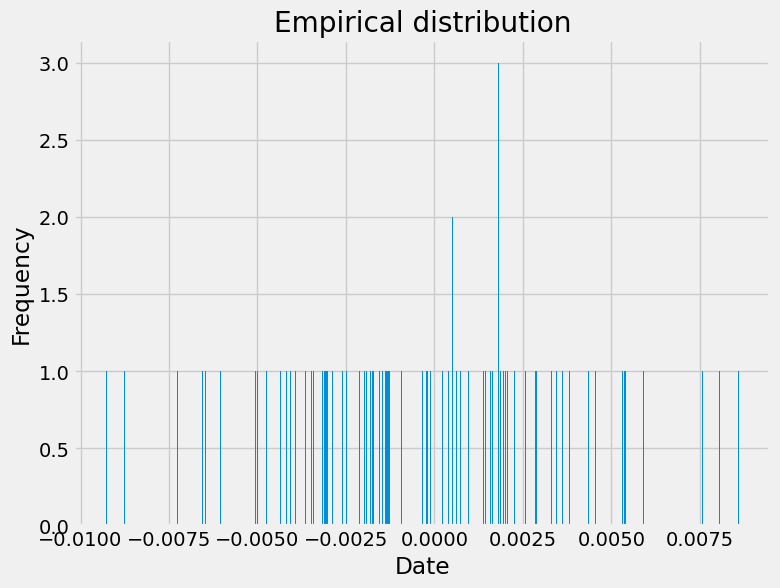

In [149]:
plt.subplots(figsize=(8,6))
known_data['Errors'].plot(kind='hist', bins=1000)
plt.xlabel('Date')
plt.title('Empirical distribution')
#np.mean(known_data['Errors'])

In [150]:
data_3 = rolling_window(np.asarray(pd.DataFrame(known_data['Errors']*100)))
train_data_3 = np.stack(data_3, axis=0)

BUFFER_SIZE = len(known_data['Errors']) #lenght of timeseries

# Convert to tensor
train_data_3 = tf.convert_to_tensor(train_data_3, np.float32)
train_dataset_3 = tf.data.Dataset.from_tensor_slices(train_data_3).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [151]:
#known_data['Errors']*100

In [152]:
###Load the model below. Too time to run.

#Input for the generator: some random noise, called latent data 
#EPOCHS = 1000
#num_examples_to_generate = 16 # maximum value due to plotting 
#seed = tf.random.normal([num_examples_to_generate, noise_dim])
#disc_n = 5

#test = [[plot_hist, seed]]

#G_loss = []; D_loss = []; D_loss_0 = []

#train(train_dataset_3, test, EPOCHS, choice, disc_n)

#dict = {'Loss_G': G_loss, 'Loss_D': D_loss, 'Loss_D_0': D_loss_0}  
       
#df = pd.DataFrame(dict) 
    
# saving the dataframe 
#df.to_csv('Loss.csv') 

In [153]:
###Specification of the model

choice = 'wgan_M2'
generator = make_generator_model(choice)
discriminator = make_discriminator_model(choice)

checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                  discriminator_optimizer=discriminator_optimizer,
                                  generator=generator,
                                  discriminator=discriminator)

In [154]:
###Loading the model

#checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir)) #last checkpoint
#ckpt_manager = tf.train.CheckpointManager(checkpoint, checkpoint_dir, max_to_keep=50)
checkpoint_fname = checkpoint_dir + '\ckpt-''Residuals'
tf.print("-----------Restoring from {}-----------".format(checkpoint_fname))
checkpoint.restore(checkpoint_fname)

-----------Restoring from ./training_checkpoints\ckpt-Residuals-----------


In [155]:
np.random.seed(13)

df_R = pd.DataFrame(errors.tolist(), columns=['Original']) #dataset of the normal residuals
for i in range(1000):
    noise = np.random.randn(4,100)
    predictions = generator(noise, training=True) # training true or false
    result = tf.squeeze(predictions) # Given a tensor input, this operation returns a tensor of the same type with all dimensions of size 1 removed.
    temp = (result.numpy())
    generated_data = [item for sublist in temp for item in sublist] # temp is the list getting flattened
    df_generated = pd.DataFrame(generated_data, columns=['Generated Data'])
    df_generated = df_generated
    
    df12 = df_generated.div(100) # divide by 100 to compensate for training input (x100)
    #df12.iloc[0, 0] = 0
    df13 = df12.iloc[:,0].tolist()
    df = pd.DataFrame(df13, columns = ['logreturns'])
    df_R[f'Errors-{i}'] = df.logreturns.fillna(0)
    
Z_R = df_R.drop(['Original'], axis=1) #generated log-return

In [156]:
Z_R

Errors-0  Errors-1  Errors-2  Errors-3  Errors-4  Errors-5  Errors-6  \
0    0.003480  0.002930  0.004925  0.003010  0.002027  0.004457  0.004564   
1   -0.001171 -0.000121 -0.002070 -0.003352  0.002781  0.002494 -0.003975   
2   -0.005371 -0.004074 -0.004037 -0.009129 -0.007722 -0.006955 -0.010166   
3   -0.001899 -0.001660 -0.006931 -0.003372 -0.005125 -0.004246 -0.005504   
4    0.003108 -0.002689  0.006604  0.010646  0.003607  0.007324  0.009117   
..        ...       ...       ...       ...       ...       ...       ...   
123 -0.001501  0.006120  0.007740  0.003070  0.001883  0.007415 -0.000377   
124  0.000706 -0.002700 -0.004212 -0.003002  0.005606 -0.001433 -0.004965   
125 -0.000437  0.002039  0.003283  0.001331 -0.002014  0.009382 -0.004541   
126  0.000196 -0.001040 -0.003334 -0.004000 -0.002970 -0.005951 -0.000228   
127 -0.001402  0.001761 -0.002275  0.002575  0.002955 -0.000787  0.002224   

     Errors-7  Errors-8  Errors-9  ...  Errors-990  Errors-991  Errors-992  \
0    0.004469  0.003645  0.005001  ...    0.003767    0.004747    0.003668   
1    0.000068 -0.003333 -0.004787  ...   -0.000840    0.002437   -0.002846   
2   -0.004638 -0.005335 -0.008462  ...   -0.005744   -0.005250   -0.009017   
3   -0.007736 -0.004205 -0.001178  ...   -0.003210   -0.004481   -0.003181   
4    0.004221 -0.000365  0.005694  ...    0.003213   -0.000885    0.005664   
..        ...       ...       ...  ...         ...         ...         ...   
123  0.000791  0.005515 -0.005609  ...    0.006419   -0.000493    0.008159   
124 -0.002545  0.000067  0.001168  ...    0.001070    0.001328    0.008683   
125  0.006059 -0.000587  0.003139  ...   -0.002094    0.000162   -0.001087   
126 -0.004535 -0.000862  0.000613  ...    0.001709   -0.000472   -0.005033   
127 -0.002571 -0.005820  0.001541  ...   -0.003246   -0.000091   -0.002008   

     Errors-993  Errors-994  Errors-995  Errors-996  Errors-997  Errors-998  \
0      0.004412    0.004817    0.003562    0.005801    0.007228    0.004963   
1      0.000359    0.000058   -0.001905   -0.001540   -0.001757    0.000483   
2     -0.005492   -0.003321   -0.007602   -0.008616   -0.006986   -0.008973   
3     -0.002743   -0.005265   -0.004603   -0.007973   -0.008955   -0.002943   
4      0.003038   -0.007494    0.007099    0.007616    0.011040    0.009423   
..          ...         ...         ...         ...         ...         ...   
123    0.000376    0.005534    0.005950    0.003759    0.000835    0.000673   
124   -0.000446   -0.003647    0.002450    0.004401   -0.000149   -0.003041   
125    0.002083   -0.000046    0.001714   -0.000112    0.001036    0.003075   
126   -0.004316   -0.006174   -0.003773   -0.002572   -0.001203   -0.002086   
127   -0.001067   -0.003233   -0.002835   -0.000711    0.002218   -0.002621   

     Errors-999  
0      0.006491  
1     -0.004300  
2     -0.007332  
3     -0.004106  
4      0.006320  
..          ...  
123    0.002946  
124    0.003159  
125    0.003352  
126   -0.002826  
127    0.001392  

[128 rows x 1000 columns]

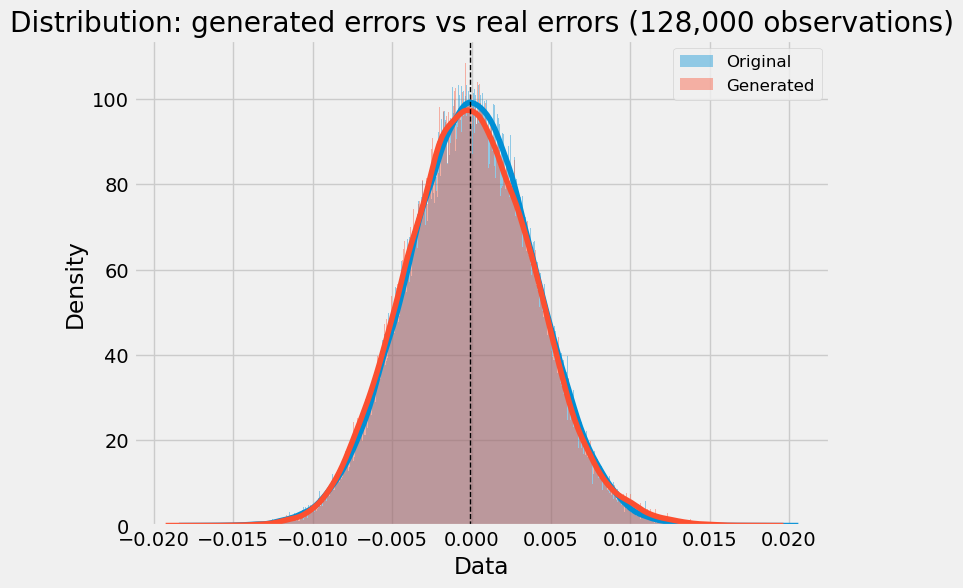

In [157]:
Z_R = pd.DataFrame(pd.Series(Z_R.values.ravel('F')), columns=['Errors']) #flatten all values in one list
errors_2 = np.random.normal(loc=0.0, scale=0.004, size=128000)
#c_r1,c_r2 = np.percentile(Z_R['Errors'], 2.5), np.percentile(Z_R['Errors'], 97.5) #95% prediction intervals

plt.subplots(figsize=(8,6))
sns.distplot(errors_2, hist=True, kde=True, bins=1000, label ='Original')
sns.distplot(Z_R['Errors'], hist=True, kde=True, bins=1000, label='Generated' )
plt.axvline(Z_R['Errors'].mean(), color='k', linestyle='dashed', linewidth=1)
#plt.axvline(c_r1, color='red', linestyle='dashed', linewidth=1)
#plt.axvline(c_r2, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution: generated errors vs real errors (128,000 observations)')
plt.xlabel('Data')
#plt.ylim(0,120)
#df_R = pd.DataFrame(errors.tolist(), columns=['Original'])
#print(c_r1, Z_R['Errors'].mean(), c_r2)
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
plt.legend(fontsize=12)
plt.show()

In the above figure, we compare the probability distribution of a sample from the real error distribution, with that obtained using synthetic time series data*.

*Note: the sample size is equal to 128,000 observations.

In [158]:
pd.DataFrame(errors).describe() #real values based on 128000 sample size for the original distribution
print('Real 95% confidence intervals:{}{}'.format (np.percentile(pd.DataFrame(errors_2), 2.5), np.percentile(pd.DataFrame(errors_2), 97.5)))
print('Real mean{}'.format(np.mean(pd.DataFrame(errors_2))))
print('Real variance{}'.format(np.var(pd.DataFrame(errors_2))))

Real 95% confidence intervals:-0.0078202856877126310.007804069627346434
Real mean0    6.811440e-07
dtype: float64
Real variance0    0.000016
dtype: float64


In [159]:
c_r1,c_r2 = np.percentile(Z_R['Errors'], 2.5), np.percentile(Z_R['Errors'], 97.5) #95% prediction intervals
#Z_R.describe()
print('GAN 95% confidence intervals:{}{}'.format (c_r1,c_r2))
print('GAN mean{}'.format(np.mean(Z_R['Errors'])))
print('GAN variance{}'.format(np.var(Z_R['Errors'])))

GAN 95% confidence intervals:-0.0078072330448776490.008074430492706588
GAN mean-7.695456610197755e-05
GAN variance1.6548137175600833e-05


Bootstrapping is a useful data augmentation technique to deal with imitated amount of data. As outlined in Dahl, et al., (2022), resampling using the GAN outperforms bootstrapping techniques in terms of empirical coverage. Nevertheless, it is important to note that bootstraps* have theoretical justifications and their properties have been theoretically derived. The GAN currently do not have this theoretical reassurance.

*Note: we adopt an independent bootstrap technique because we know that the errors are independent. In the reality, it cannot be the case, requiring dependent bootstraps approaches.

In [160]:
np.random.seed(13)

sample_mean = [] #bootstrap
b_int_5 = []
b_int_95 = []
var = []

for i in range(128000):
    y = random.sample(known_data['Errors'].tolist(), 64)
    avg = np.mean(y)
    percentile_5_b, percentile_95_b = np.percentile(y, 2.5), np.percentile(y, 97.5)
    sd = np.var(y)
    sample_mean.append(avg)
    b_int_5.append(percentile_5_b)
    b_int_95.append(percentile_95_b)
    var.append(sd)

print('Bootstrap 95% confidence intervals:{}{}'.format(np.mean(b_int_5),np.mean(b_int_95)))
print('Bootstrap mean:{}'.format(np.mean(sample_mean)))
print('Bootstrap variance:{}'.format(np.mean(var)))

Bootstrap 95% confidence intervals:-0.0071437441154308150.00715384306023458
Bootstrap mean:-3.920244049277913e-05
Bootstrap variance:1.3135128543177462e-05


A proposed model may be as accurate as possible, but assuming that it is able to automatically update its estimates in case of a change in the steady state is a very strong assumption. Without taking this into account, the magnitude of the errors increase after the break. However, the real distribution of prediction errors is helpful to avoid this scenario giving the opportunity to update our model as soon as possible we are able to identify a remarkable change. Interracial charts can be useful tools to have a first insight.

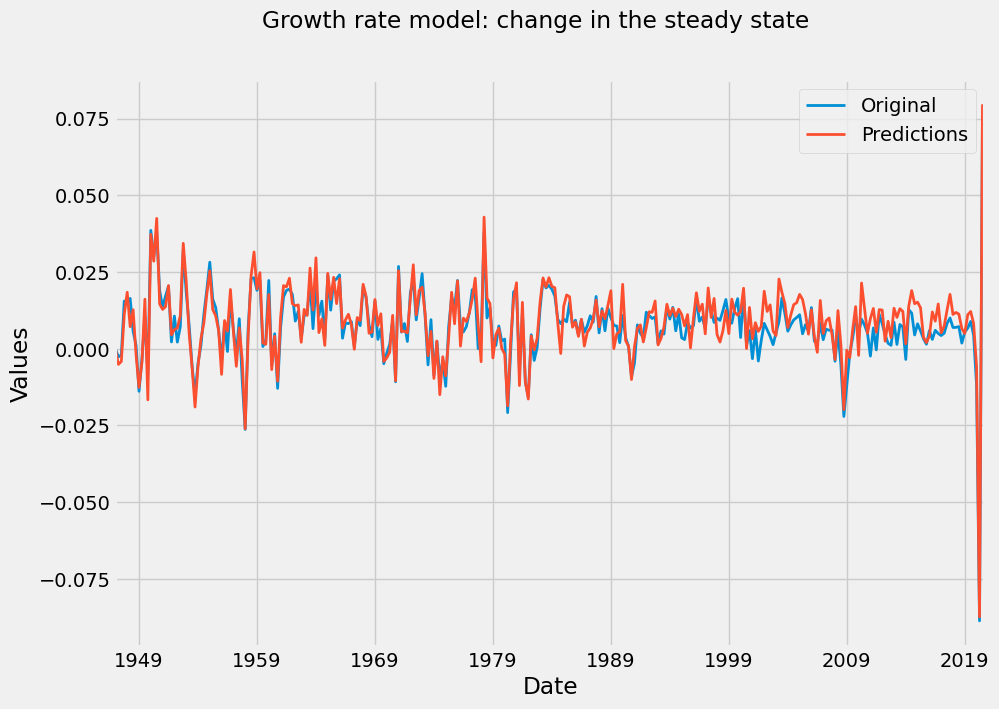

In [161]:
np.random.seed(1)

errors_2 = np.random.normal(loc=0.0, scale=0.004, size=296) #errors for the entire time series
errors_2[0] = 0

New_data = pd.DataFrame(log_returns.div(100).iloc[:,0].tolist(), columns=['Original'])[128:212] #data until 2020
New_data.index = date_index[128:212]
New_data_2 = pd.DataFrame(log_returns.div(100).iloc[:,0].tolist(), columns=['Original'])[212:]
New_data_2['Original'] = (break_data['Mean'][0]-break_data_2['Mean'][0]+New_data_2['Original'])
New_data_2.index = date_index[212:]

Final_data = pd.DataFrame(known_data['Original'].append(New_data['Original']).append(New_data_2['Original']), columns=['Original']) 
Final_data['Predictions'] = Final_data['Original']+errors_2
Final_data['Original'] = log_returns.div(100).iloc[:,0].tolist()
Final_data['Errors'] = Final_data['Original']-Final_data['Predictions'] #final dataset with original values, predicted values and errors

f, ax = plt.subplots(1)
f.set_figheight(7)
f.set_figwidth(10)
_ = Final_data[['Original','Predictions']].plot(ax=ax,
                                              style=['-','-'], linewidth=2)
plot = plt.suptitle('Growth rate model: change in the steady state')
plot = plt.xlabel('Date')
plot = plt.ylabel('Values')

In [162]:
###interactive graph with a window distribution equal to 80 observations

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    html.H4('Interactive Error distribution'),
    dcc.Graph(id="graph"),
    html.P("Time:"),
    dcc.Slider(id="Time", min=80, max=295, value=0, 
               marks={80: '1967-01-01', 212:'2000-01-01', 295: '2020-10-01'}),
])

@app.callback(
    Output("graph", "figure"), 
    Input("Time", "value"))

def display_color(Time):
    data = Final_data['Errors'][Time-80:Time] #replace with your own data source
    fig = px.histogram(data, marginal="violin", range_x=[-0.03, 0.03], labels={
                     "value": "Values",
                     "Variable": "Errors" })
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

Dash app running on http://127.0.0.1:8050/


Under a cost-sensitive adaptation prospective, we will use synthetic data and quality control charts to have better insights on when update our forecasting model. Individuals chart plots are graphs used in statistical process control to assess the randomness of process variation. They are commonly used in quality control to monitor the characteristics of a single process or variable over time. An individuals chart plot displays an ordered list of measurements along the vertical axis against time or sequence on the horizontal axis. The plot shows the natural variability of the process and identifies potential problems or out-of-control conditions. The chart also helps identify trends or changes in the process performance over time, allowing for early corrective action or process improvement. Three standard deviation is a measure of variability that indicates how spread out a set of values or data points is from the mean or average. It is often used as a benchmark to determine outliers or unusual data points. 

Thus, using three standard deviations to calculate both the upper and the lower limit two types of individuals chart are reported below. We use the distribution obtained by the GAN to identify changes in the process performance over time. The first plot considers single observed errors as controlled variable, while the second one considers cumulative errors*.

*Note: Under the normality assumption, the sum of i.d.d. normally distributed variables is also normally distributed.

Date 2003-04-01 00:00:00 out of cotrol limits!
Date 2007-01-01 00:00:00 out of control limits!
Date 2007-04-01 00:00:00 out of control limits!
Date 2007-07-01 00:00:00 out of control limits!
Date 2007-10-01 00:00:00 out of control limits!
Date 2008-01-01 00:00:00 out of control limits!
Date 2008-04-01 00:00:00 out of control limits!
Date 2008-07-01 00:00:00 out of control limits!
Date 2008-10-01 00:00:00 out of control limits!
Date 2009-01-01 00:00:00 out of control limits!
Date 2009-04-01 00:00:00 out of control limits!
Date 2009-07-01 00:00:00 out of control limits!
Date 2009-10-01 00:00:00 out of control limits!
Date 2010-01-01 00:00:00 out of control limits!
Date 2010-04-01 00:00:00 out of control limits!
Date 2010-07-01 00:00:00 out of control limits!
Date 2010-10-01 00:00:00 out of control limits!
Date 2011-01-01 00:00:00 out of control limits!
Date 2011-04-01 00:00:00 out of control limits!
Date 2011-07-01 00:00:00 out of control limits!
Date 2011-10-01 00:00:00 out of control l

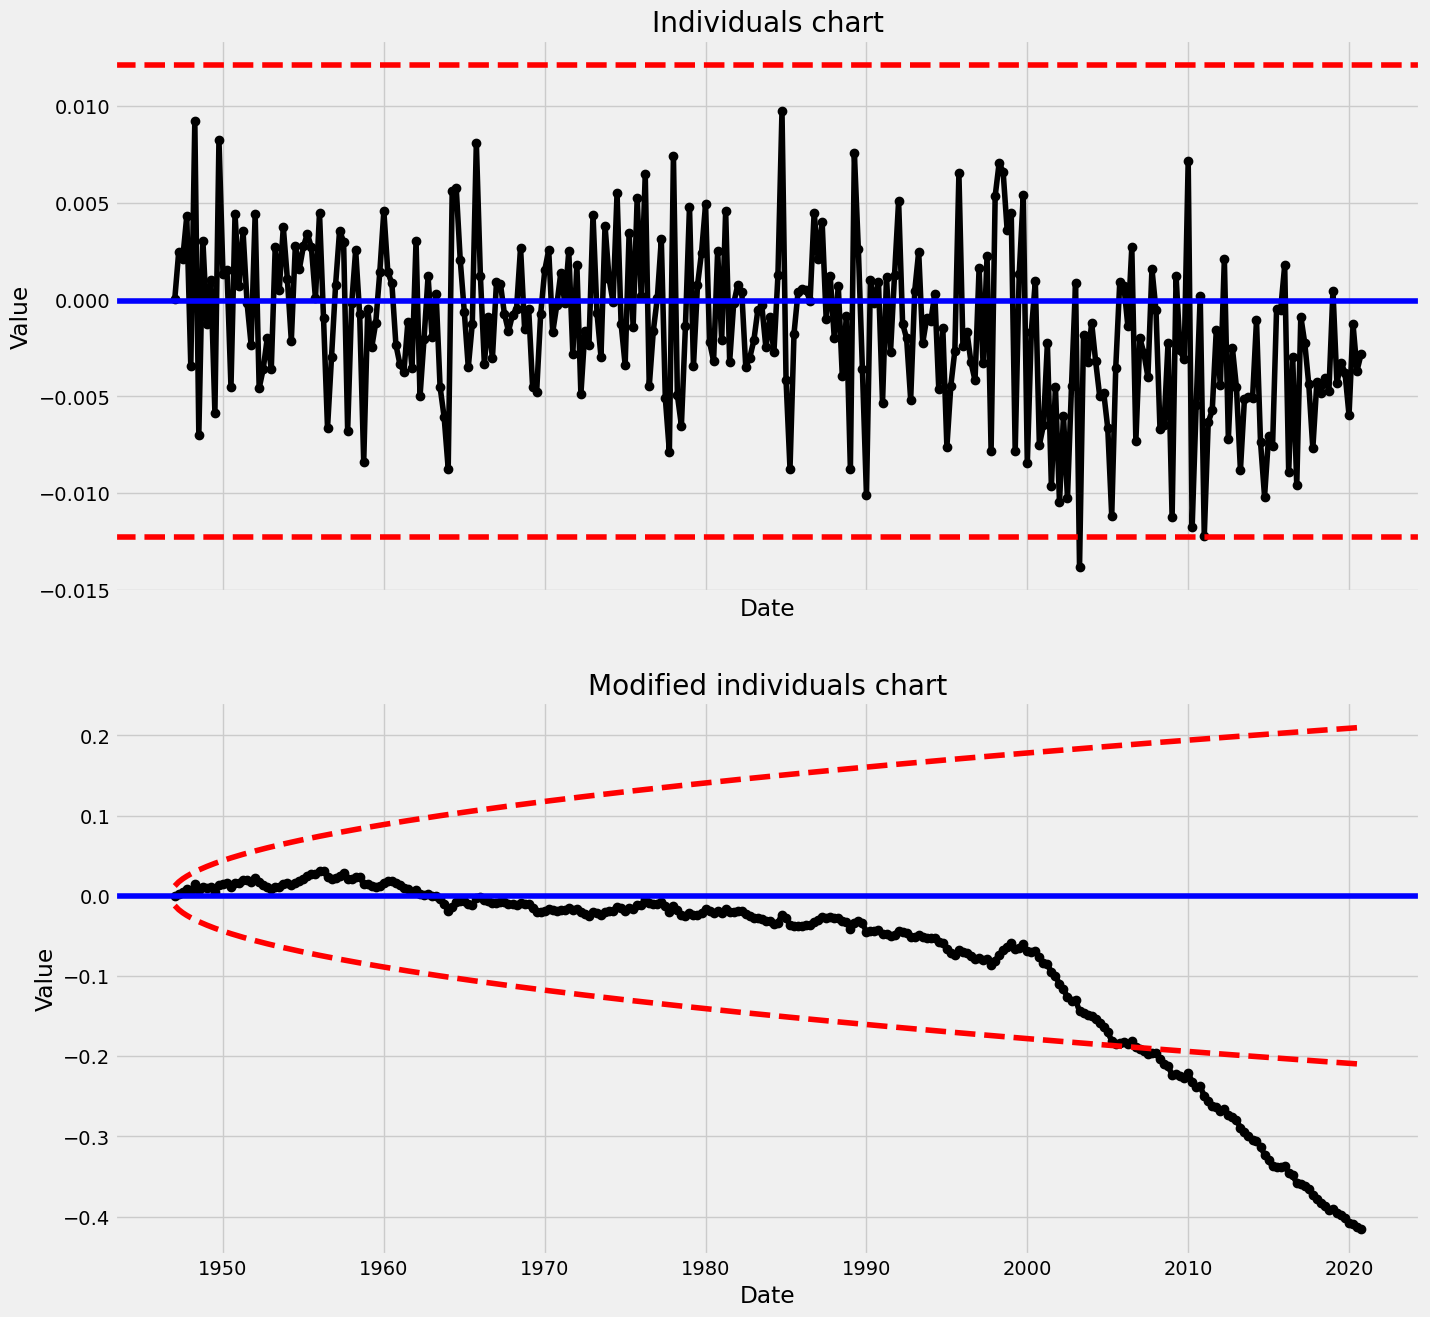

In [163]:
#create dummy data
x = pd.Series(Final_data['Errors'].values)

#define Cumulative values
CM = np.cumsum(x)

#convert list to pandas Series objects    
CM = pd.Series(CM)

#concatenate CM Series with x and rename columns
data = pd.concat([x,CM], axis=1).rename(columns={0:"x", 1:"CM"})

#create mean and confidence intervals
M = statistics.mean(Z_R['Errors'])
C_up = M+3*statistics.stdev(Z_R['Errors'])
C_down = M-3*statistics.stdev(Z_R['Errors'])

C_up_2  = []
C_down_2  = []

for i in range(len(x)):
    C_up_2.append(M+3*math.sqrt(statistics.variance(Z_R['Errors'])*(i+1)))
    C_down_2.append(M-3*math.sqrt(statistics.variance(Z_R['Errors'])*(i+1)))
    
C_up_2 = pd.Series(C_up_2)
C_down_2 = pd.Series(C_down_2)

#plot x and CM charts
fig, axs = plt.subplots(2, figsize=(15,15), sharex=True)

#x chart
axs[0].plot(date_index, data['x'], linestyle='-', marker='o', color='black')
axs[0].axhline(M, color='blue')
axs[0].axhline(C_up, color = 'red', linestyle = 'dashed')
axs[0].axhline(C_down, color = 'red', linestyle = 'dashed')
axs[0].set_title('Individuals chart')
axs[0].set(xlabel='Date', ylabel='Value')

#CM chart
axs[1].plot(date_index, data['CM'], linestyle='-', marker='o', color='black')
axs[1].axhline(M, color='blue')
axs[1].plot(date_index, C_up_2, color = 'red', linestyle = 'dashed')
axs[1].plot(date_index, C_down_2, color = 'red', linestyle = 'dashed')
axs[1].set_title('Modified individuals chart')
axs[1].set(xlabel='Date', ylabel='Value')

#validate points out of control limits for x chart
i = 0
control = True
for unit in data['x']:
    if unit > C_up or unit < C_down:
        print('Date', date_index[i], 'out of cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')
    
#Validate points out of control limits for CM chart
i = 0
control = True
for unit in data['CM']:
    if unit > C_up_2[i] or unit < C_down_2[i]:
        print('Date', date_index[i], 'out of control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

A more sensitive tool used in statistical process control is the Cumulative Sum (CUSUM) chart. It is a type of control chart that plots the cumulative sum of deviations from a reference or target value. These charts are useful to detect small, gradual shifts in the process mean that may not be immediately noticeable using other control methods. Therefore, CUSUM charts are more sensitive compared to their counterpart, as it takes into account the cumulative deviation from the target. In other words, they provide an early warning signal respect individuals charts when the process is moving out of control. Below a CUSUM chart is reported with target value the mean of the synthetic prediction errors, a reference value equal to 0.0025, and a measure of variability *H* equal to five standard deviations. More details are given in [Wachs, S. (2010)](https://www.integral-concepts.com/wp-content/media/What-is-a-CUSUM-Chart-and-When-Should-I-Use-One.pdf).

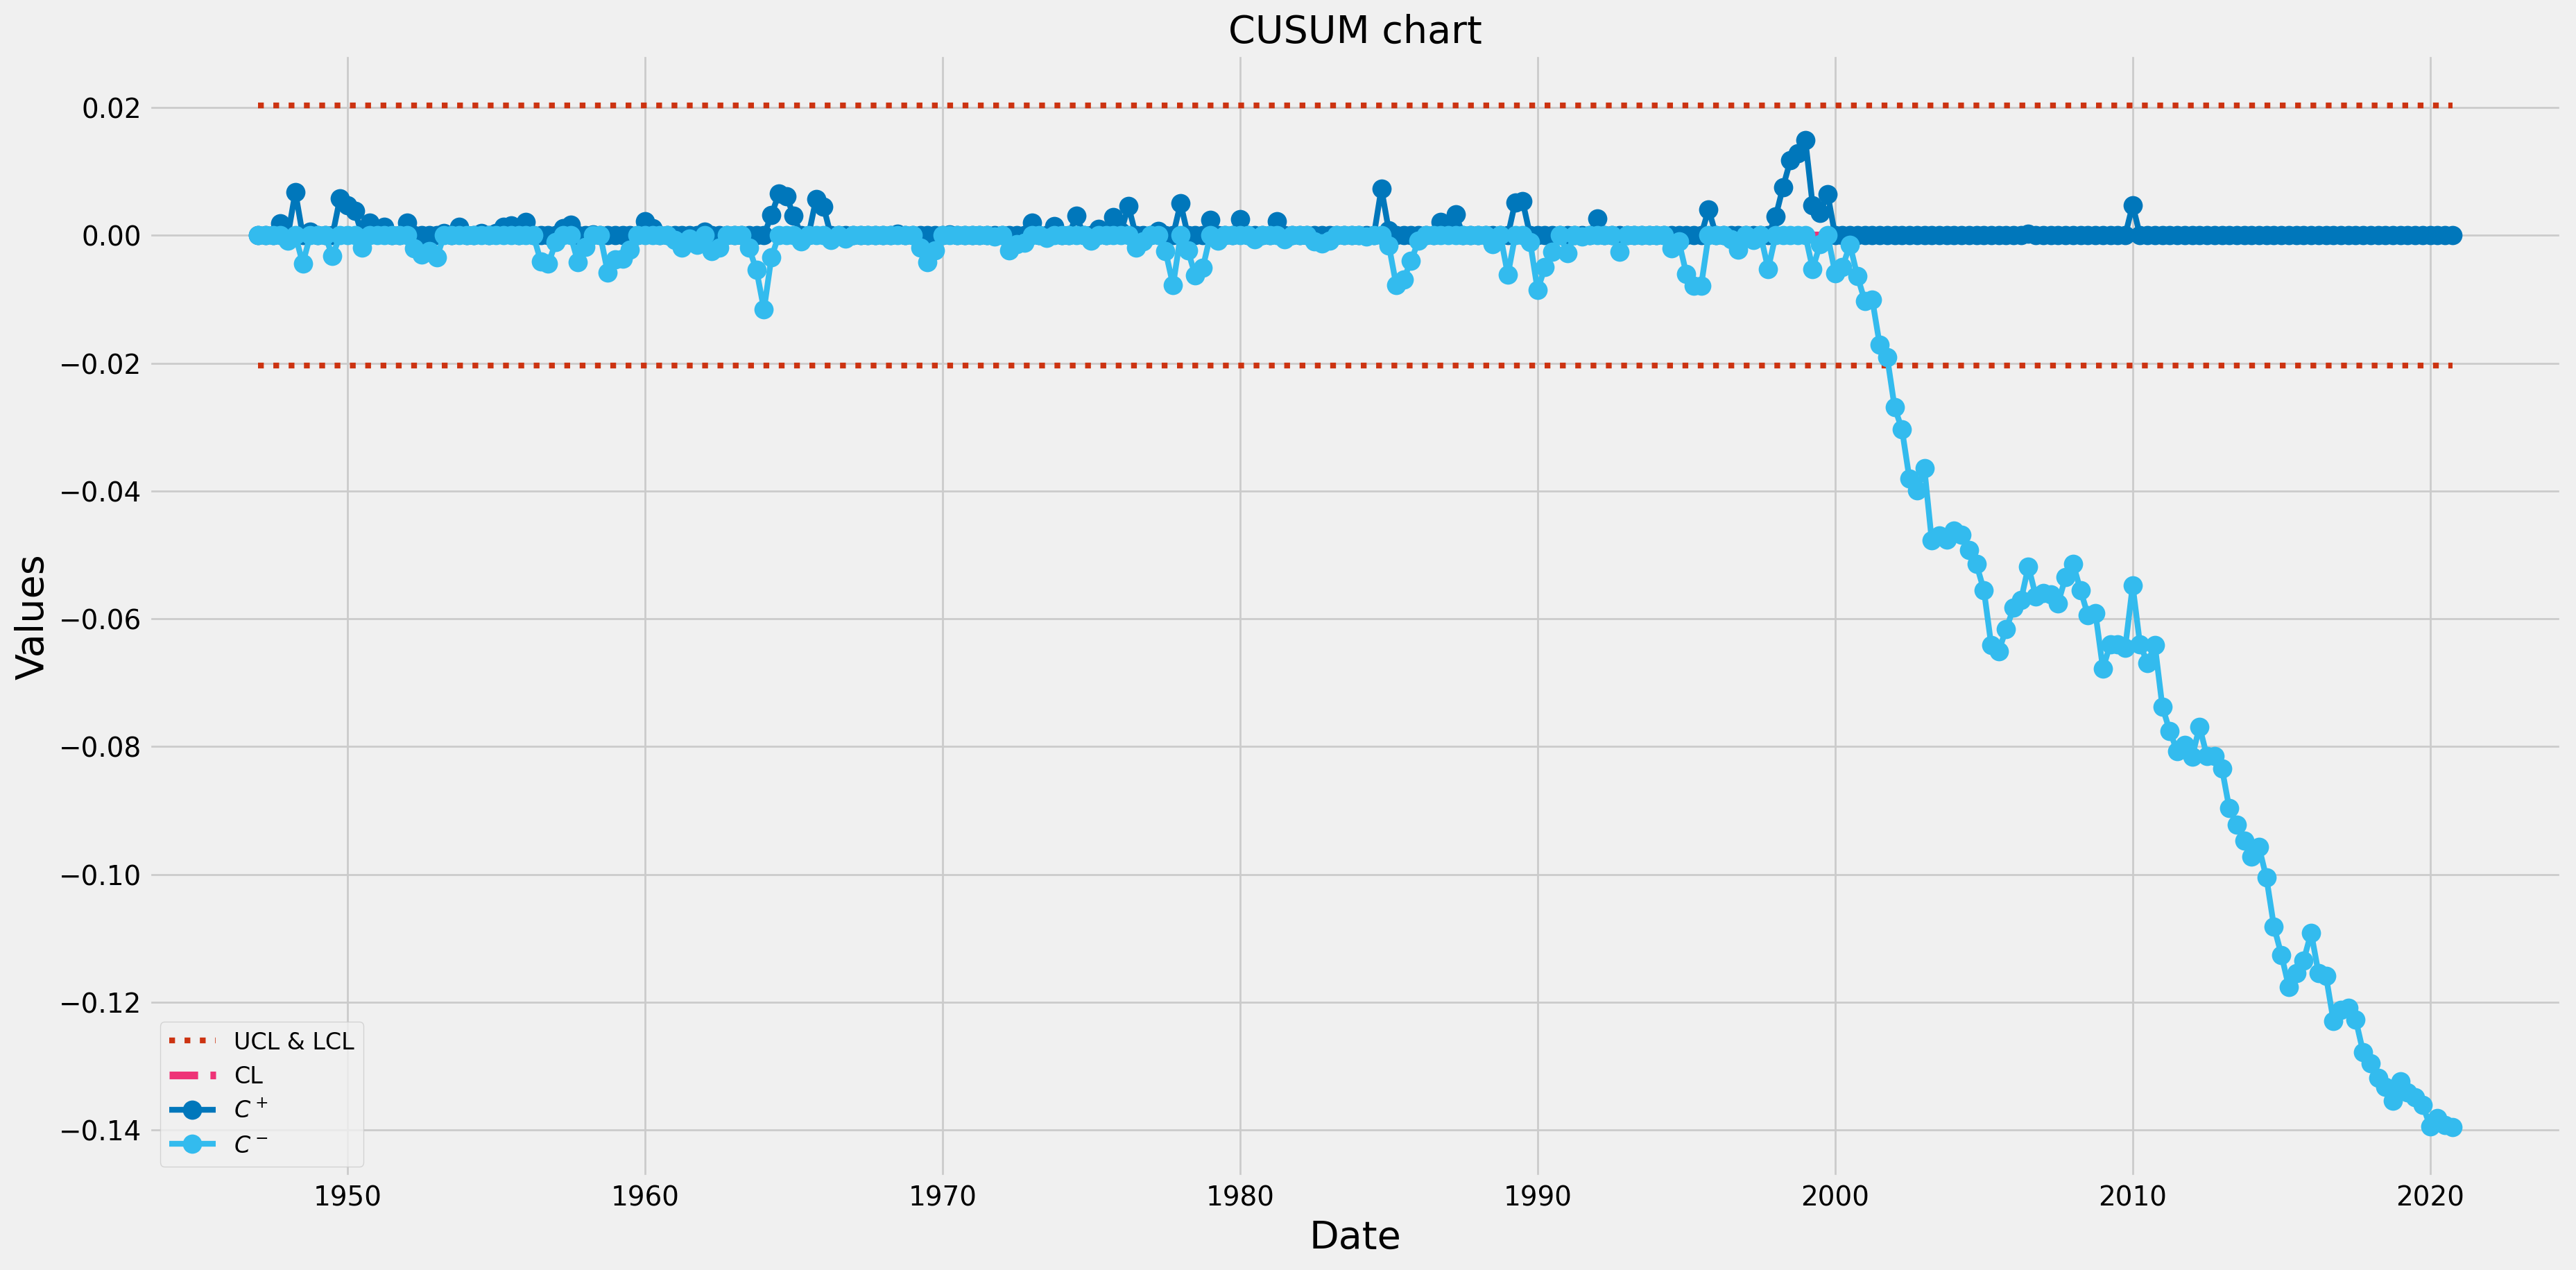

All points within control limits.
Date 2002-01-01 00:00:00 out of control limits!
Date 2002-04-01 00:00:00 out of control limits!
Date 2002-07-01 00:00:00 out of control limits!
Date 2002-10-01 00:00:00 out of control limits!
Date 2003-01-01 00:00:00 out of control limits!
Date 2003-04-01 00:00:00 out of control limits!
Date 2003-07-01 00:00:00 out of control limits!
Date 2003-10-01 00:00:00 out of control limits!
Date 2004-01-01 00:00:00 out of control limits!
Date 2004-04-01 00:00:00 out of control limits!
Date 2004-07-01 00:00:00 out of control limits!
Date 2004-10-01 00:00:00 out of control limits!
Date 2005-01-01 00:00:00 out of control limits!
Date 2005-04-01 00:00:00 out of control limits!
Date 2005-07-01 00:00:00 out of control limits!
Date 2005-10-01 00:00:00 out of control limits!
Date 2006-01-01 00:00:00 out of control limits!
Date 2006-04-01 00:00:00 out of control limits!
Date 2006-07-01 00:00:00 out of control limits!
Date 2006-10-01 00:00:00 out of control limits!
Date 2

In [164]:
#Color settings
CL = {
    'BLU': '#0077BB',  #blue 
    'CYA': '#33BBEE',  #cyan 
    'MAG': '#EE3377',  #magenta 
    'RED': '#CC3311',  #red
}

#Data
sample_data = Final_data['Errors']
N = np.arange(sample_data.shape[0])

#Shewhart part
sigma_0 = statistics.stdev(Z_R['Errors'])
mu_0 = Z_R['Errors'].mean()
k = 3

UCL = mu_0+sigma_0*k
LCL = mu_0-sigma_0*k

#CUSUM part
mu_1 = Z_R['Errors'].mean()+0.005  #0.005 of mean shift is not tolerated
K = np.fabs(mu_1-mu_0)/2
H = 5*sigma_0

C_positive = [0]
C_negative = [0]

for i in range(N.shape[0]):
    C_positive_new = np.max([0, sample_data[i]-(mu_0 + K)+C_positive[i]])
    C_positive.append(C_positive_new)
    C_negative_new = np.max([0, (mu_0-K)-sample_data[i]+C_negative[i]])
    C_negative.append(C_negative_new)
C_positive = np.asarray(C_positive)
C_negative = np.asarray(C_negative)


#Shewhart control chart
#fig, ax = plt.subplots(figsize=(20, 10), dpi=200)
#ax.hlines([UCL, LCL], date_index[0], date_index[295], colors=CL['RED'], linestyles='dotted', label='UCL \& LCL', lw=3)
#ax.hlines([mu_0], date_index[0], date_index[295], colors=CL['MAG'], linestyles='dashed', label='CL', lw=4)
#ax.plot(date_index, sample_data, '.-', c=CL['BLU'], label='Errors', lw=3, ms=8, mew=6)
#ax.set_xlabel('Observations', fontsize=20)
#ax.set_ylabel('Values', fontsize=20)
#ax.set_title('Shewhart control chart', fontsize=20)
#ax.legend(loc='lower left', fontsize=12)  # legend position
#ax.grid(linestyle='--')
#plt.tight_layout()
#plt.savefig("figure/Shewhart control chart result.jpg")

#CUSUM control chart
fig, ax = plt.subplots(figsize=(20, 10), dpi=200)

ax.hlines([H, - H], date_index[0], date_index[295], colors=CL['RED'], linestyles='dotted', label='UCL & LCL', lw=3)
ax.hlines([0], date_index[0], date_index[295], colors=CL['MAG'], linestyles='dashed', label='CL', lw=4)
ax.plot(date_index, C_positive[1:], '.-', c=CL['BLU'], label='$C^+$', lw=3, ms=8, mew=6)
ax.plot(date_index,- C_negative[1:], '.-', c=CL['CYA'], label='$C^-$', lw=3, ms=8, mew=6)
ax.set_xlabel('Date', fontsize=20)
ax.set_title('CUSUM chart', fontsize=20)
ax.set_ylabel('Values', fontsize=20)
ax.legend(loc='lower left', fontsize=12)  #legend position
#ax.grid(linestyle='--')
#plt.savefig("figure/CUSUM control chart result.jpg")
plt.show()

#Validate points out of control limits for Shewhart control chart
#i = 0
#control = True
#for unit in sample_data:
#    if unit > UCL or unit <  LCL:
#        print('Date', date_index[i], 'out of cotrol limits!')
#        control = False
#    i += 1
#if control == True:
#    print('All points within control limits.')
    
#Validate points out of control limits for CUSUM control chart
i = 0
control = True
for unit in C_positive[1:]:
    if unit > H or unit < -H:
        print('Date', date_index[i], 'out of control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')
    
i = 0
control = True
for unit in C_negative[1:]:
    if unit > H or unit < -H:
        print('Date', date_index[i], 'out of control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

As reported above, the CUSUM chart detected the change in the steady state of the economy early respect the previous two individuals charts. The reader should take in mind that these are only some of a wider set of available tools to monitor changes in the mean value of a process over time. Thus, different processes require different types of control charts. Moreover, altering the reference value can make the chart more sensitive to changes in the process, and increasing the number of data points in the sample can make the chart more accurate.

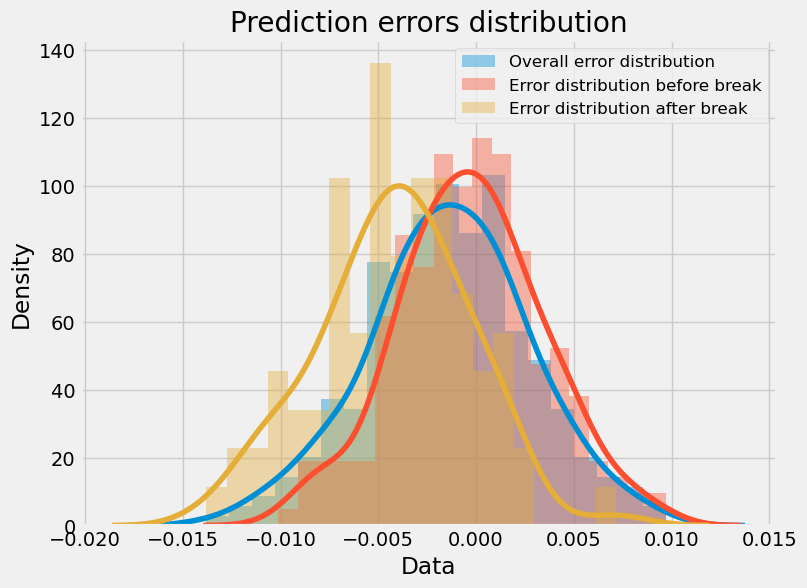

In [165]:
plt.subplots(figsize=(8,6)) #plot the distributions togheter
sns.distplot(Final_data['Errors'].values, kde=True, hist=True, bins=20, label='Overall error distribution')
sns.distplot(Final_data['Errors'].values[:212], kde=True, hist=True, bins=20, label='Error distribution before break')
sns.distplot(Final_data['Errors'].values[212:], kde=True, hist=True, bins=20, label='Error distribution after break')
plt.title('Prediction errors distribution')
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
plt.xlabel('Data')
plt.legend(fontsize=12)
plt.show()

### No-normal errors: stress test

In the following, we test the ability of the GAN to learn prediction error distributions different to the normal ones. In the reality, the normality assumption may not hold. Indeed, there are evidences of the presence of both Skewness and Kurtosis in the prediction errors' distribution of model treating economic variables (**literature**). To capture these dynamics, the proposed theoretical distribution is a generalized hyperbolic distribution with a location of 0.002, a scale of 0.004, a skewness parameter of 0.01, a tail parameter and a shape parameter of 0.5. We decide also to half the sample size used for the analysis; from 128 to 64.

(array(0.00224008), array(9.60960608e-05), array(0.08163061), array(3.33933105))


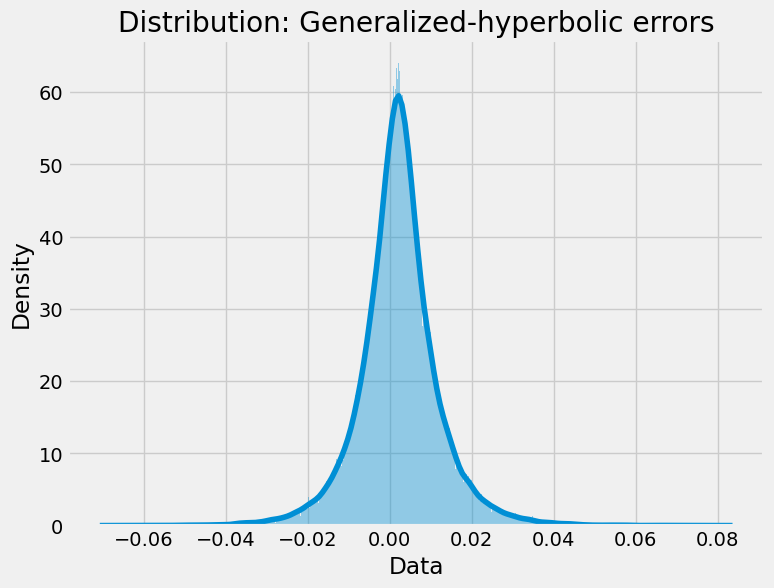

In [166]:
np.random.seed(13)

distribution = scipy.stats.genhyperbolic(0.5, 0.5, 0.01, loc=0.002, scale=0.004) #generalized hyperbolic distribution
sample = distribution.rvs(size=128000) #sample
print(distribution.stats('mvsk')) #mean, variance, skewness and kurtosis

plt.subplots(figsize=(8,6))
sns.distplot(sample, kde=True, hist=True, bins=1000, label='Overall error distribution')
plt.title('Distribution: Generalized-hyperbolic errors')
plt.xlabel('Data')
plt.show()

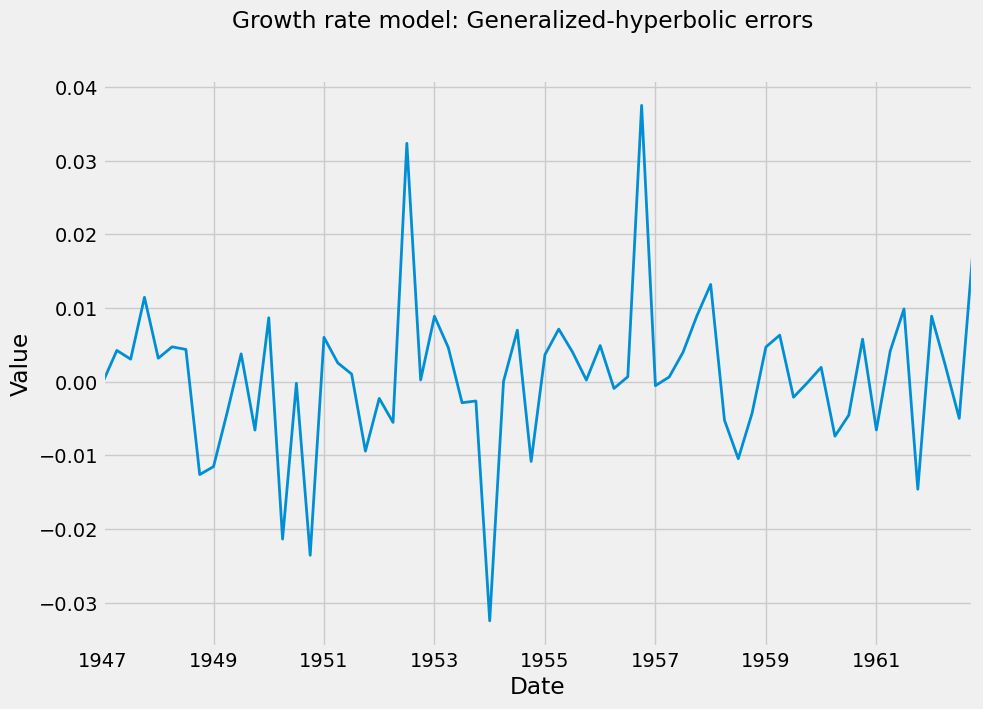

In [167]:
np.random.seed(13)

errors_3 = distribution.rvs(size=64)
errors_3[0] = 0

known_data_2 = pd.DataFrame(log_returns.div(100).iloc[:,0].tolist(), columns=['Original'])[:64]
known_data_2.index = date_index[0:64]
known_data_2['Predictions'] = known_data_2['Original']+errors_3
known_data_2['Errors'] = errors_3

f, ax = plt.subplots(1)
f.set_figheight(7)
f.set_figwidth(10)
_ = known_data_2['Errors'].plot(ax=ax,
                                              style=['-','-'], linewidth=2)
plot = plt.suptitle('Growth rate model: Generalized-hyperbolic errors')
plot = plt.xlabel('Date')
plot = plt.ylabel('Value')

-4.007484264381142e-05

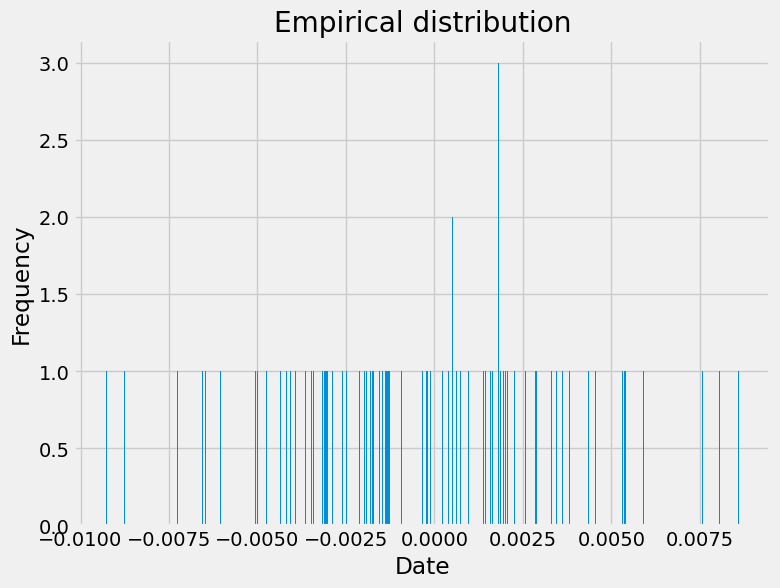

In [168]:
plt.subplots(figsize=(8,6))
known_data['Errors'].plot(kind='hist', bins=1000)
plt.xlabel('Date')
plt.title('Empirical distribution')
np.mean(known_data['Errors'])

In [169]:
data_4 = rolling_window(np.asarray(pd.DataFrame(known_data_2['Errors']*100)))
train_data_4 = np.stack(data_4, axis=0)

BUFFER_SIZE = len(known_data_2['Errors']) #lenght of timeseries

# Convert to tensor
train_data_4 = tf.convert_to_tensor(train_data_4, np.float32)
train_dataset_4 = tf.data.Dataset.from_tensor_slices(train_data_4).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [170]:
###Load the model below. Too time to run.

#Input for the generator: some random noise, called latent data 
#EPOCHS = 1000
#num_examples_to_generate = 16 # maximum value due to plotting 
#seed = tf.random.normal([num_examples_to_generate, noise_dim])
#disc_n = 5

#test = [[plot_hist, seed]]

#G_loss = []; D_loss = []; D_loss_0 = []

#train(train_dataset_4, test, EPOCHS, choice, disc_n)

#dict = {'Loss_G': G_loss, 'Loss_D': D_loss, 'Loss_D_0': D_loss_0}  
       
#df = pd.DataFrame(dict) 
    
# saving the dataframe 
#df.to_csv('Loss.csv') 

In [171]:
###Loading the model

#checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir)) #last checkpoint
#ckpt_manager = tf.train.CheckpointManager(checkpoint, checkpoint_dir, max_to_keep=50)
checkpoint_fname = checkpoint_dir + '\ckpt-''Residuals-2'
tf.print("-----------Restoring from {}-----------".format(checkpoint_fname))
checkpoint.restore(checkpoint_fname)

-----------Restoring from ./training_checkpoints\ckpt-Residuals-2-----------


In [172]:
np.random.seed(13)

df_R = pd.DataFrame(errors_3.tolist(), columns=['Original'])
for i in range(2000):
    noise = np.random.randn(5,100) #5x32x100
    predictions = generator(noise, training=True) #training true or false
    result = tf.squeeze(predictions) #given a tensor input, this operation returns a tensor of the same type with all dimensions of size 1 removed.
    temp = (result.numpy())
    generated_data = [item for sublist in temp for item in sublist] # temp is the list getting flattened
    df_generated = pd.DataFrame(generated_data, columns=['Generated Data'])
    df_generated = df_generated[:64] #seleceted time series
    
    df12 = df_generated.div(100) #divide by 100 to compensate for training input (x100)
    #df12.iloc[0, 0] = 0
    df13 = df12.iloc[:,0].tolist()
    df = pd.DataFrame(df13, columns=['logreturns'])
    df_R[f'Errors-{i}'] = df.logreturns.fillna(0)
    
Z_R2 = df_R.drop(['Original'], axis=1) #generated log-return

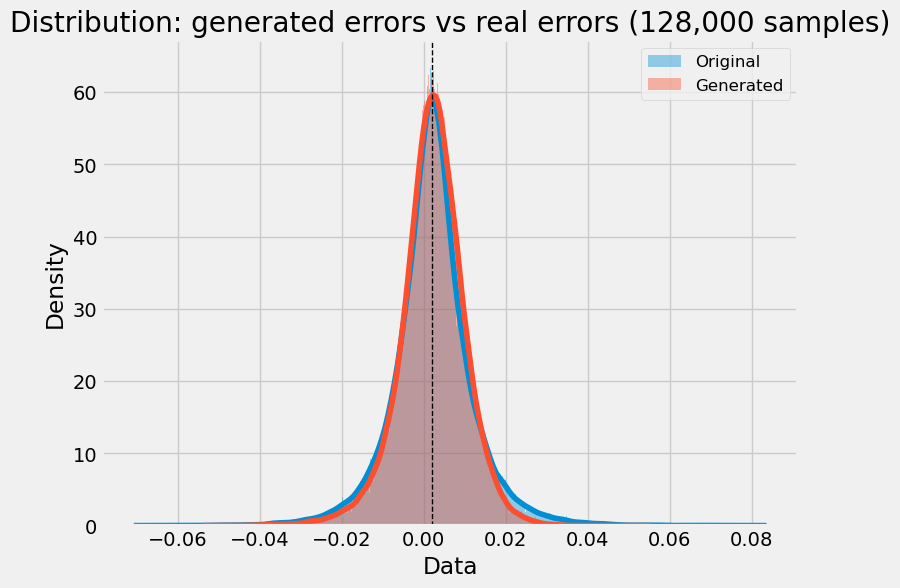

In [173]:
Z_R2 = pd.DataFrame(pd.Series(Z_R2.values.ravel('F')), columns=['Errors']) #flatten all values in one list
errors_4 = sample

#c_r1,c_r2 = np.percentile(Z_R2['Errors'], 2.5), np.percentile(Z_R2['Errors'], 97.5) #95% prediction intervals

plt.subplots(figsize=(8,6))
sns.distplot(errors_4, kde=True, bins=1000, hist=True, label ='Original')
sns.distplot(Z_R2['Errors'], kde=True, bins=1000, hist=True, label='Generated' )
plt.axvline(Z_R2['Errors'].mean(), color='k', linestyle='dashed', linewidth=1)

plt.title('Distribution: generated errors vs real errors (128,000 samples)')
plt.xlabel('Data')

plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
plt.legend(fontsize=12)
plt.show()

In [174]:
print('Real 95% confidence intervals:{}{}'.format(np.percentile(sample,2.5), np.percentile(sample,97.5)))
print('Real mean:{}'.format(np.mean(sample)))
print('Real variance:{}'.format(np.var(sample)))

Real 95% confidence intervals:-0.0182029590063639280.0232120320731664
Real mean:0.0022214358028484387
Real variance:9.600681867510037e-05


In [175]:
c_r1,c_r2 = np.percentile(Z_R2['Errors'], 2.5), np.percentile(Z_R2['Errors'], 97.5) #95% prediction intervals
print('GAN 95% confidence intervals:{}{}'.format (c_r1,c_r2))
print('GAN mean:{}'.format(np.mean(Z_R2)))
print('GAN variance{}'.format(np.var(Z_R2)))

GAN 95% confidence intervals:-0.015243656141683460.017420700937509522
GAN mean:Errors    0.002135
dtype: float64
GAN varianceErrors    0.000064
dtype: float64


In [176]:
sample_mean2 = []
b_int_5_2 = []
b_int_95_2 = []
var_2 = []

for i in range(128000):
    y = random.sample(known_data_2['Errors'].tolist(), 32)
    avg = np.mean(y)
    percentile_5_b, percentile_95_b = np.percentile(y, 2.5), np.percentile(y, 97.5)
    sd = np.var(y)
    sample_mean2.append(avg)
    b_int_5_2.append(percentile_5_b)
    b_int_95_2.append(percentile_95_b)
    var_2.append(sd)

print('Bootstrap mean:{}'.format(np.mean(sample_mean2)))
print('Bootstrap 95% confidence intervals:{}{}'.format(np.mean(b_int_5_2), np.mean(b_int_95_2)))
print('Bootstrap variance:{}'.format(np.mean(var_2)))

Bootstrap mean:0.0007065356993506802
Bootstrap 95% confidence intervals:-0.0195673123004635880.021004476731640298
Bootstrap variance:0.00010911962162778161


Overall, the GAN provided a reasonable aproximation of the underlying distribution. Although the bootstrap technique gave better results in terms of variance aproximation, this parametric approach failed to capture the real mean of prediction errors. 

## Conclusions

In this project, we have analyzed some of the most used models to perform time series forecasting for macroeconomic variables. Algorithms such as XGboost, LSTM, Prophet and ARIMA was outlined and tested to predict the cumulative log-growth rate of the real GDP. Machine Learning as well as statistical models can be used for time series forecasting to provide accurate predictions in the short terms and insights into future trends. However, in the context of long-term horizon, forecasting can be a complex and a challenging process, as it requires dealing with an unknown future that is subject to numerous uncertainties. 

To deal with this issue we developed a window of predicted path using the GAN. Firstly, we modified the WGAN-GP proposed in Ishaan G., et al. (2017) to be suitable also for sequential data. Then we propose a RNNs version and a parallel one, which is able to incorporate features of both CNNs and RNNs. Even if the proposed PAR-WGAN-GP exceeds its singular parts, all models showed similar results in generating suitable synthetic data. Maybe, after a reasonable period of training the underlying process of the GAN is able to learn some common features of the data. 

The effectiveness of GAN on time series data is still an open debate, but researchers are continually trying to enhance them to work better in dynamic environments like the stock market, transportation networks, and weather forecasting. We contribute to this debate showing positive results for macro-economic time series data. Indeed, our proposed model is able to capture some important aspects of the data as well as real GDP future behaviors with an initial horizon of two years. Dealing with a longer term forecasting raises the well-known multiple steady state issue. Using a non-parametric test we identified a structural break in the time series at the date 01-01-2000, which suggests that there was a change in the equilibrium growth path of the economy. With this into account our final estimates for 2040 were close to those proposed by the OECD. Moreover, the GAN and the ARIMA model provided similar results in terms of point forecast, but the prediction intervals of the first resulted smaller than its couterpart.

For banks and financial authorities, knowing when a forecasting models should be updated is another relevant issue to deal with. Update our model constantly may be too expensive, while update our model belatedly can have heavy consequences especially for variables such as the GDP's growth rate. We showed how the GAN can be used to derive the underlying distribution of the prediction errors. This is crucial to know when the model should be updated. Combining synthetic data and statistical process control tools such as CUSUM, may be helpful to provide some advices on when take actions. Nevertheless, there are still some theoretical limitations that need to be addressed soon. Ohter future works should be centered in the developing of new metrics for comparing synthetic and real data as well as on new archetypes to capture the temporal dimension of sequential data in a more properly manner. Moreover, testing and combining the proposed model with those available in the literature (for example using TCN rather than LSTM) may create new ways for improvements. This is relevant to obtain more accurate prediction intervals as well as more suitable synthetic time series. Studying which is the most suitable quality control chart to use in cost-sensitive adaptation analysis is another point to stress in the near future.

Despite the challenges, long time forecasting is a relevant task for banks, governments, and other organizations, as it can help them identify opportunities and risks, make informed decisions, and plan for the future. Moreover, scenario analysis is essential to assess and mitigate risks, identify opportunities and make informed decisions in an uncertain future. One of the most important variable to consider when developing such type of tasks is the GDP; but most of the time its predicted values are taken as a deterministic quantity without considering their stochastic nature.
Inaccurate predictions may have heavy negative effects on the entire economy system as well as on government interventions. At worst, people who have suffered unexpected heavy losses may lose confidence in institutions undermining and slowing important changes such as today’s ecological transition.

## References
1) Vuletić, M., Prenzel, F. and Cucuringu, M., *Fin-GAN: Forecasting and Classifying Financial Time Series via Generative Adversarial Networks*, 2023, available at [SSRN](https://ssrn.com/abstract=4328302).

2) Eckerli, F. and Osterrieder, J., *Generative Adversarial Networks in Finance: An Overview*, 2021, available at [SSRN](https://ssrn.com/abstract=3864965).

3) Pfenninger, M., Samuel R. and Daniel N. B., *Wasserstein GAN: Deep Generation Applied on Financial Time Series*, 2021, other Financial Economics e-Journal.

4) Magnus W., Robert K., Ralf K. and Peter K., *Quant GANs: deep generation of financial time series*, 2020, Quantitative Finance, 20:9, 1419-1440.

5) Martin A., Soumith C., and Leon B., *Wasserstein generative adversarial networks*, in International Conference on Machine Learning, pages 214–223. PMLR, 2017.

6) Goodfellow, I., er al., 2014, *Generative Adversarial Networks. Advances in Neural Information Processing Systems*.

7) Godfrey, M.D., Granger, C.W.J. and Morgenstern, O., 1964, *THE RANDOM-WALK HYPOTHESIS OF STOCK MARKET BEHAVIOR*. Kyklos, 17: 1-30. 

8) Fleissig, A.R. and Strauss, J., 1999, *Is OECD Real Per Capita GDP Trend or Difference Stationary? Evidence from Panel Unit Root Tests*, Journal of Macroeconomics,  21, 673-690. 

9) Cuestas, J.C. and Garratt, D., 2011, *Is Real GDP Per Capita a Stationary Process? Smooth Transitions, Nonlinear Trends and Unit Root Testing*, Empirical Economics, 41, 555-563. 

10) Furuoka, F., 2011, *Is GDP in ASEAN Countries Stationary? New Evidence from Panel Unit Root Tests*. Economics Bulletin, 31, 1391-1400.

11) Charles, A. and Darné, O., 2012, *Trends and Random Walks in Macroeconomic Time Series: A Reappraisal*, Journal of Macroeconomics, 34, 167-180. 

12) Lee, K.C., 2014, *Is Per Capita Real GDP Stationary in China? Sequential Panel Selection Method*, Economic Modelling, 37, 507-517.

13) Oskooe, S.A.P. and Akbari, L.T., 2015, *Is Per Capita Real GDP Stationary? Evidence from OPEC Countries*, International Journal of Humanities and Social Science, 5, 166-168.

14) Xing, L.Z., Dong, X.L. and Guan, J., 2017, *Global Industrial Impact Coefficient Based on Random Walk Process and Inter-Country Input-Output Table*, Physica A: Statistical Mechanics and its Applications, 471, 576-591. 

16) Ishaan G., et al., *Improved training of Wasserstein GANs*, In Advances in Neural Information Processing Systems, pages 5767–5777, 2017.

17) Sangjin, P. and Yang, J-S., 2022, *Interpretable deep learning LSTM model for intelligent economic decision-making. Knowledge-Based Systems*. 

18) Sainath, Tara N., et al. *Convolutional, long short-term memory, fully connected deep neural networks*, 2015 IEEE international conference on acoustics, speech and signal processing (ICASSP).

19) Brophy, E., et al., *Generative adversarial networks in time series: A systematic literature review*. ACM Computing Surveys, 2023, 55.10: 1-31.

20) De Meer Pardo, F., *Enriching financial datasets with generative adversarial networks*, 2019, PhD Thesis, Delft University of Technology, Netherlands.

21) Dahl, C. M., and Emil N. S., 2022, *Time series (re) sampling using generative adversarial networks*, Neural Networks 156: 95-107.

22) Petropoulos, F., et al., *Forecasting: theory and practice*, International Journal of Forecasting, 2022.

23) Liu, H., et al., 2021, *LSTM-GAN-AE: A promising approach for fault diagnosis in machine health monitoring*, IEEE Transactions on Instrumentation and Measurement 71: 1-13.

24) Rizzati, M., et al., 2022, *The local costs of global climate change: spatial GDP downscaling under different climate scenarios*, Spatial Economic Analysis: 1-21.

25) Victor, Peter A., 2012, *Growth, degrowth and climate change: A scenario analysis*, Ecological economics 84: 206-212.

26) Newell, R. G., Brian, C. P., and Steven E. S., 2021, *The GDP-temperature relationship: implications for climate change damages*, Journal of Environmental Economics and Management 108: 102445.

27) Leimbach, M., et al., 2017, *Future growth patterns of world regions–A GDP scenario approach*, Global Environmental Change 42: 215-225.

28) Shmueli, G., 2010 *To explain or to predict?*.

29) Kohlscheen, E., and Jouchi N., 2021, *Steady‐state growth*, International finance 24.1: 40-52.

30) Ray, D., 1998, *Development economics*, Princeton University Press.

31) Plett, H., *Prediction intervals for economic fixed-event forecasts*, 2022.

32) Wachs, S., 2010, *What is a CUSUM chart and when should i use one*, Statistician Integral Concepts, Inc.: West Bloomfield.

33) Žliobaitė, I., Marcin B., and Frederic S., 2015, *Towards cost-sensitive adaptation: When is it worth updating your predictive model?* Neurocomputing 150: 240-249.

34) Gawel, E., Pannicke, N. and Hagemann, N., *A Path Transition Towards a Bioeconomy: The Crucial Role of Sustainability*, Sustainability 2019, 11, 3005.

35) Carney, M., 2015, *Breaking the tragedy of the horizon–climate change and financial stability*. Speech given at Lloyd’s of London 29, 220–230.

36) Solana, J., 2020, *Climate change litigation as financial risk*, Green Finance 2.4: 344-372.

37) Setzer, J. and Catherine H., 2022, *Global trends in climate change litigation: 2022 Snapshot*.

38) Steele, G. R., and Vaughn, K. I., 1993, *The Economics of Friedrich Hayek*, St. Martin's Press.

39) Danielsson, J., et al., 2016, *Model risk of risk models*, Journal of Financial Stability, 23, 79-91.

40) Adams, P., et al., *Forecasting Macroeconomic Risks*, 2020.

41) Muma, B. O. and Austin K., 2022, *Modeling GDP Using Autoregressive Integrated Moving Average (ARIMA) Model: A Systematic Review*, OALib.

42) Wickens, M., 2014, *How Useful are DSGE Macroeconomic Models for Forecasting?*. Open Econ Rev 25, 171–193.

43) Yoon, J., *Forecasting of real GDP growth using machine learning models: Gradient boosting and random forest approach*, Computational Economics, 2021.

44) Balaji, S. J., et al., 2021, *Machine learning algorithms for quarterly GDP forecasting: A performance evaluation*, Journal of Income & Wealth, 37-51.